In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import chardet



"""""readData"""""
rawdata = open("Economic inactivity yearly.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

file_1 ='Economic inactivity yearly.csv'
file_1_cols = [0,1]
file_1_result = []

file_2 = 'TFL Yearly bus and london underground yearly crimes.csv'
file_2_cols = [0,1,2]
file_2_result = []


with open(file_1,encoding=charenc) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        file_1_result.append([row[i] for i in file_1_cols])
        
with open(file_2,encoding=charenc) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        file_2_result.append([row[i] for i in file_2_cols])

combinedresult = []

for line1 in file_1_result:
    for line2 in file_2_result:
        if line1[0] == line2[0] and line1[0]:
            combinedresult.append(line1+line2[1:])


#
common_dates = []

economic_inactivity = []
bus_crime_yearly = []
underground_crime_yearly = []

for line in combinedresult[1:]:
    #print(line)
    common_dates.append(line[0])
    economic_inactivity.append(float(line[1]))
    bus_crime_yearly.append(float(line[2]))
    underground_crime_yearly.append(float(line[3]))

common_dates = np.array(common_dates)

economic_inactivity = np.array(economic_inactivity)
bus_crime_yearly = np.array(bus_crime_yearly)
underground_crime_yearly = np.array(underground_crime_yearly)

print(("{:^20s} {:^25s} {:^30s} {:^30s}").format("Dates", "Economic inactivity", "Bus crime", "Underground crime"))
for i in range(len(common_dates)):
      print(("{:^20s} {:17.4f} {:28.4f} {:30.4f}").format(common_dates[i], economic_inactivity[i], bus_crime_yearly[i], underground_crime_yearly[i]))



UTF-8-SIG
       Dates            Economic inactivity              Bus crime                  Underground crime       
        2010             16766101.0000                   24892.0000                     14825.0000
        2011             16878922.0000                   23954.0000                     13683.0000
        2012             16830525.0000                   20155.0000                     12312.0000
        2013             16085221.0000                   20249.0000                     12945.0000
        2014             15782977.0000                   19810.0000                     11169.0000
        2015             15748113.0000                   17277.0000                      9829.0000
        2016             15554726.0000                   17484.0000                     11042.0000
        2017             15620712.0000                   17073.0000                     11722.0000
        2018             15561953.0000                   15927.0000                     1

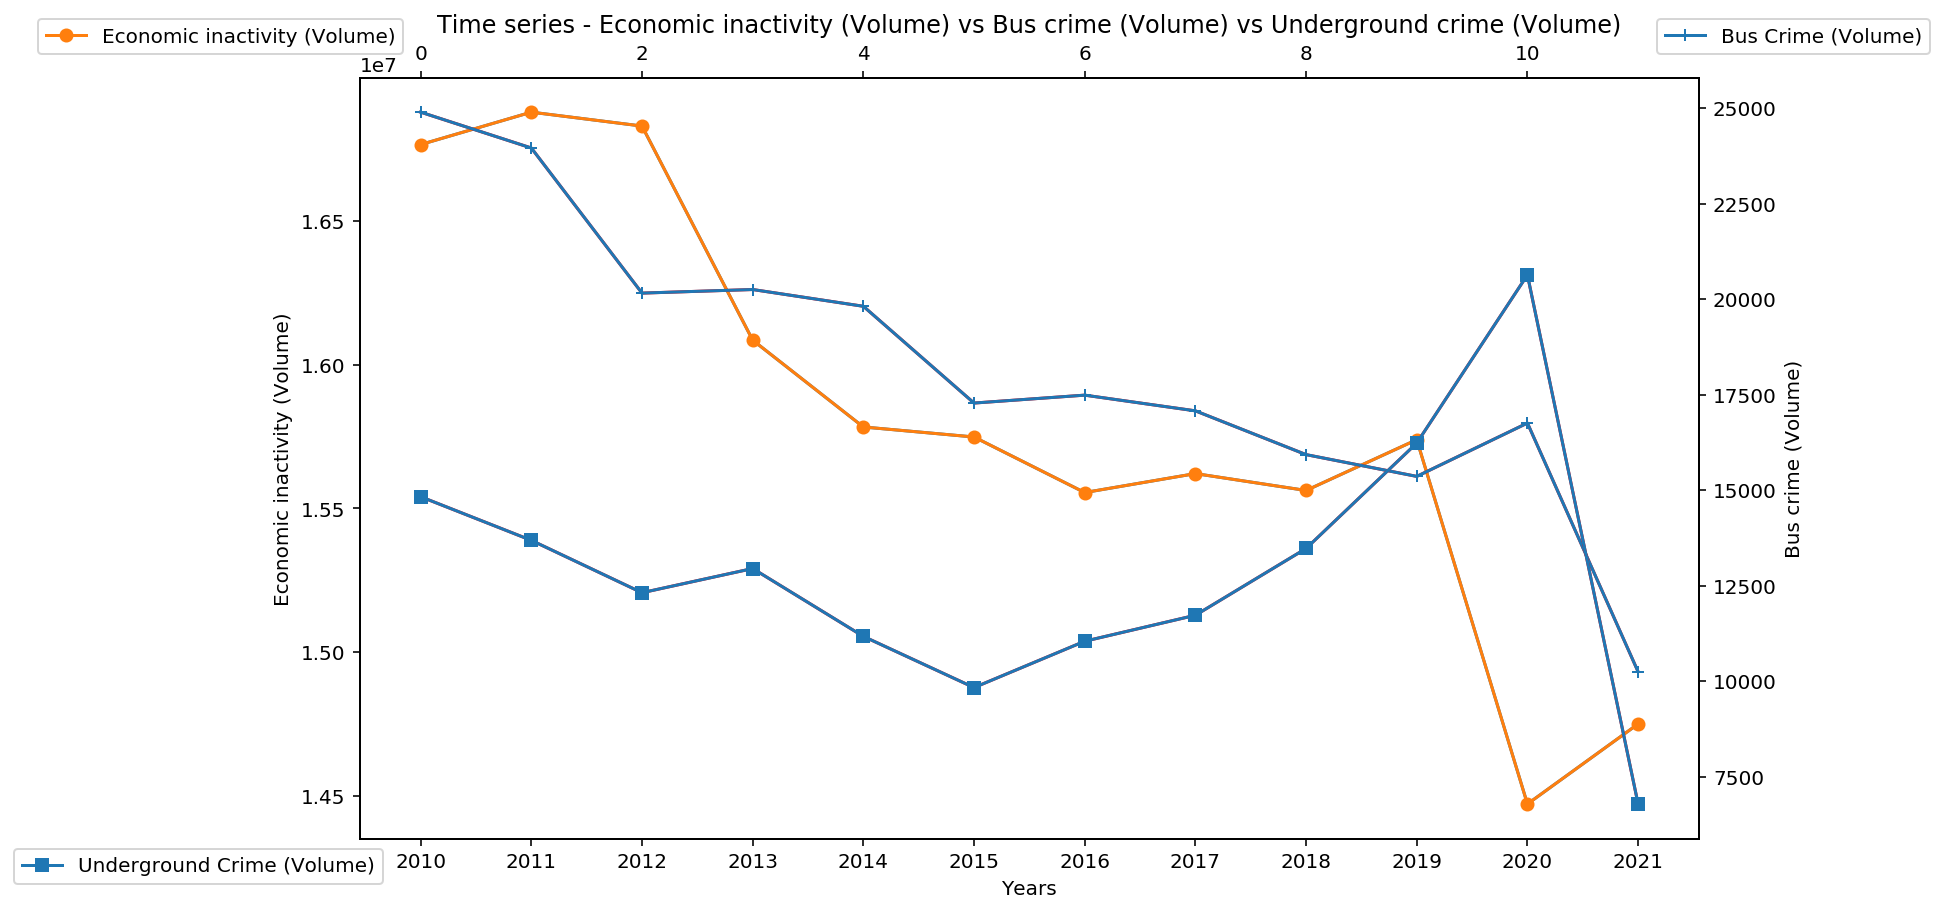

In [2]:
#subplots method provides a way to plot multiple plots on a single figure.
#ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)")
ax1.set_title("Time series - Economic inactivity (Volume) vs Bus crime (Volume) vs Underground crime (Volume)")

ax1.plot(common_dates, economic_inactivity)
ax1.plot(common_dates, economic_inactivity, marker='o', label='Economic inactivity (Volume)')
ax1.legend(bbox_to_anchor=(0.04, 1.09))

ax2 = ax1.twinx();

ax2.set_ylabel("Bus crime (Volume)")
ax2.plot(bus_crime_yearly,'r')
ax2.plot(bus_crime_yearly, marker='+',label='Bus Crime (Volume)')
ax2.legend(bbox_to_anchor=(1.18, 1.09))

ax3 = ax2.twiny();
ax3.plot(underground_crime_yearly,'r')
ax3.plot(underground_crime_yearly, marker='s',label='Underground Crime (Volume)')
ax3.legend(bbox_to_anchor=(0.025, 0.000009))



plt.show()

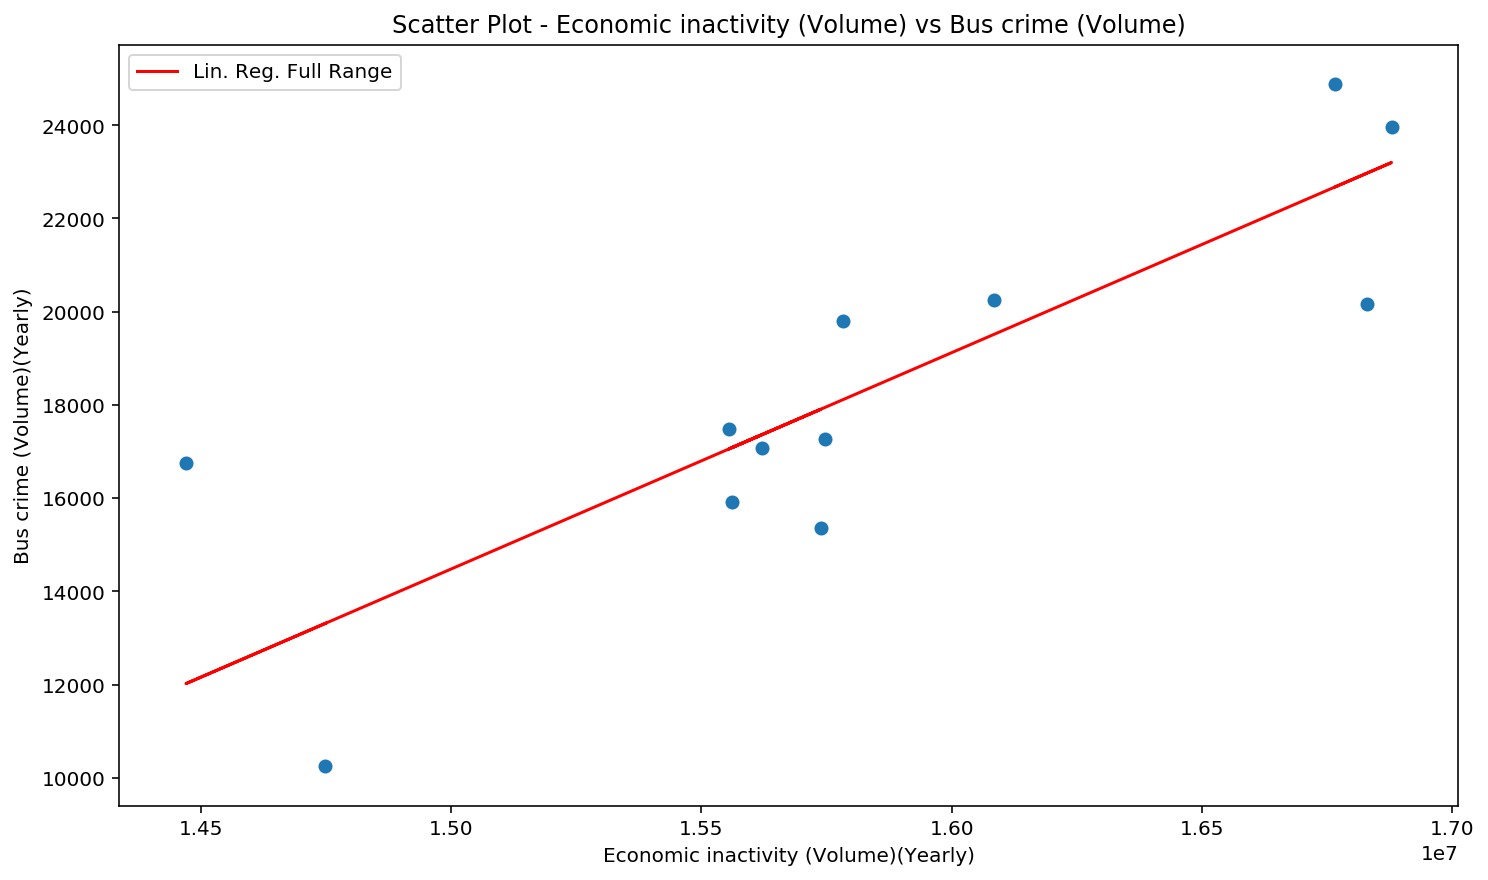

0.004641821063979603
-55148.850390941996

Covariance: 2423553563.4090915  Bus crime per Economic inactivity

Correlation Coefficient: 0.8174729554904825


In [3]:
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity
y = bus_crime_yearly
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#--------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity, bus_crime_yearly)
y_tot = economic_inactivity*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity, bus_crime_yearly)


plt.xlabel("Economic inactivity (Volume)(Yearly)")
plt.ylabel("Bus crime (Volume)(Yearly)")
plt.title("Scatter Plot - Economic inactivity (Volume) vs Bus crime (Volume)")

plt.show()

print(lin_reg_m_tot)
print(lin_reg_g_tot)
print()

#--------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity
y = bus_crime_yearly

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance


#lprint(correlation_coefficient(cycle_counts,road_disruption))
#lprint(calc_covariance(cycle_counts,road_disruption))

bus_crime_yearly_covariance = np.cov(bus_crime_yearly,economic_inactivity)[1][0]
cor_cof = np.corrcoef(economic_inactivity,bus_crime_yearly)[1][0]

print("Covariance:",bus_crime_yearly_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)


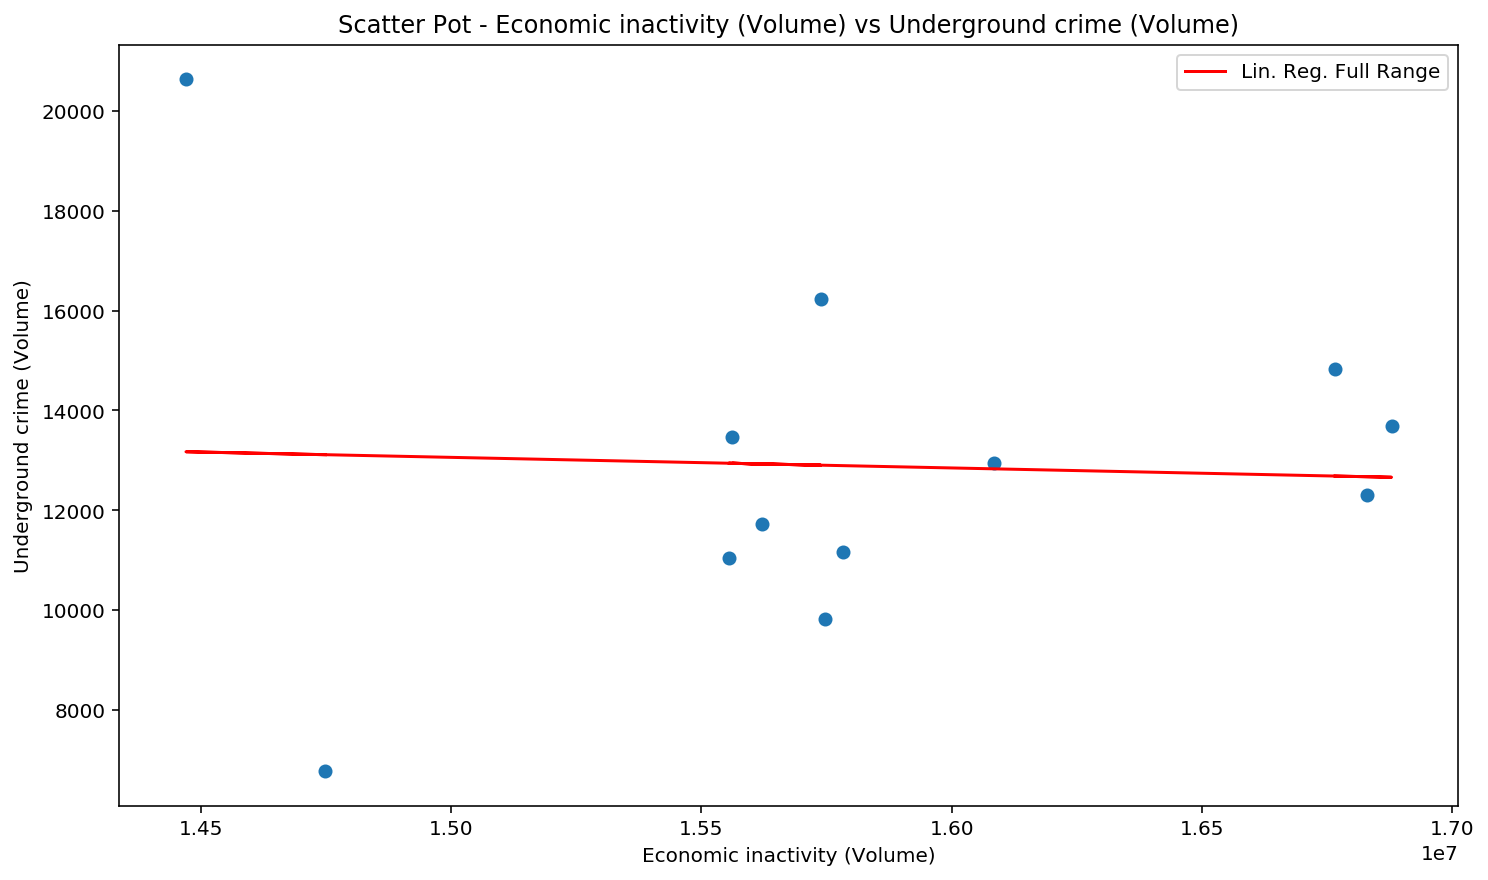

-0.0002121067845292298
16241.103608866903

Covariance: -110743638.40909094  Underground crime per Economic inactivity

Correlation Coefficient: -0.04259431259496949


In [4]:
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity
y = underground_crime_yearly
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#--------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity, underground_crime_yearly)
y_tot = economic_inactivity*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity, underground_crime_yearly)


plt.xlabel("Economic inactivity (Volume)")
plt.ylabel("Underground crime (Volume)")
plt.title("Scatter Pot - Economic inactivity (Volume) vs Underground crime (Volume)")

plt.show()

print(lin_reg_m_tot)
print(lin_reg_g_tot)
print()

#--------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity
y = underground_crime_yearly

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance


#lprint(correlation_coefficient(cycle_counts,road_disruption))
#lprint(calc_covariance(cycle_counts,road_disruption))

underground_crime_yearly_covariance = np.cov(underground_crime_yearly,economic_inactivity)[1][0]
cor_cof = np.corrcoef(economic_inactivity,underground_crime_yearly)[1][0]

print("Covariance:",underground_crime_yearly_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)



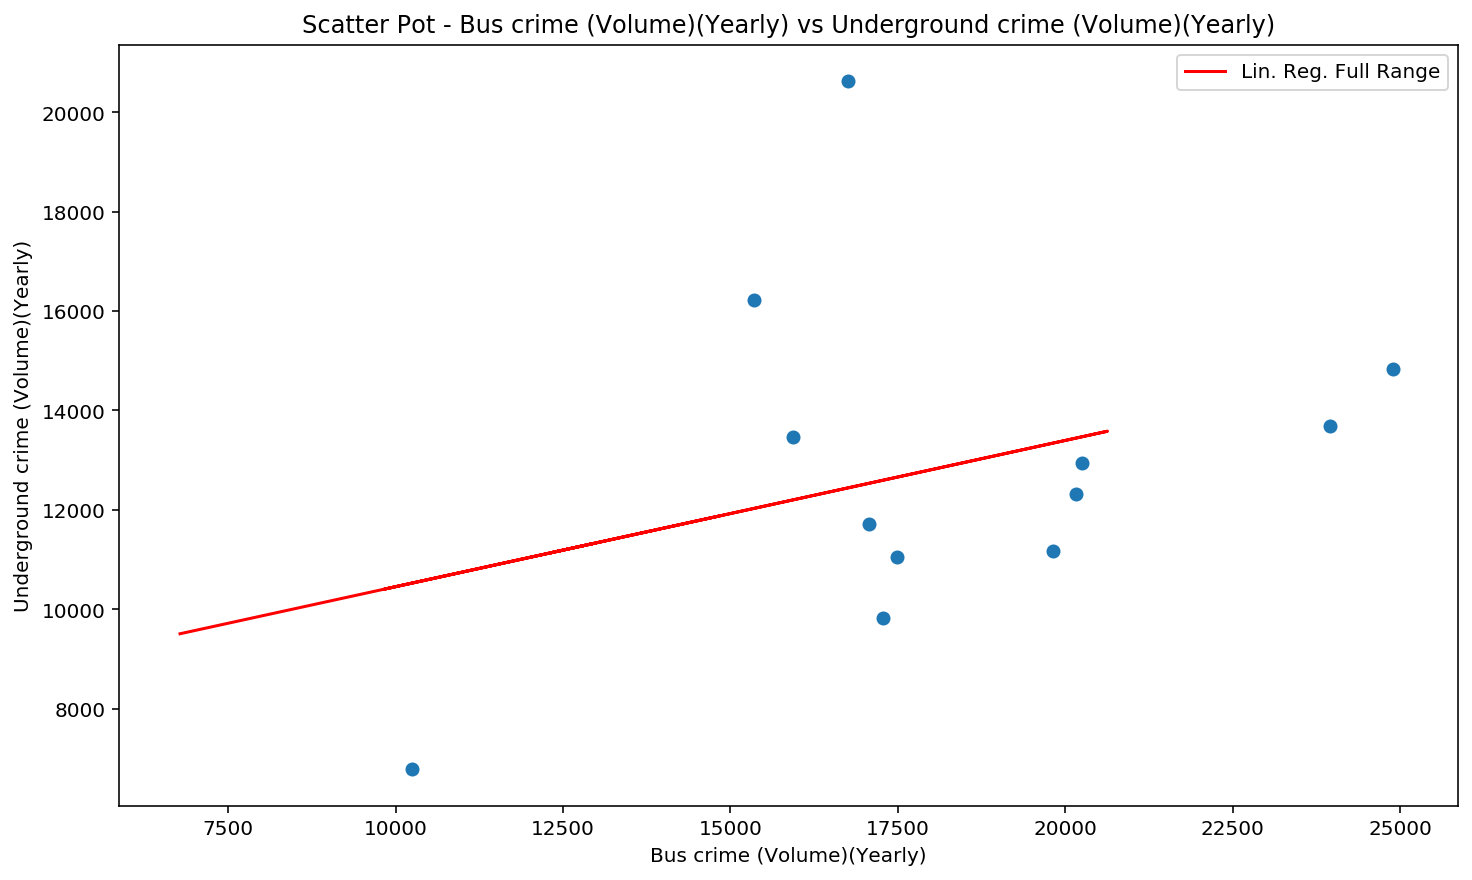

0.29426928558569326
7511.8186334201055

Covariance: 4162574.7272727275  Underground crime per Bus crime

Correlation Coefficient: 0.3075873204535054


In [5]:
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = bus_crime_yearly
y = underground_crime_yearly
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#--------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(bus_crime_yearly, underground_crime_yearly)
y_tot = underground_crime_yearly*lin_reg_m_tot+lin_reg_q_tot
plt.plot(underground_crime_yearly, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(bus_crime_yearly, underground_crime_yearly)


plt.xlabel("Bus crime (Volume)(Yearly)")
plt.ylabel("Underground crime (Volume)(Yearly)")
plt.title("Scatter Pot - Bus crime (Volume)(Yearly) vs Underground crime (Volume)(Yearly)")

plt.show()

print(lin_reg_m_tot)
print(lin_reg_g_tot)
print()

#--------------------------------------------------------------------------
#Correlation coefficient & covariance

x = bus_crime_yearly
y = underground_crime_yearly

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance


#lprint(correlation_coefficient(cycle_counts,road_disruption))
#lprint(calc_covariance(cycle_counts,road_disruption))

bus_crime_yearly_covariance = np.cov(underground_crime_yearly,bus_crime_yearly)[1][0]
cor_cof = np.corrcoef(underground_crime_yearly,bus_crime_yearly)[1][0]

print("Covariance:",bus_crime_yearly_covariance," Underground crime per Bus crime")
print()
print("Correlation Coefficient:", cor_cof)



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import chardet



"""""readData"""""
rawdata = open("TFL Bus and London underground monthly.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

file_1 ='TFL Bus and London underground monthly.csv'
file_1_cols = [0,1,2]
file_1_result = []

file_2 = 'Economic inactivity monthly.csv'
file_2_cols = [0,1]
file_2_result = []


with open(file_1,encoding=charenc) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        file_1_result.append([row[i] for i in file_1_cols])
        
with open(file_2,encoding=charenc) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        file_2_result.append([row[i] for i in file_2_cols])

combinedresult = []

for line1 in file_1_result:
    for line2 in file_2_result:
        if line1[0] == line2[0] and line1[0]:
            combinedresult.append(line1+line2[1:])


#
common_dates = []

economic_inactivity = []
bus_crime_monthly = []
underground_crime_monthly = []

for line in combinedresult[1:]:
    #print(line)
    common_dates.append(line[0])
    economic_inactivity.append(float(line[1]))
    bus_crime_monthly.append(float(line[2]))
    underground_crime_monthly.append(float(line[3]))

common_dates = np.array(common_dates)

economic_inactivity = np.array(economic_inactivity)
bus_crime_monthly = np.array(bus_crime_monthly)
underground_crime_monthly = np.array(underground_crime_monthly)

print(("{:^20s} {:^25s} {:^30s} {:^35s}").format("Dates", "Economic inactivity", "Bus crime", "Underground crime"))
for i in range(len(common_dates)):
      print(("{:^20s} {:15.4f} {:28.4f} {:32.4f}").format(common_dates[i], economic_inactivity[i], bus_crime_monthly[i], underground_crime_monthly[i]))


UTF-8-SIG
       Dates            Economic inactivity              Bus crime                     Underground crime         
       Jan-10                10.6000                      13.6000                          25.9000
       Feb-10                12.0000                      13.1000                          25.8000
       Mar-10                12.0000                      12.5000                          25.9000
       Apr-10                10.7000                      12.0000                          25.6000
       May-10                10.0000                      11.9000                          25.2000
       Jun-10                10.6000                      10.7000                          25.1000
       Jul-10                10.9000                      11.5000                          25.0000
       Aug-10                10.6000                      11.3000                          25.1000
       Sep-10                 9.7000                      10.8000                   

In [7]:
#Separates data into each year
#Common dates split into each year
list_2010 = common_dates[:12]
list_2011 = common_dates[12:24]
list_2012 = common_dates[24:36]
list_2013 = common_dates[36:48]
list_2014 = common_dates[48:60]
list_2015 = common_dates[60:72]
list_2016 = common_dates[72:84]
list_2017 = common_dates[84:96]
list_2018 = common_dates[96:108]
list_2019 = common_dates[108:120]
list_2020 = common_dates[120:132]
list_2021 = common_dates[132:144]

#Economic inactivity split into each year
economic_inactivity_2010 = economic_inactivity [:12]
economic_inactivity_2011 = economic_inactivity [12:24]
economic_inactivity_2012 = economic_inactivity [24:36]
economic_inactivity_2013 = economic_inactivity [36:48]
economic_inactivity_2014 = economic_inactivity [48:60]
economic_inactivity_2015 = economic_inactivity [60:72]
economic_inactivity_2016 = economic_inactivity [72:84]
economic_inactivity_2017 = economic_inactivity [84:96]
economic_inactivity_2018 = economic_inactivity [96:108]
economic_inactivity_2019 = economic_inactivity [108:120]
economic_inactivity_2020 = economic_inactivity [120:132]
economic_inactivity_2021 = economic_inactivity [132:144]

#Bus crime split into each year
bus_crime_2010 = bus_crime_monthly [:12]
bus_crime_2011 = bus_crime_monthly [12:24]
bus_crime_2012 = bus_crime_monthly [24:36]
bus_crime_2013 = bus_crime_monthly [36:48]
bus_crime_2014 = bus_crime_monthly [48:60]
bus_crime_2015 = bus_crime_monthly [60:72]
bus_crime_2016 = bus_crime_monthly [72:84]
bus_crime_2017 = bus_crime_monthly [84:96]
bus_crime_2018 = bus_crime_monthly [96:108]
bus_crime_2019 = bus_crime_monthly [108:120]
bus_crime_2020 = bus_crime_monthly [120:132]
bus_crime_2021 = bus_crime_monthly [132:144]

#Underground crime split into each year
underground_crime_2010 = underground_crime_monthly [:12]
underground_crime_2011 = underground_crime_monthly [12:24]
underground_crime_2012 = underground_crime_monthly [24:36]
underground_crime_2013 = underground_crime_monthly [36:48]
underground_crime_2014 = underground_crime_monthly [48:60]
underground_crime_2015 = underground_crime_monthly [60:72]
underground_crime_2016 = underground_crime_monthly [72:84]
underground_crime_2017 = underground_crime_monthly [84:96]
underground_crime_2018 = underground_crime_monthly [96:108]
underground_crime_2019 = underground_crime_monthly [108:120]
underground_crime_2020 = underground_crime_monthly [120:132]
underground_crime_2021 = underground_crime_monthly [132:144]

#Turning them all into list

list_of_2010 = list(list_2010)
list_of_2011 = list(list_2011)
list_of_2012 = list(list_2012)
list_of_2013 = list(list_2013)
list_of_2014 = list(list_2014)
list_of_2015 = list(list_2015)
list_of_2016 = list(list_2016)
list_of_2017 = list(list_2017)
list_of_2018 = list(list_2018)
list_of_2019 = list(list_2019)
list_of_2020 = list(list_2020)
list_of_2021 = list(list_2021)

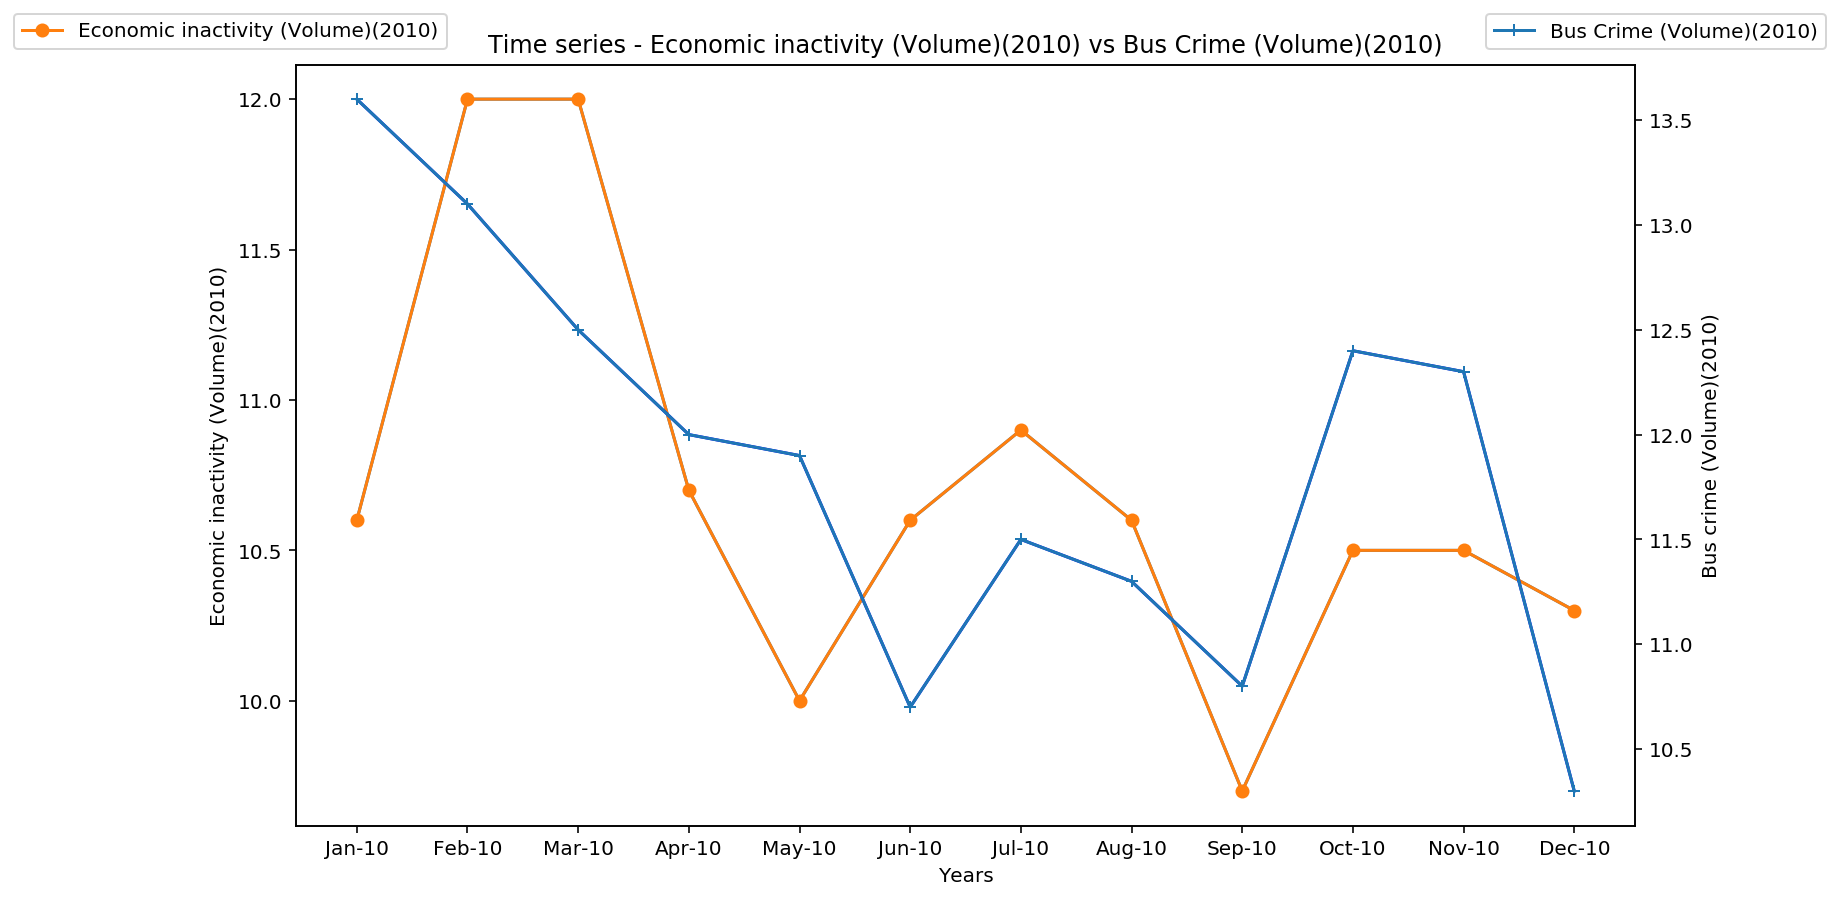

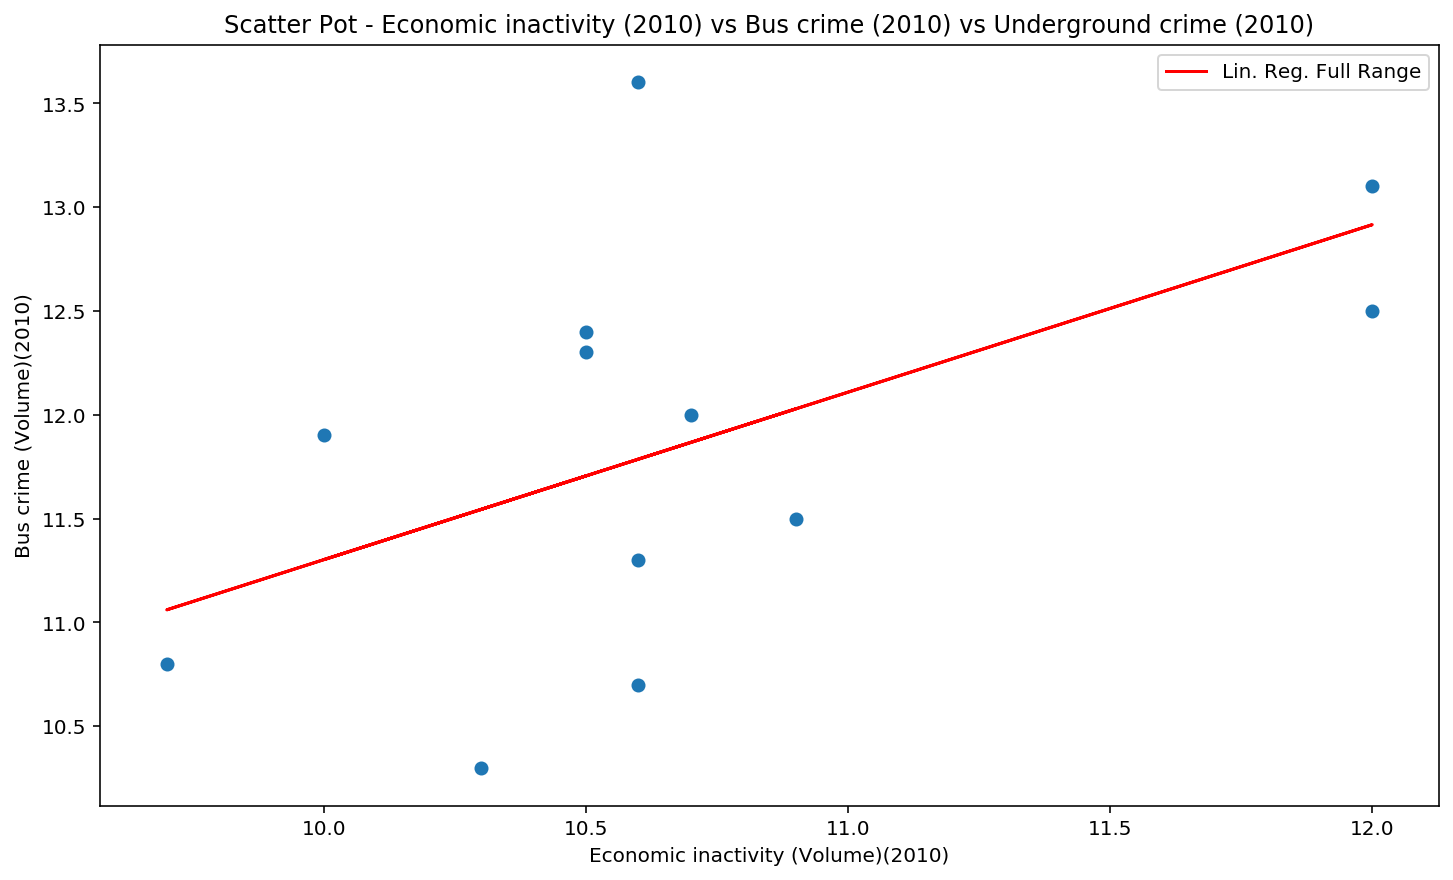

0.8065988065988059 Linear regression
3.2360594360594455 Linear regression

Covariance: 0.34818181818181787  Bus crime per Economic inactivity

Correlation Coefficient: 0.511430366743869


In [8]:
# 2010 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2010):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2010)")
ax1.set_title("Time series - Economic inactivity (Volume)(2010) vs Bus Crime (Volume)(2010)")

ax1.plot(list_2010, economic_inactivity_2010)
ax1.plot(list_2010, economic_inactivity_2010, marker='o', label='Economic inactivity (Volume)(2010)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2010)")
ax2.plot(list_2010,bus_crime_2010,'b')
ax2.plot(list_2010,bus_crime_2010, marker='+',label='Bus Crime (Volume)(2010)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2010):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2010
y = bus_crime_2010
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2010, bus_crime_2010)
y_tot = economic_inactivity_2010*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2010, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2010, bus_crime_2010)


plt.xlabel("Economic inactivity (Volume)(2010)")
plt.ylabel("Bus crime (Volume)(2010)")
plt.title("Scatter Pot - Economic inactivity (2010) vs Bus crime (2010) vs Underground crime (2010)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2010
y = bus_crime_2010

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2010_covariance = np.cov(bus_crime_2010,economic_inactivity_2010)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2010,bus_crime_2010)[1][0]

print("Covariance:",bus_crime_2010_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

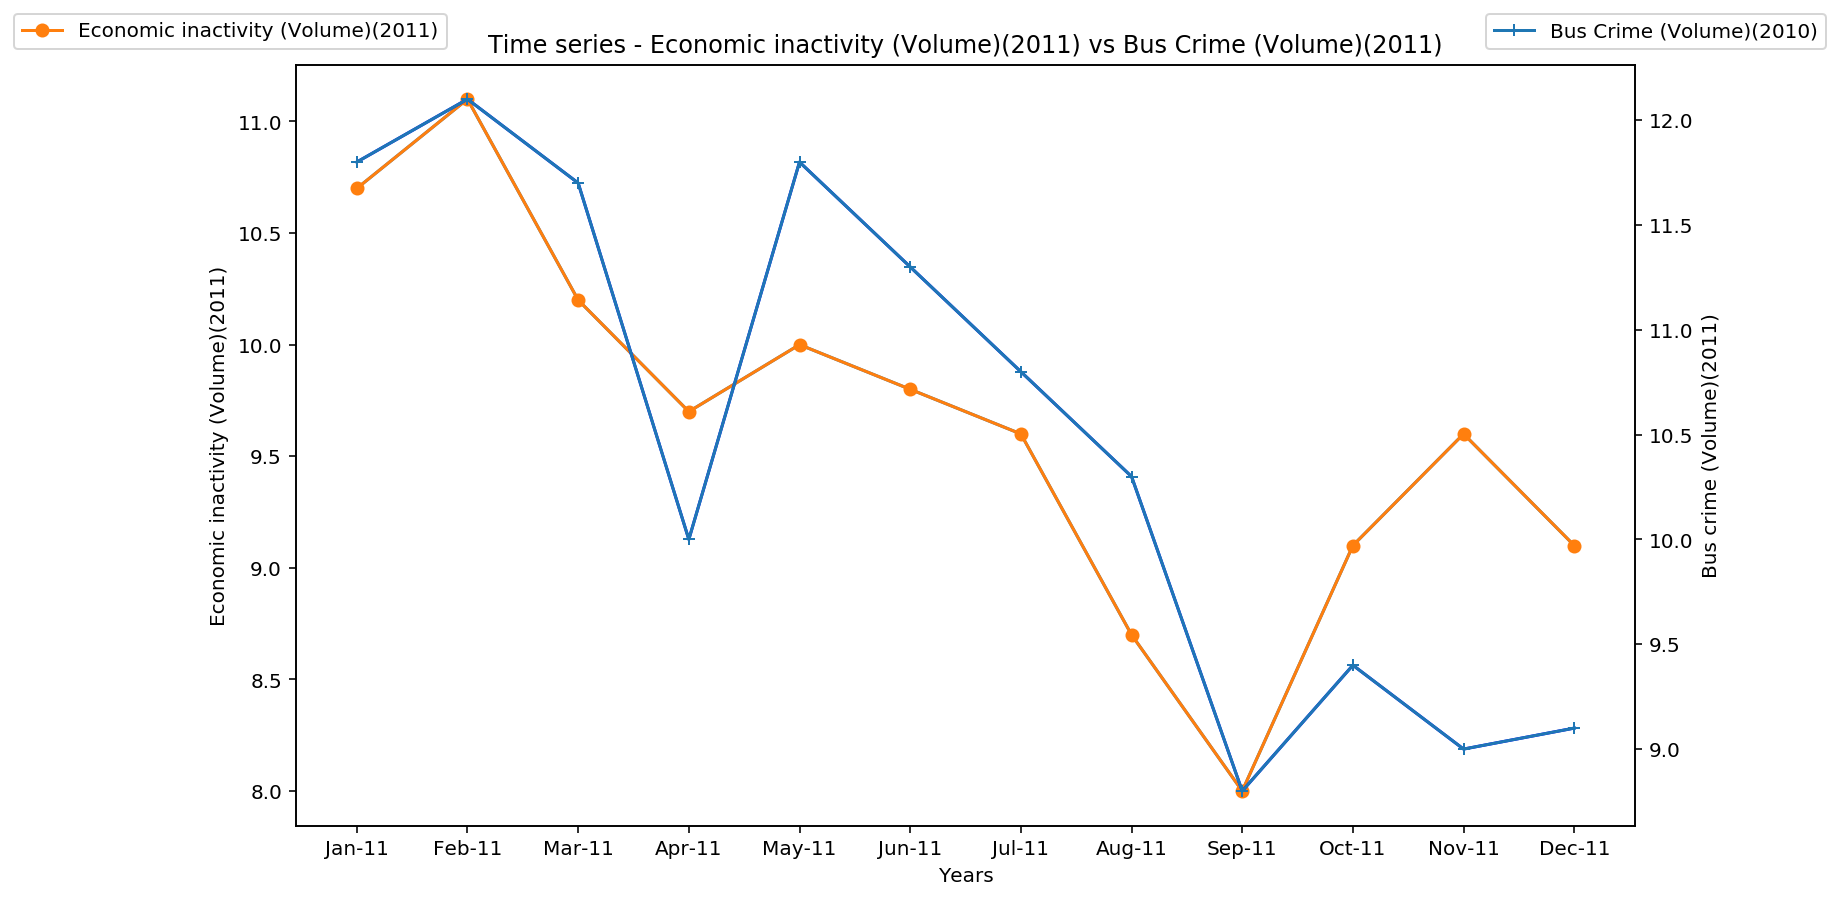

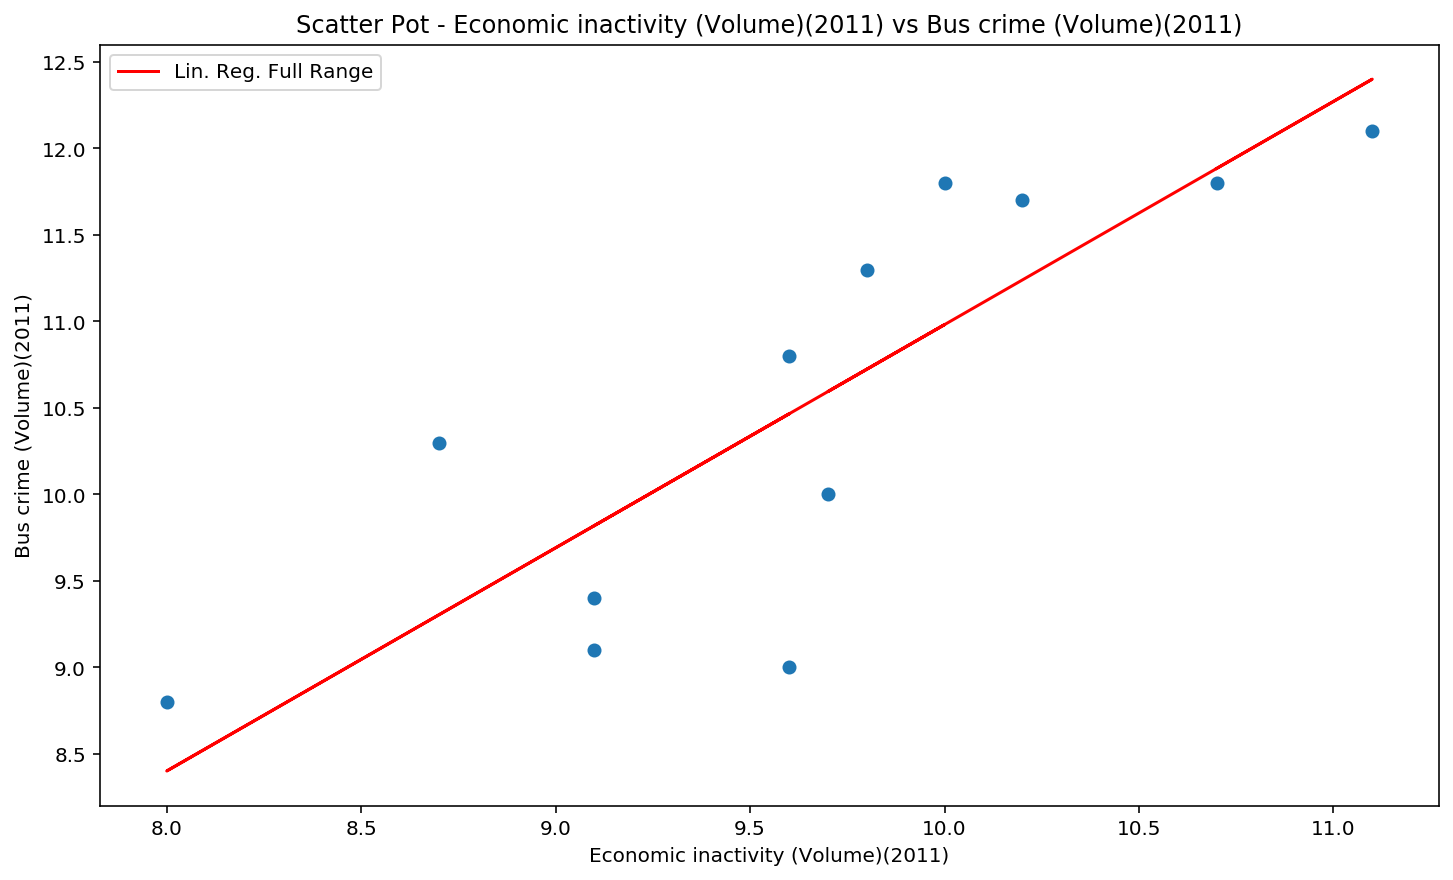

1.2900945208637513 Linear regression
-1.919577217654135 Linear regression

Covariance: 0.8478787878787876  Bus crime per Economic inactivity

Correlation Coefficient: 0.8124606149302476


In [9]:
# 2011 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2011)")
ax1.set_title("Time series - Economic inactivity (Volume)(2011) vs Bus Crime (Volume)(2011)")

ax1.plot(list_2011, economic_inactivity_2011)
ax1.plot(list_2011, economic_inactivity_2011, marker='o', label='Economic inactivity (Volume)(2011)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2011)")
ax2.plot(bus_crime_2011,'b')
ax2.plot(bus_crime_2011, marker='+',label='Bus Crime (Volume)(2010)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2011):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2011
y = bus_crime_2011
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2011, bus_crime_2011)
y_tot = economic_inactivity_2011*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2011, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2011, bus_crime_2011)


plt.xlabel("Economic inactivity (Volume)(2011)")
plt.ylabel("Bus crime (Volume)(2011)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2011) vs Bus crime (Volume)(2011)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2011
y = bus_crime_2011

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2011_covariance = np.cov(bus_crime_2011,economic_inactivity_2011)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2011,bus_crime_2011)[1][0]

print("Covariance:",bus_crime_2011_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

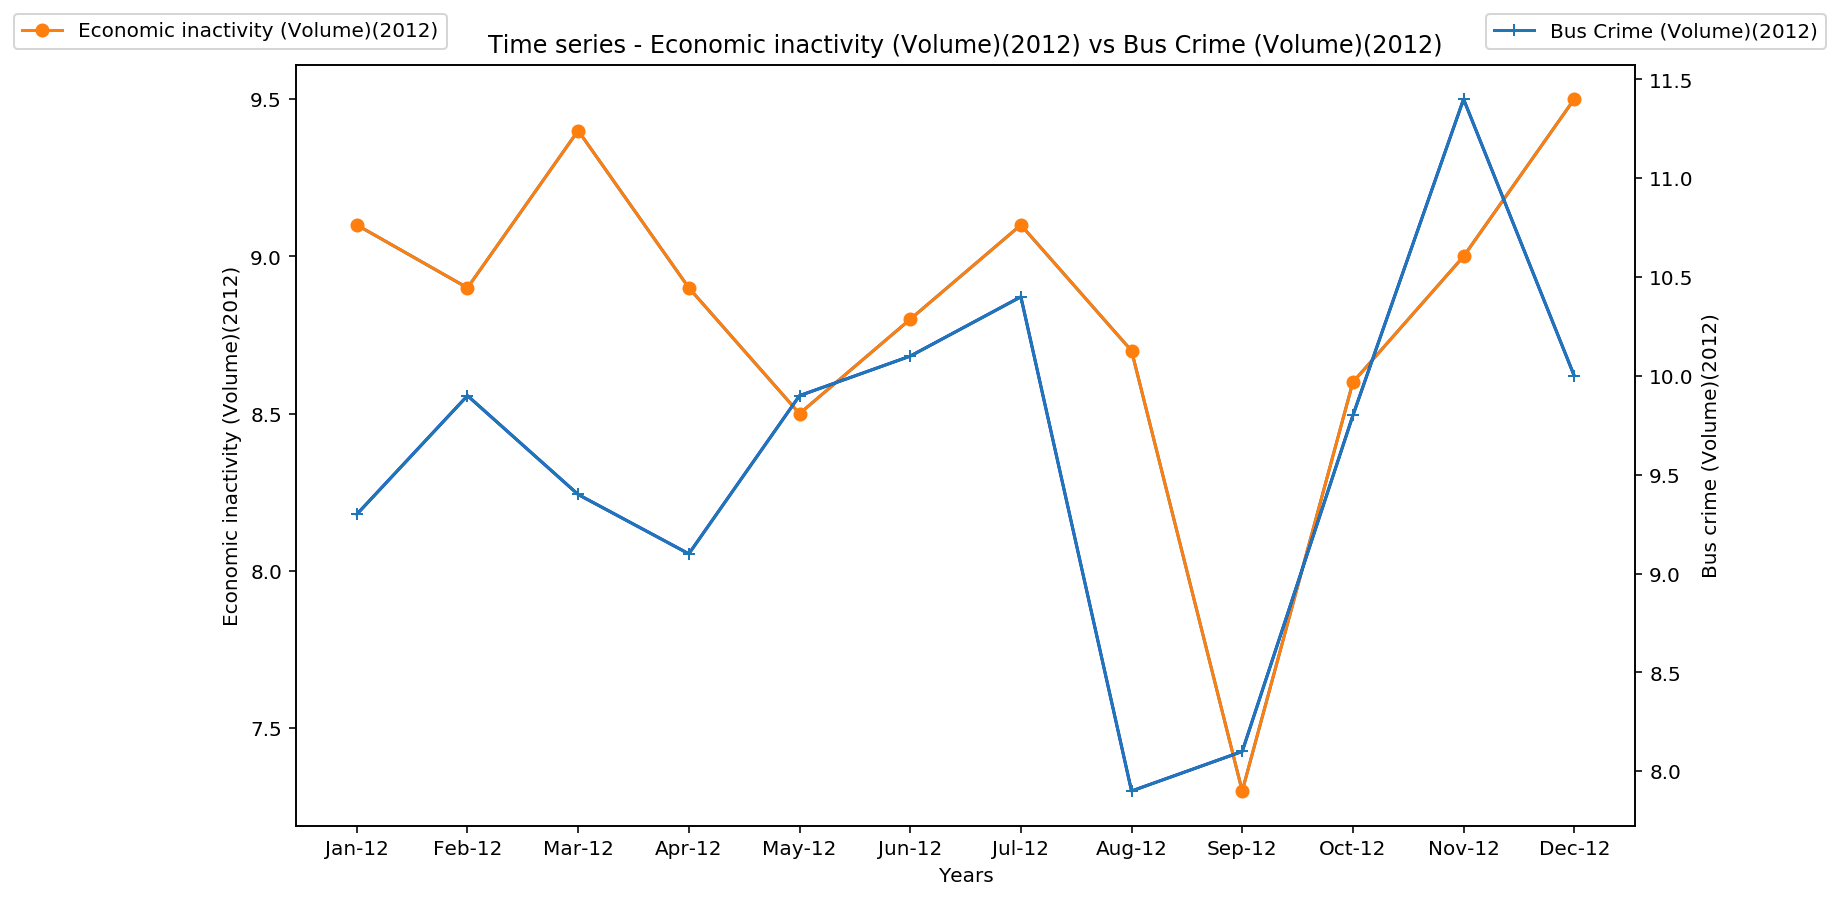

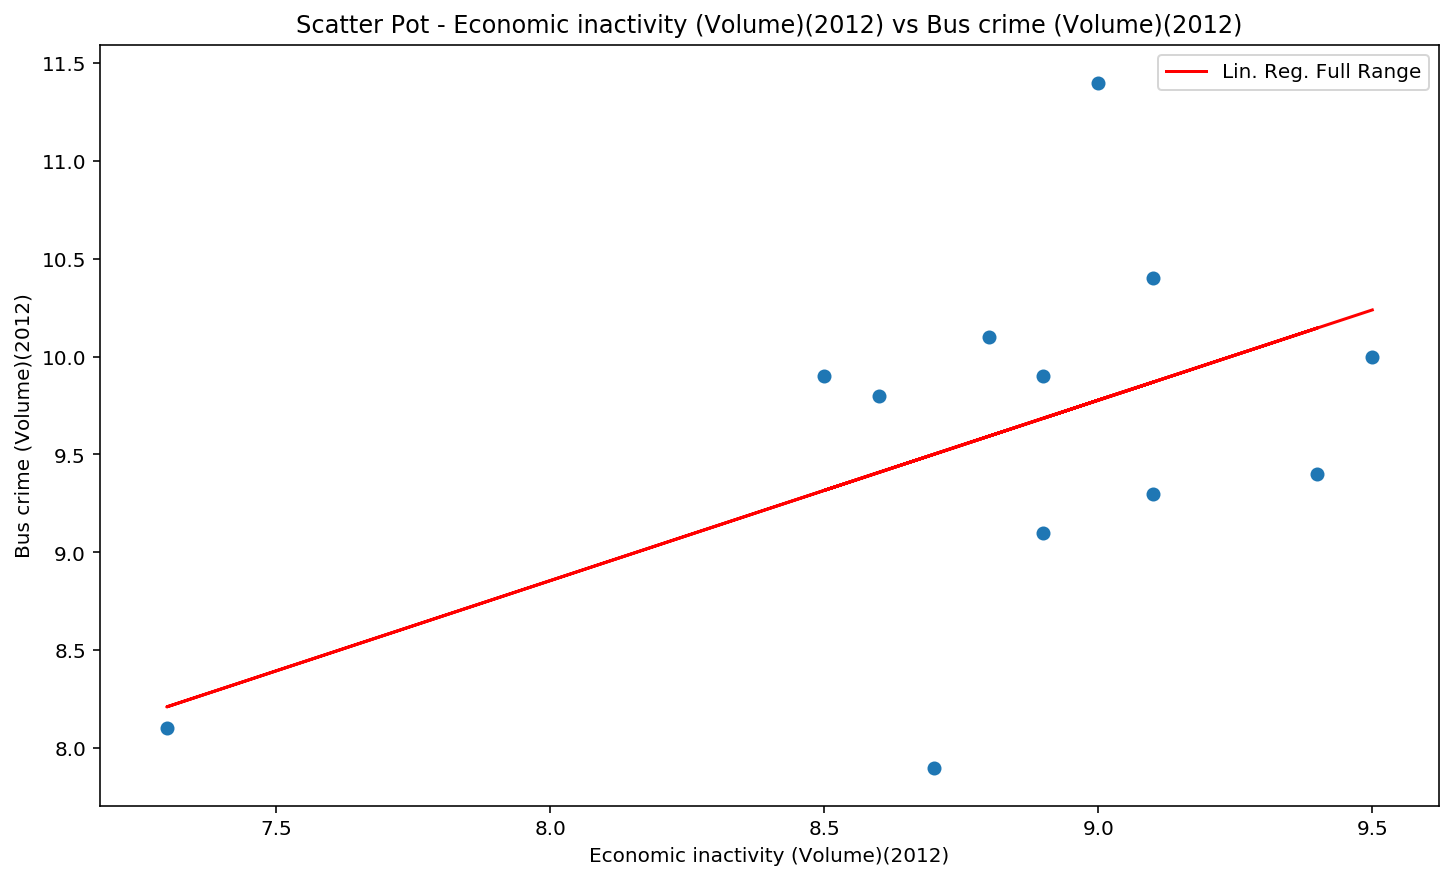

0.9219907609169355 Linear regression
1.479448124582353 Linear regression

Covariance: 0.2671212121212123  Bus crime per Economic inactivity

Correlation Coefficient: 0.4976077214913106


In [10]:
# 2012 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2012)")
ax1.set_title("Time series - Economic inactivity (Volume)(2012) vs Bus Crime (Volume)(2012)")

ax1.plot(list_2012, economic_inactivity_2012)
ax1.plot(list_2012, economic_inactivity_2012, marker='o', label='Economic inactivity (Volume)(2012)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2012)")
ax2.plot(bus_crime_2012,'b')
ax2.plot(bus_crime_2012, marker='+',label='Bus Crime (Volume)(2012)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2012):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2012
y = bus_crime_2012
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2012, bus_crime_2012)
y_tot = economic_inactivity_2012*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2012, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2012, bus_crime_2012)


plt.xlabel("Economic inactivity (Volume)(2012)")
plt.ylabel("Bus crime (Volume)(2012)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2012) vs Bus crime (Volume)(2012)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2012
y = bus_crime_2012

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2012_covariance = np.cov(bus_crime_2012,economic_inactivity_2012)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2012,bus_crime_2012)[1][0]

print("Covariance:",bus_crime_2012_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)




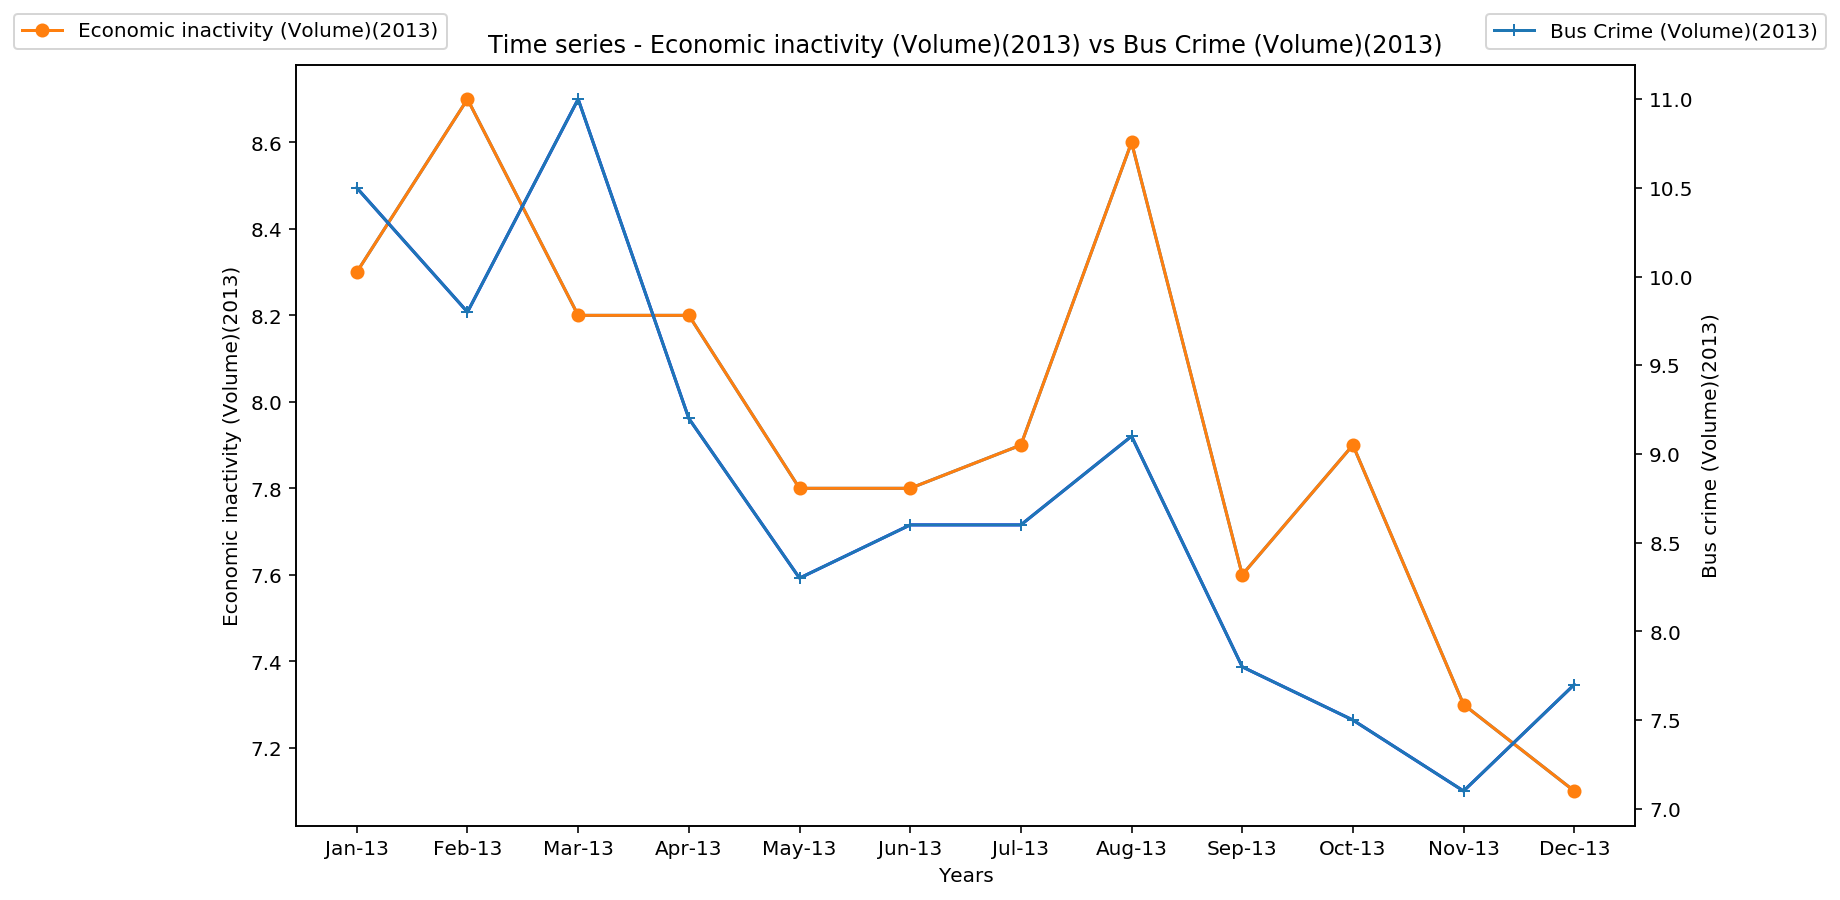

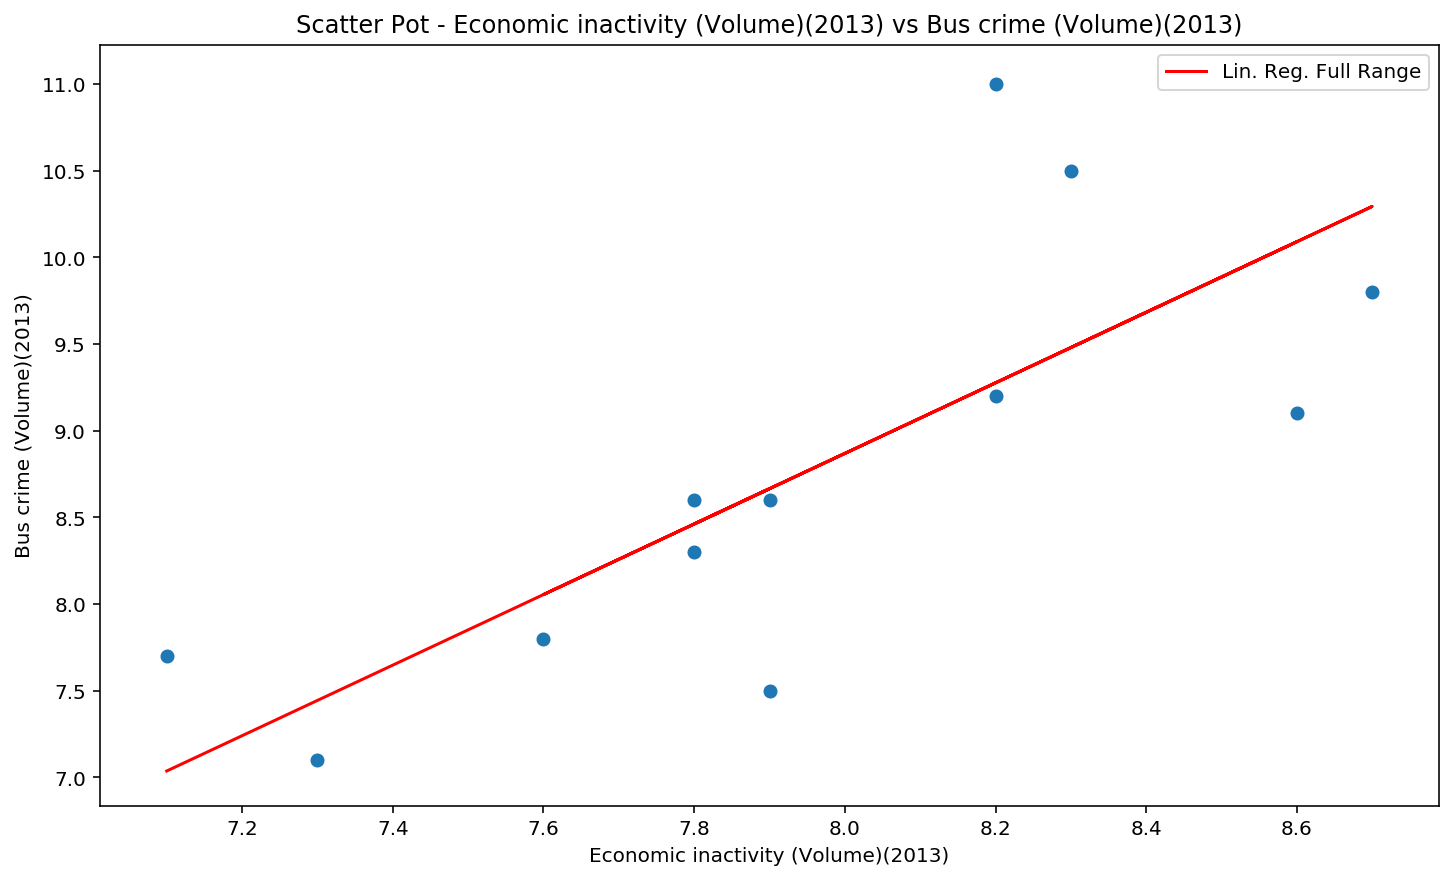

2.0363636363636366 Linear regression
-7.4224242424242455 Linear regression

Covariance: 0.43272727272727274  Bus crime per Economic inactivity

Correlation Coefficient: 0.7431968000673413


In [11]:
## 2013 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2013)")
ax1.set_title("Time series - Economic inactivity (Volume)(2013) vs Bus Crime (Volume)(2013)")

ax1.plot(list_2013, economic_inactivity_2013)
ax1.plot(list_2013, economic_inactivity_2013, marker='o', label='Economic inactivity (Volume)(2013)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2013)")
ax2.plot(bus_crime_2013,'b')
ax2.plot(bus_crime_2013, marker='+',label='Bus Crime (Volume)(2013)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2013):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2013
y = bus_crime_2013
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2013, bus_crime_2013)
y_tot = economic_inactivity_2013*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2013, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2013, bus_crime_2013)


plt.xlabel("Economic inactivity (Volume)(2013)")
plt.ylabel("Bus crime (Volume)(2013)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2013) vs Bus crime (Volume)(2013)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2013
y = bus_crime_2013

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2013_covariance = np.cov(bus_crime_2013,economic_inactivity_2013)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2013,bus_crime_2013)[1][0]

print("Covariance:",bus_crime_2013_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)




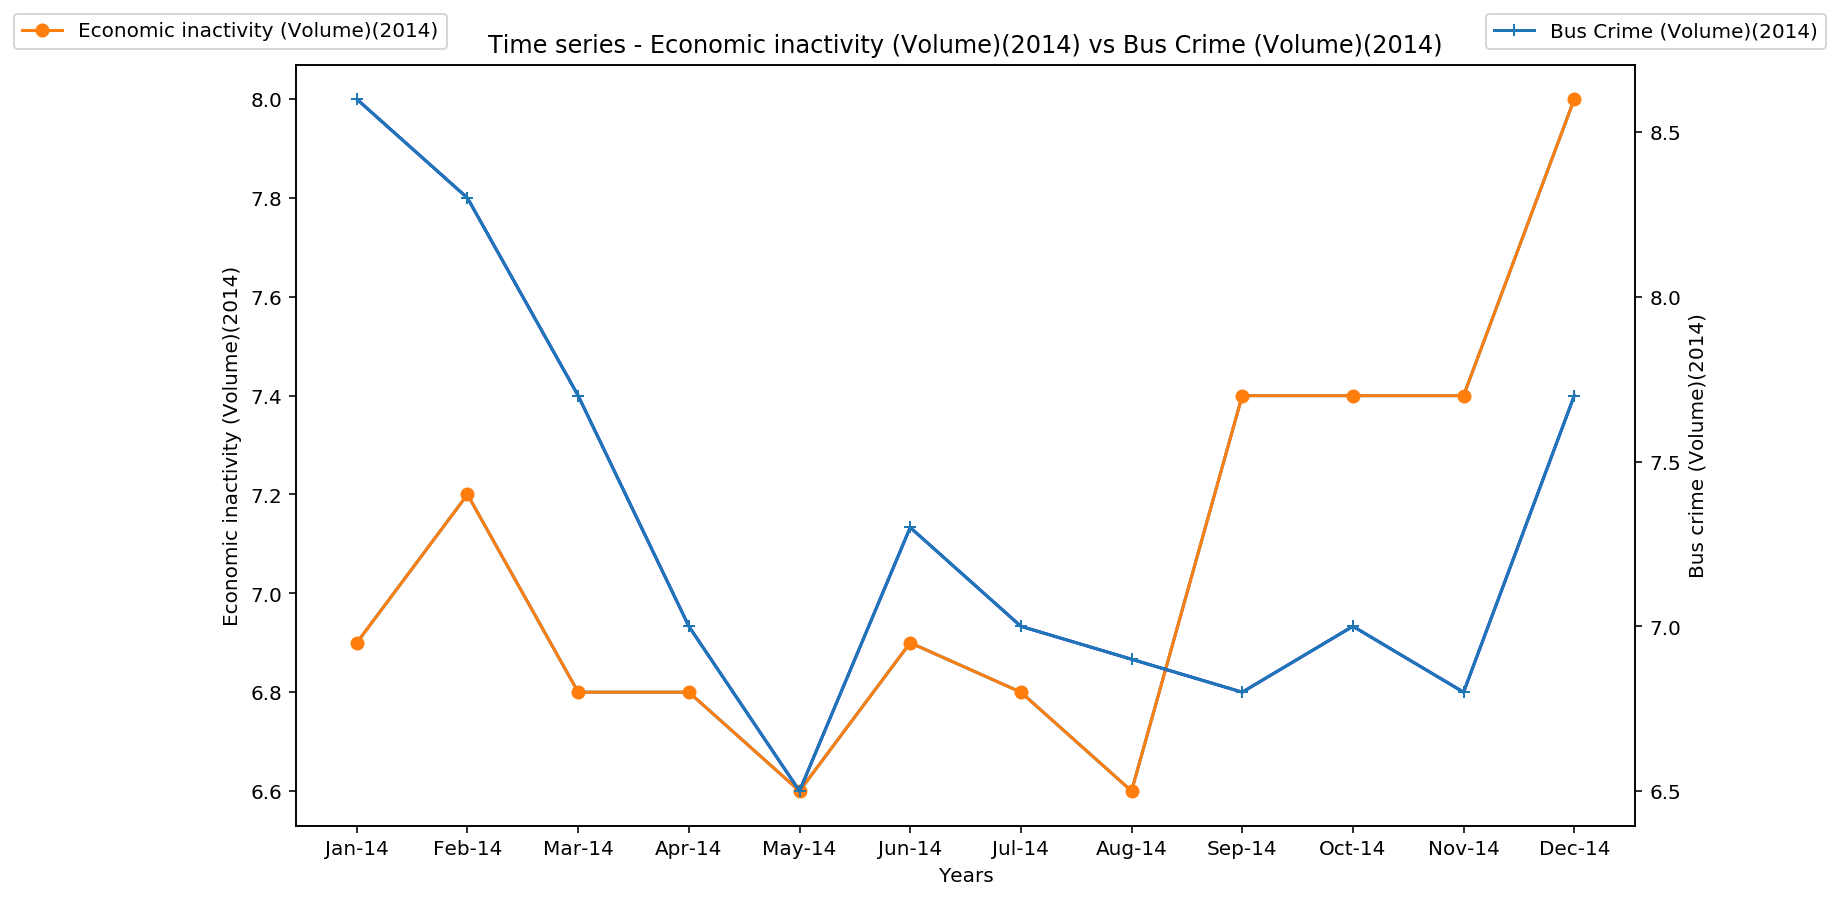

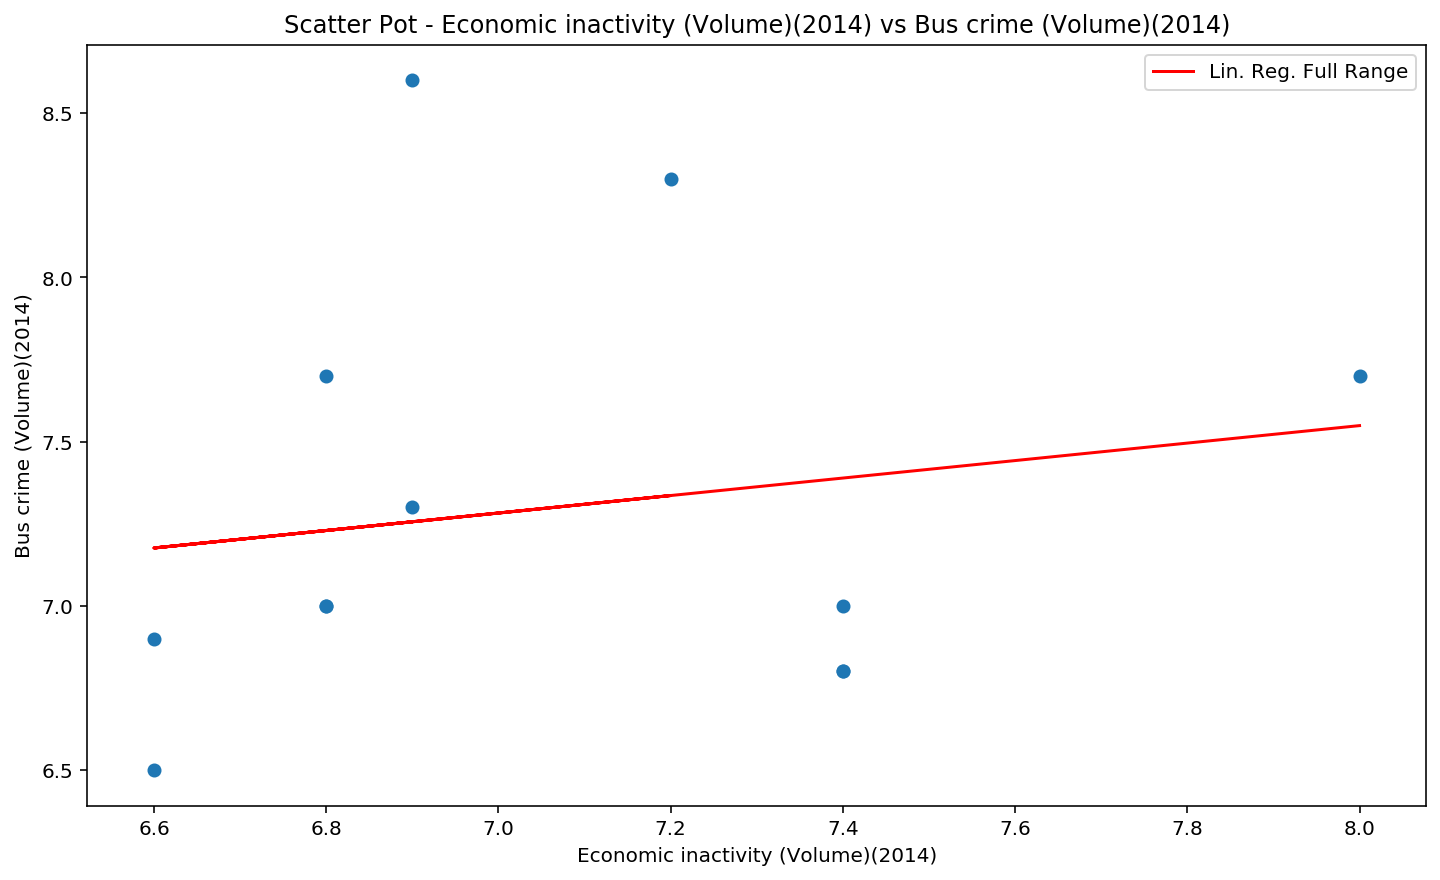

0.2661214218307645 Linear regression
5.419408619062597 Linear regression

Covariance: 0.04272727272727279  Bus crime per Economic inactivity

Correlation Coefficient: 0.15822016281474827


In [12]:
# 2014 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2014)")
ax1.set_title("Time series - Economic inactivity (Volume)(2014) vs Bus Crime (Volume)(2014)")

ax1.plot(list_2014, economic_inactivity_2014)
ax1.plot(list_2014, economic_inactivity_2014, marker='o', label='Economic inactivity (Volume)(2014)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2014)")
ax2.plot(bus_crime_2014,'b')
ax2.plot(bus_crime_2014, marker='+',label='Bus Crime (Volume)(2014)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2014):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2014
y = bus_crime_2014
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2014, bus_crime_2014)
y_tot = economic_inactivity_2014*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2014, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2014, bus_crime_2014)


plt.xlabel("Economic inactivity (Volume)(2014)")
plt.ylabel("Bus crime (Volume)(2014)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2014) vs Bus crime (Volume)(2014)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2014
y = bus_crime_2014

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2014_covariance = np.cov(bus_crime_2014,economic_inactivity_2014)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2014,bus_crime_2014)[1][0]

print("Covariance:",bus_crime_2014_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)




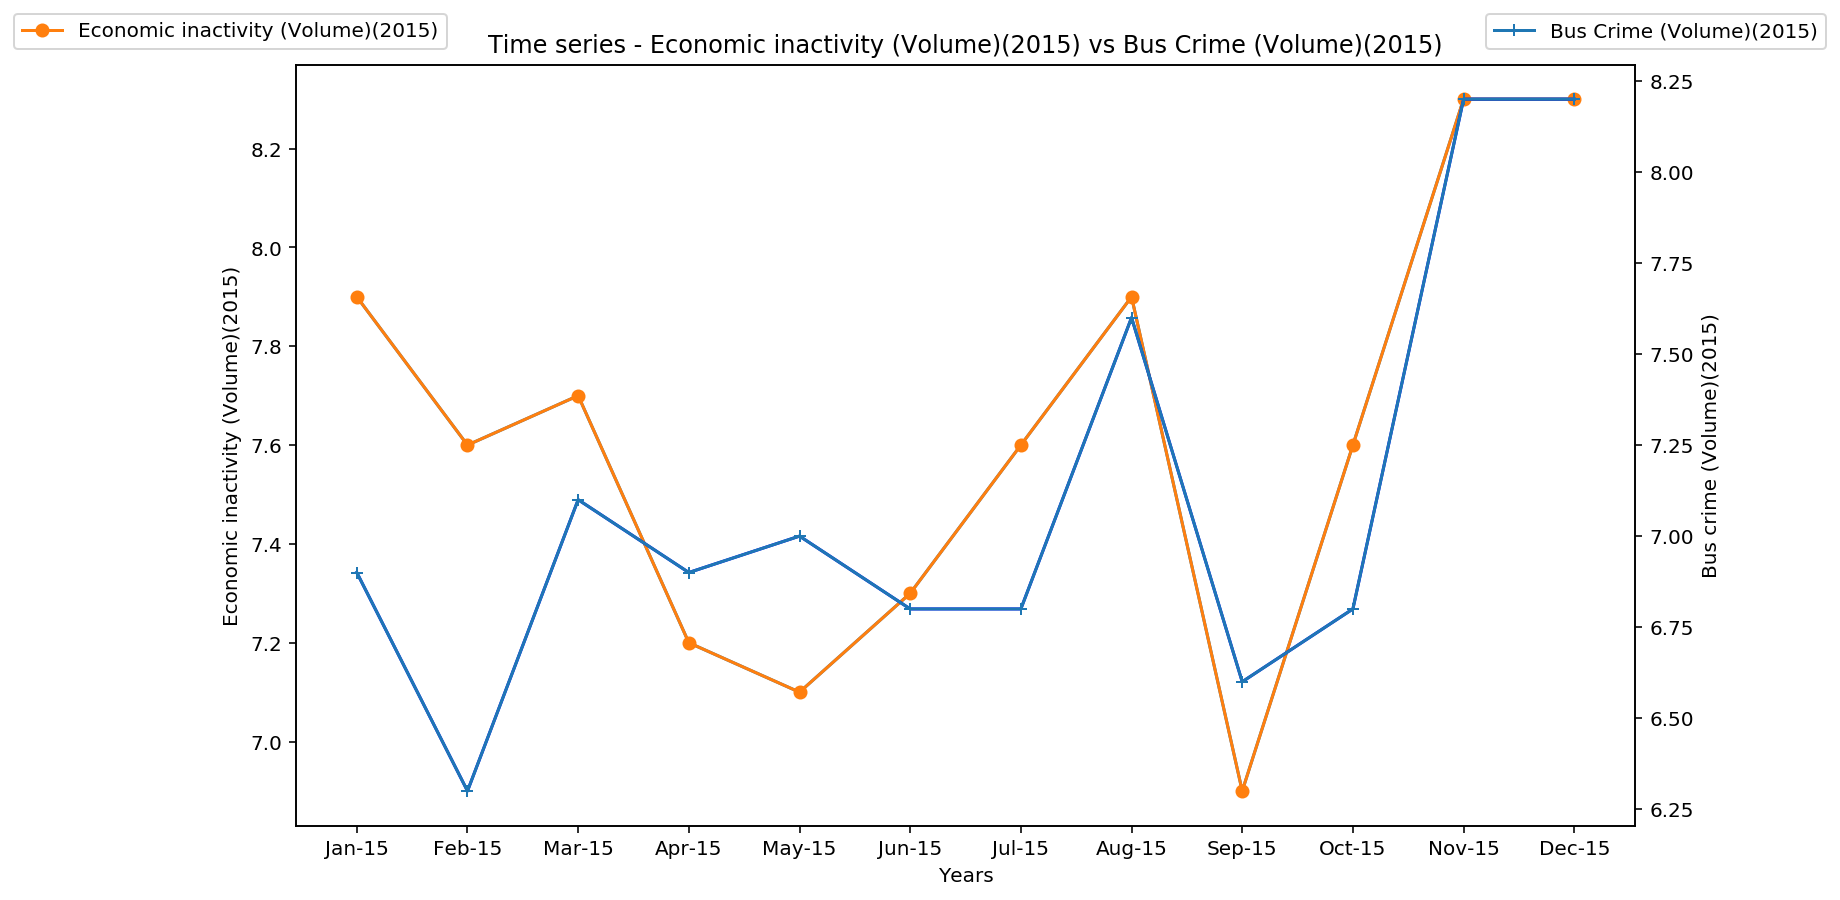

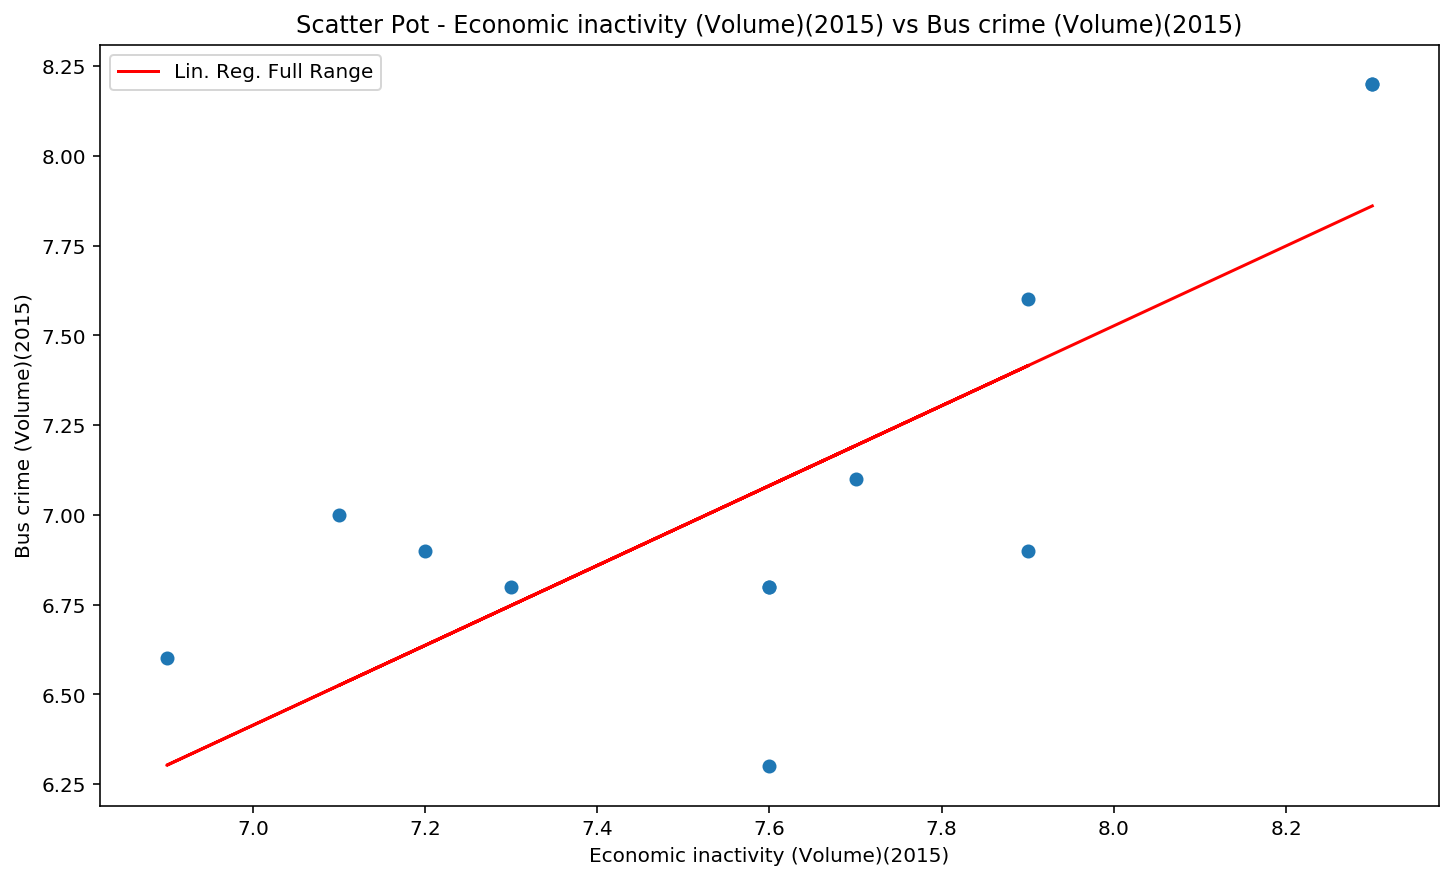

1.1128284389489944 Linear regression
-1.3760432766615063 Linear regression

Covariance: 0.2000000000000001  Bus crime per Economic inactivity

Correlation Coefficient: 0.7566379749520751


In [13]:
# 2015 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2015)")
ax1.set_title("Time series - Economic inactivity (Volume)(2015) vs Bus Crime (Volume)(2015)")

ax1.plot(list_2015, economic_inactivity_2015)
ax1.plot(list_2015, economic_inactivity_2015, marker='o', label='Economic inactivity (Volume)(2015)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2015)")
ax2.plot(bus_crime_2015,'b')
ax2.plot(bus_crime_2015, marker='+',label='Bus Crime (Volume)(2015)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2015):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2015
y = bus_crime_2015
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2015, bus_crime_2015)
y_tot = economic_inactivity_2015*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2015, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2015, bus_crime_2015)


plt.xlabel("Economic inactivity (Volume)(2015)")
plt.ylabel("Bus crime (Volume)(2015)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2015) vs Bus crime (Volume)(2015)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2015
y = bus_crime_2015

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2015_covariance = np.cov(bus_crime_2015,economic_inactivity_2015)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2015,bus_crime_2015)[1][0]

print("Covariance:",bus_crime_2015_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)




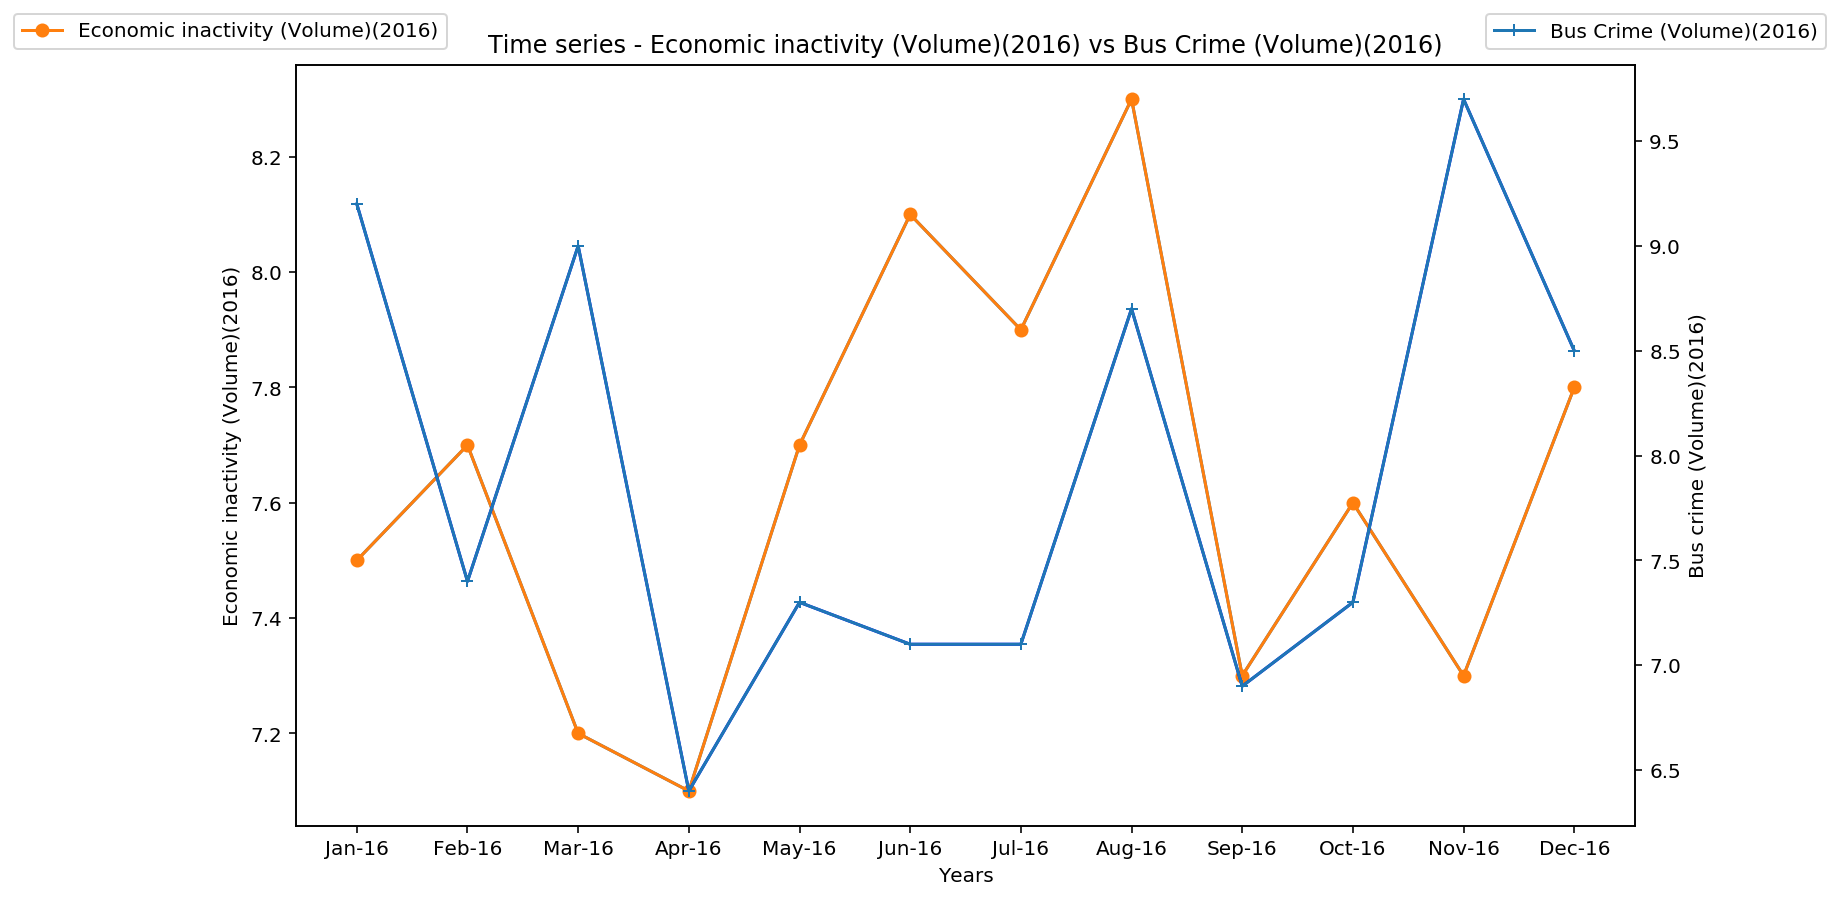

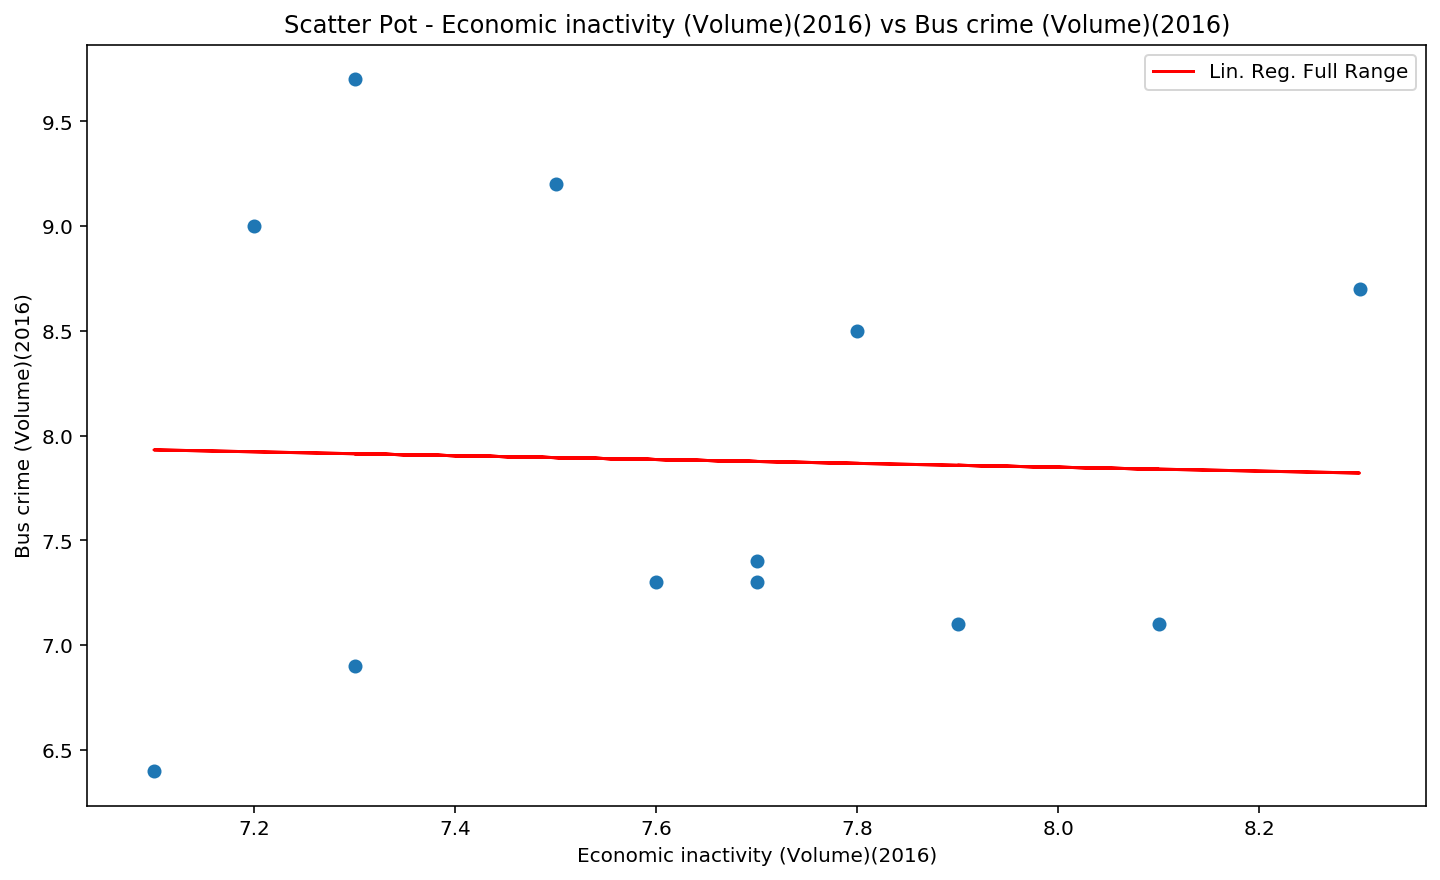

-0.09198221677142387 Linear regression
8.584697736215439 Linear regression

Covariance: -0.01136363636363633  Bus crime per Economic inactivity

Correlation Coefficient: -0.028879947348998944


In [14]:
# 2016 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2016)")
ax1.set_title("Time series - Economic inactivity (Volume)(2016) vs Bus Crime (Volume)(2016)")

ax1.plot(list_2016, economic_inactivity_2016)
ax1.plot(list_2016, economic_inactivity_2016, marker='o', label='Economic inactivity (Volume)(2016)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2016)")
ax2.plot(bus_crime_2016,'b')
ax2.plot(bus_crime_2016, marker='+',label='Bus Crime (Volume)(2016)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2016):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2016
y = bus_crime_2016
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2016, bus_crime_2016)
y_tot = economic_inactivity_2016*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2016, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2016, bus_crime_2016)


plt.xlabel("Economic inactivity (Volume)(2016)")
plt.ylabel("Bus crime (Volume)(2016)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2016) vs Bus crime (Volume)(2016)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2016
y = bus_crime_2016

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2016_covariance = np.cov(bus_crime_2016,economic_inactivity_2016)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2016,bus_crime_2016)[1][0]

print("Covariance:",bus_crime_2016_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)




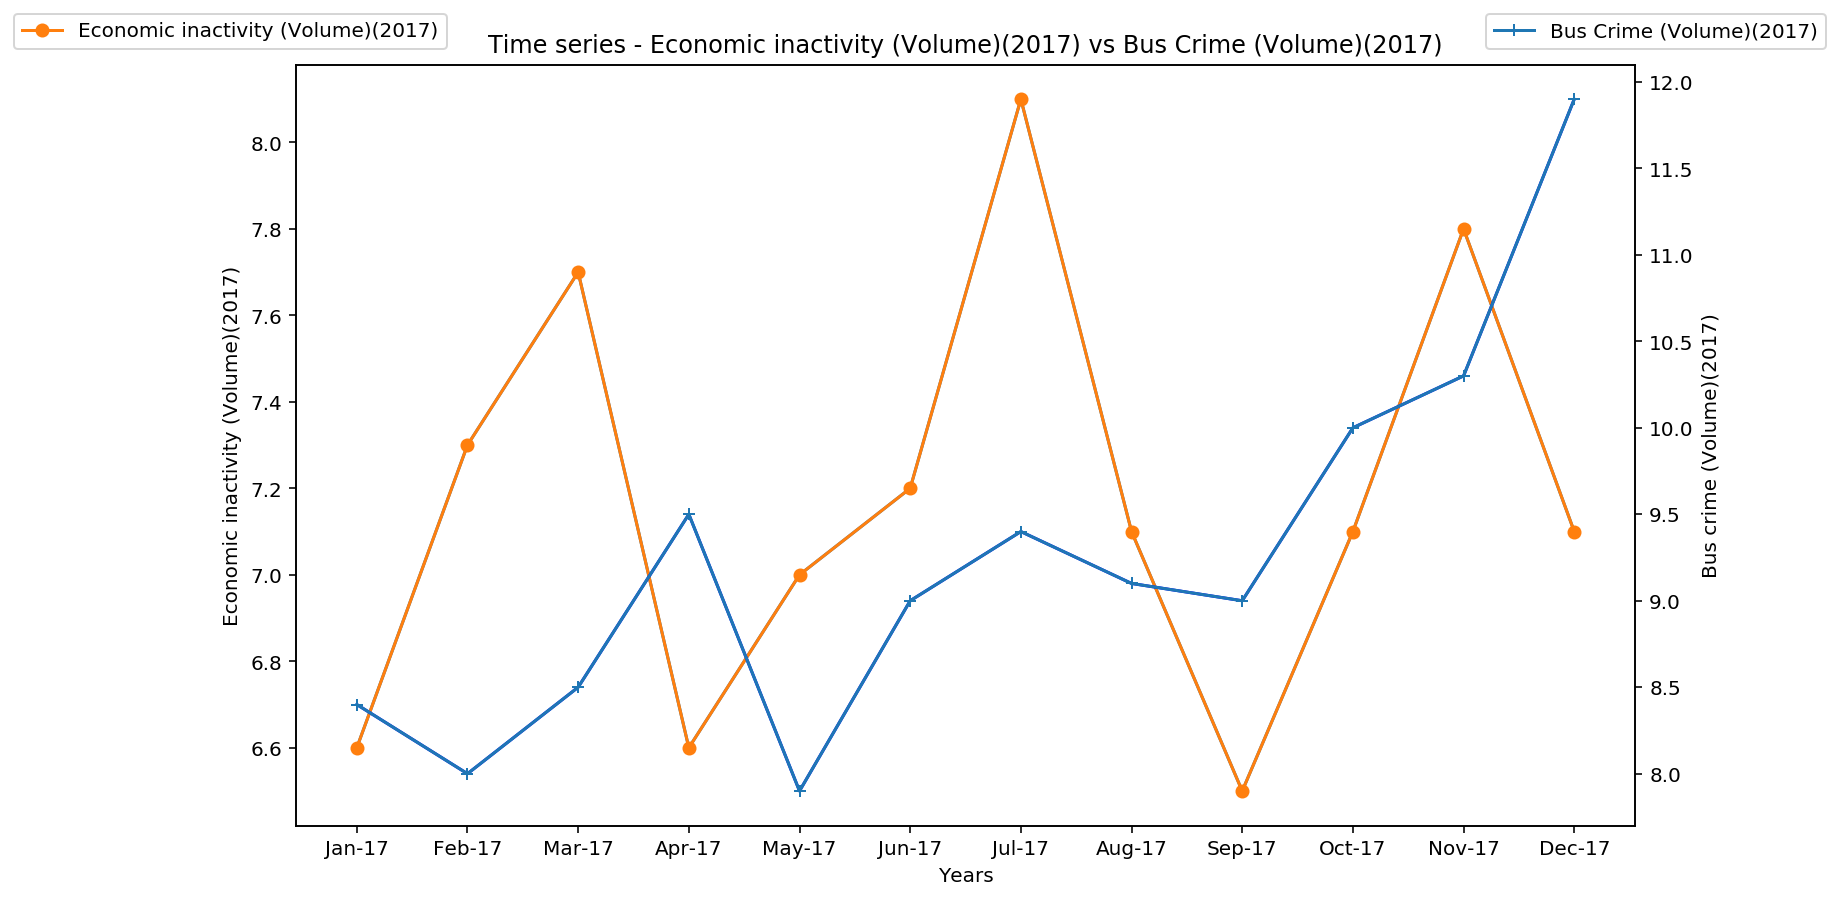

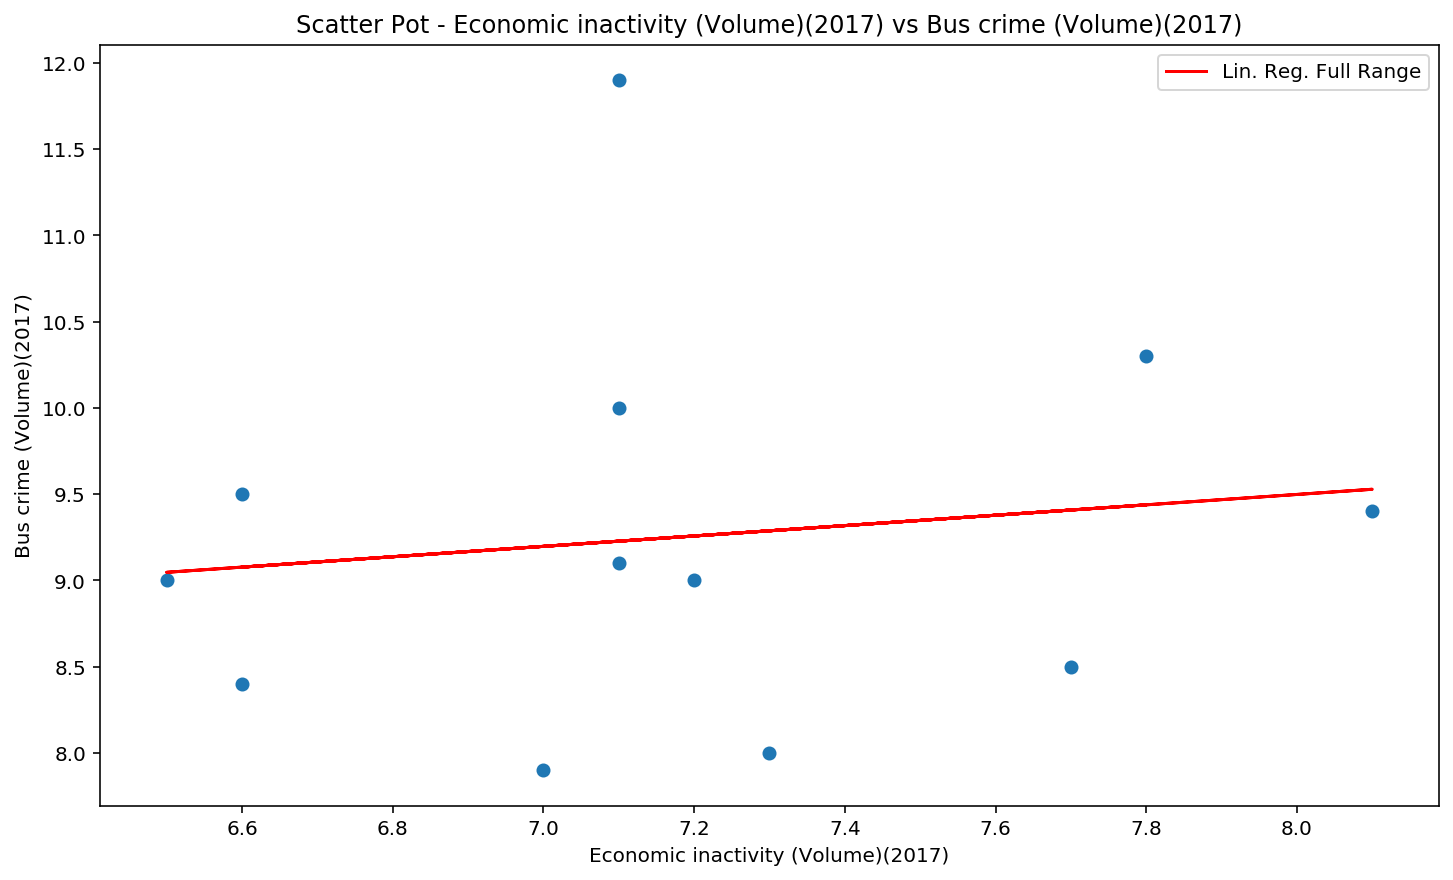

0.3007316457825244 Linear regression
7.092250441510387 Linear regression

Covariance: 0.06772727272727268  Bus crime per Economic inactivity

Correlation Coefficient: 0.027730712278884916


In [15]:
# 2017 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2017)")
ax1.set_title("Time series - Economic inactivity (Volume)(2017) vs Bus Crime (Volume)(2017)")

ax1.plot(list_2017, economic_inactivity_2017)
ax1.plot(list_2017, economic_inactivity_2017, marker='o', label='Economic inactivity (Volume)(2017)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2017)")
ax2.plot(bus_crime_2017,'b')
ax2.plot(bus_crime_2017, marker='+',label='Bus Crime (Volume)(2017)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2017):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2017
y = bus_crime_2017
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2017, bus_crime_2017)
y_tot = economic_inactivity_2017*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2017, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2017, bus_crime_2017)


plt.xlabel("Economic inactivity (Volume)(2017)")
plt.ylabel("Bus crime (Volume)(2017)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2017) vs Bus crime (Volume)(2017)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2017
y = bus_crime_2017

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2017_covariance = np.cov(bus_crime_2017,economic_inactivity_2017)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2017,bus_crime_2010)[1][0]

print("Covariance:",bus_crime_2017_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)





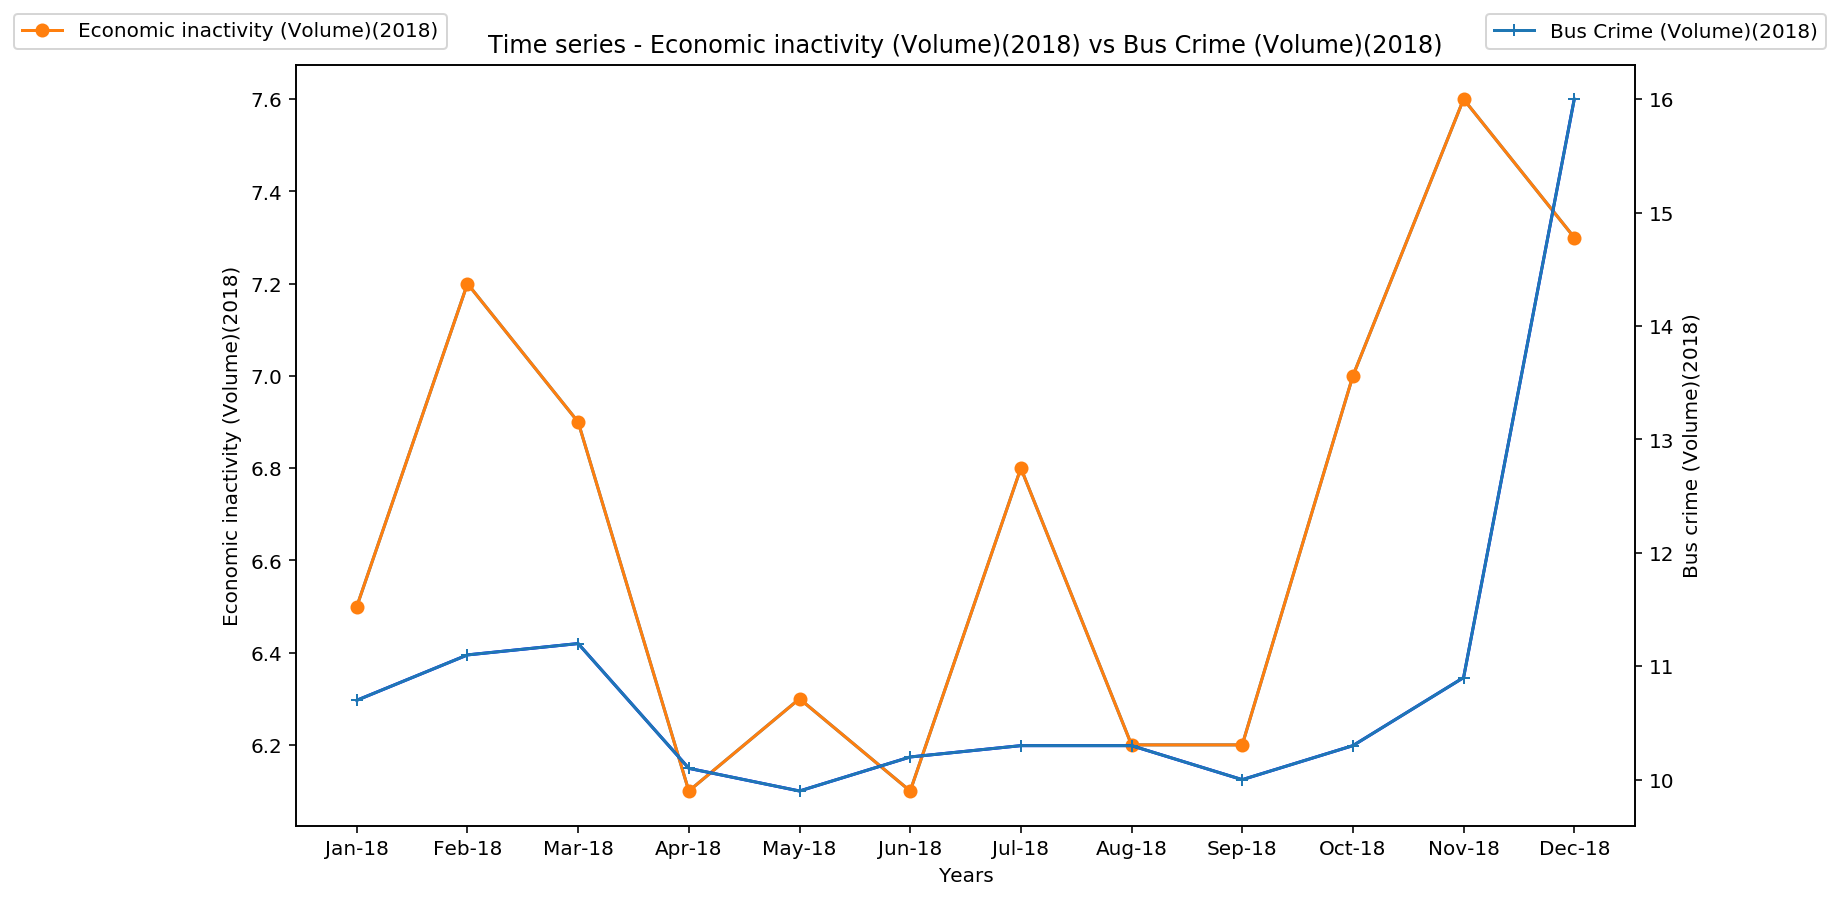

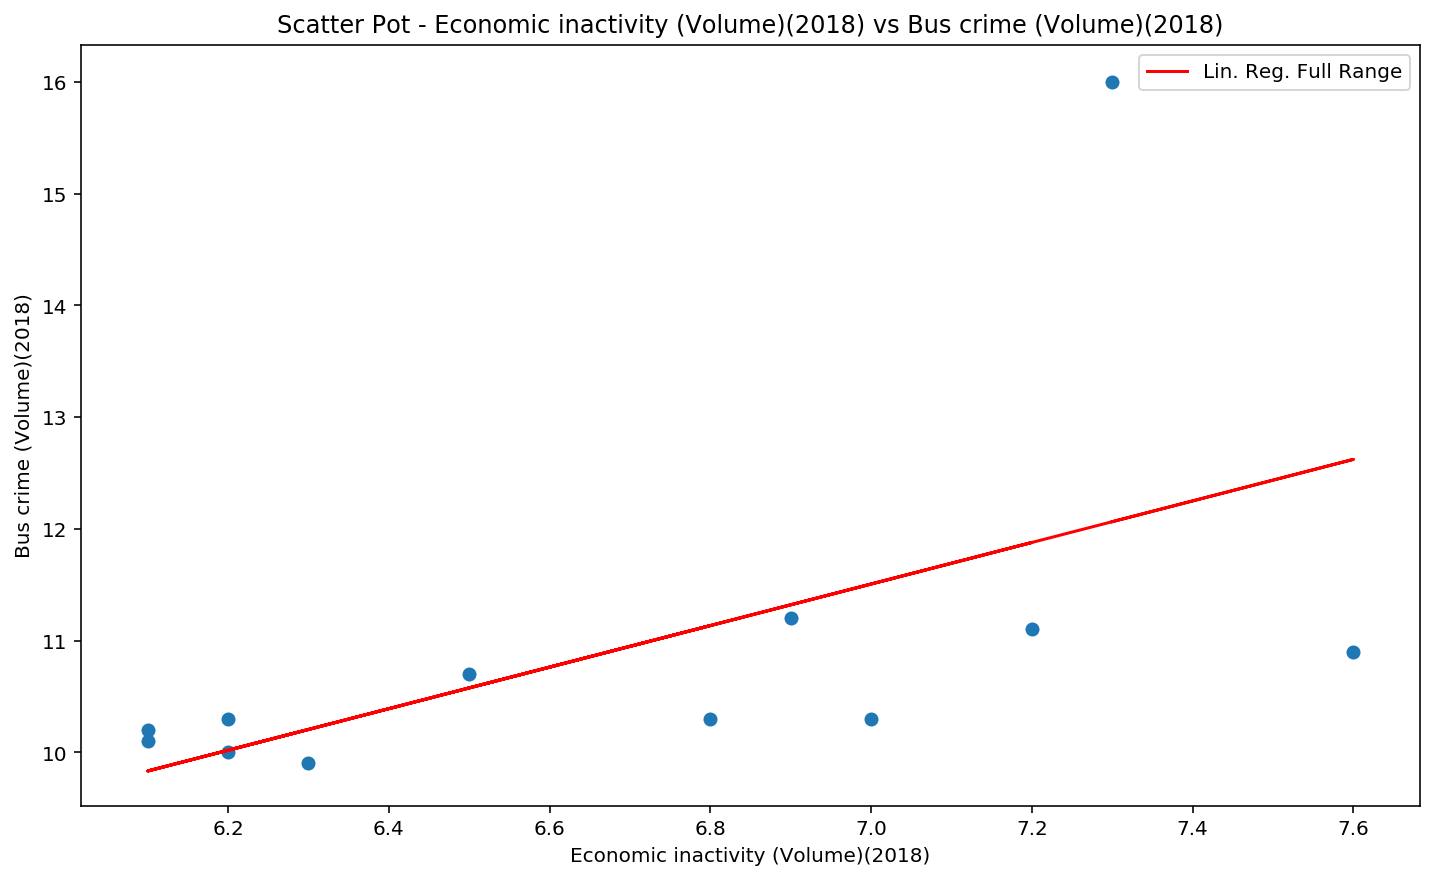

1.8593097831619672 Linear regression
-1.5097203841324802 Linear regression

Covariance: 0.4612121212121213  Bus crime per Economic inactivity

Correlation Coefficient: 0.5351170554143666


In [16]:
# 2018 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2018)")
ax1.set_title("Time series - Economic inactivity (Volume)(2018) vs Bus Crime (Volume)(2018)")

ax1.plot(list_2018, economic_inactivity_2018)
ax1.plot(list_2018, economic_inactivity_2018, marker='o', label='Economic inactivity (Volume)(2018)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2018)")
ax2.plot(bus_crime_2018,'b')
ax2.plot(bus_crime_2018, marker='+',label='Bus Crime (Volume)(2018)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2018):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2018
y = bus_crime_2018
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2018, bus_crime_2018)
y_tot = economic_inactivity_2018*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2018, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2018, bus_crime_2018)


plt.xlabel("Economic inactivity (Volume)(2018)")
plt.ylabel("Bus crime (Volume)(2018)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2018) vs Bus crime (Volume)(2018)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2018
y = bus_crime_2018

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2018_covariance = np.cov(bus_crime_2018,economic_inactivity_2018)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2018,bus_crime_2018)[1][0]

print("Covariance:",bus_crime_2018_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)




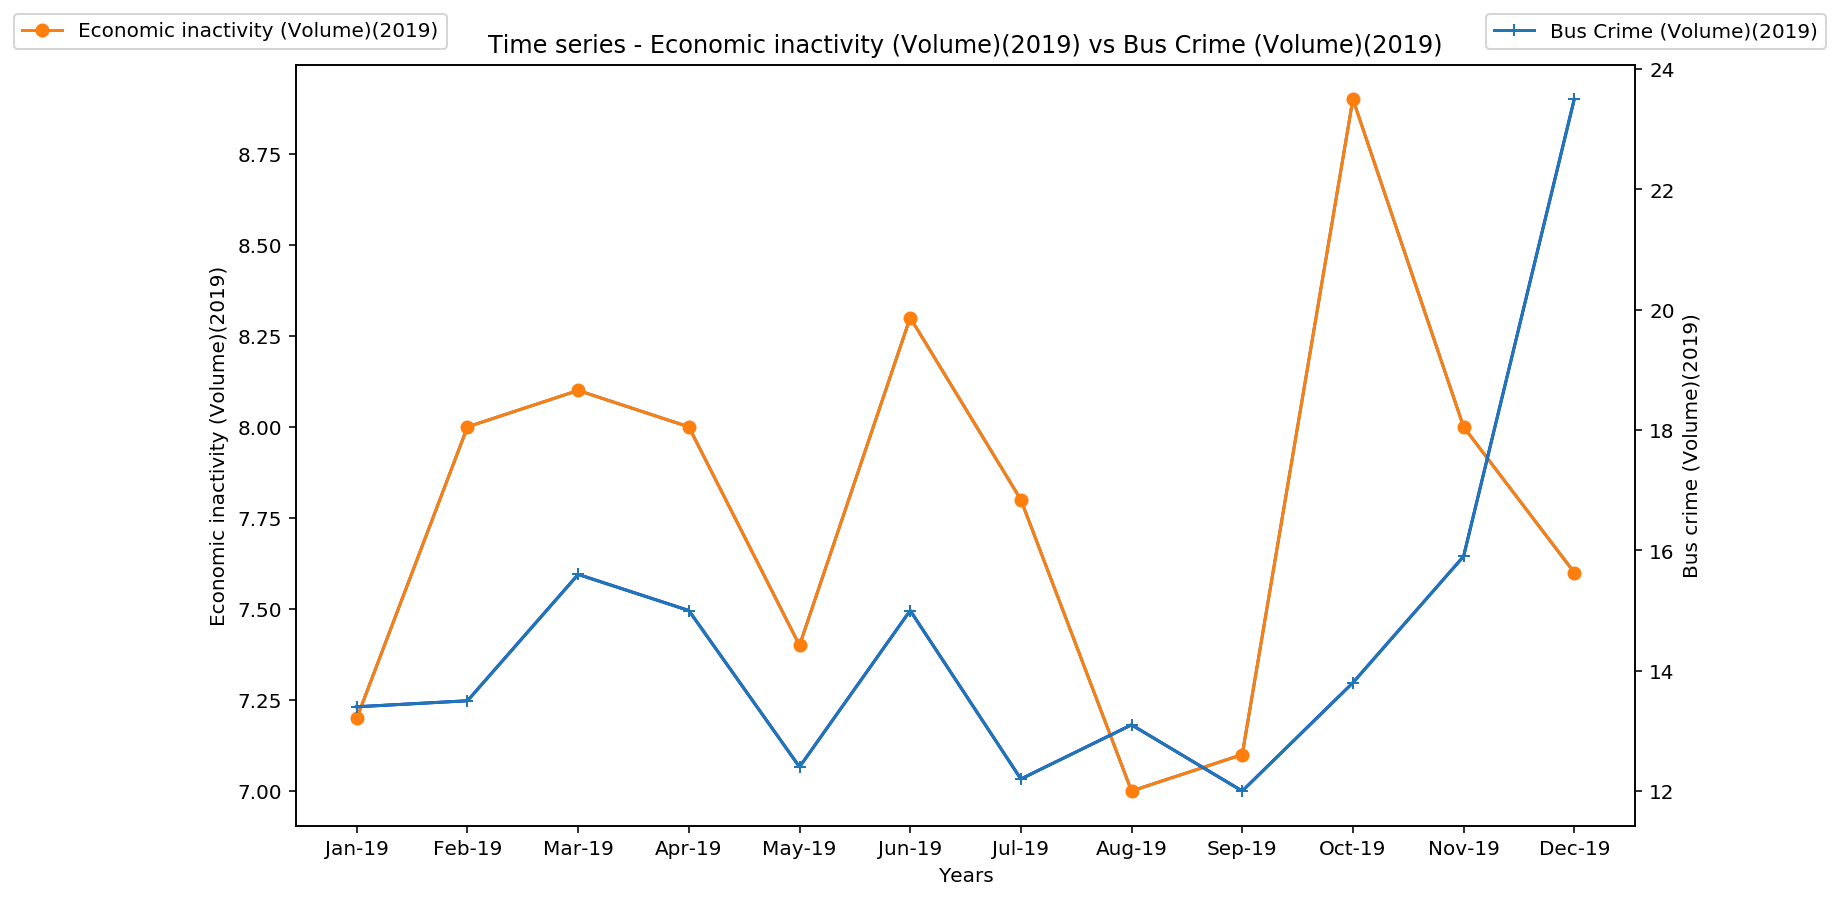

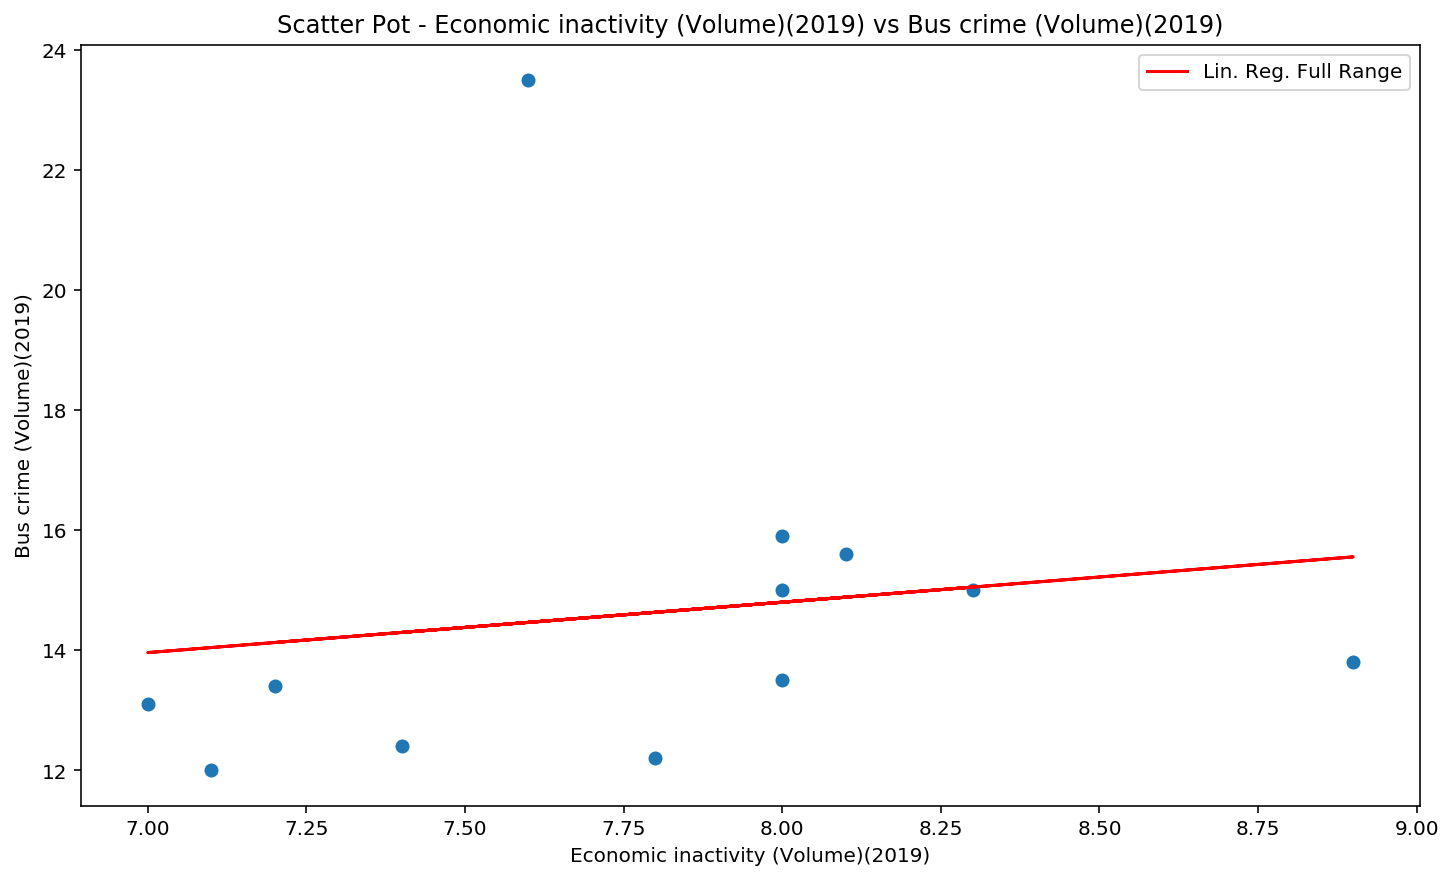

0.839577502934006 Linear regression
8.081955102163654 Linear regression

Covariance: 0.23484848484848458  Bus crime per Economic inactivity

Correlation Coefficient: 0.13752781704499129


In [17]:
# 2019 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2019)")
ax1.set_title("Time series - Economic inactivity (Volume)(2019) vs Bus Crime (Volume)(2019)")

ax1.plot(list_2019, economic_inactivity_2019)
ax1.plot(list_2019, economic_inactivity_2019, marker='o', label='Economic inactivity (Volume)(2019)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2019)")
ax2.plot(bus_crime_2019,'b')
ax2.plot(bus_crime_2019, marker='+',label='Bus Crime (Volume)(2019)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2019):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2019
y = bus_crime_2019
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2019, bus_crime_2019)
y_tot = economic_inactivity_2019*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2019, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2019, bus_crime_2019)


plt.xlabel("Economic inactivity (Volume)(2019)")
plt.ylabel("Bus crime (Volume)(2019)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2019) vs Bus crime (Volume)(2019)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2019
y = bus_crime_2019

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2019_covariance = np.cov(bus_crime_2019,economic_inactivity_2019)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2019,bus_crime_2019)[1][0]

print("Covariance:",bus_crime_2019_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)




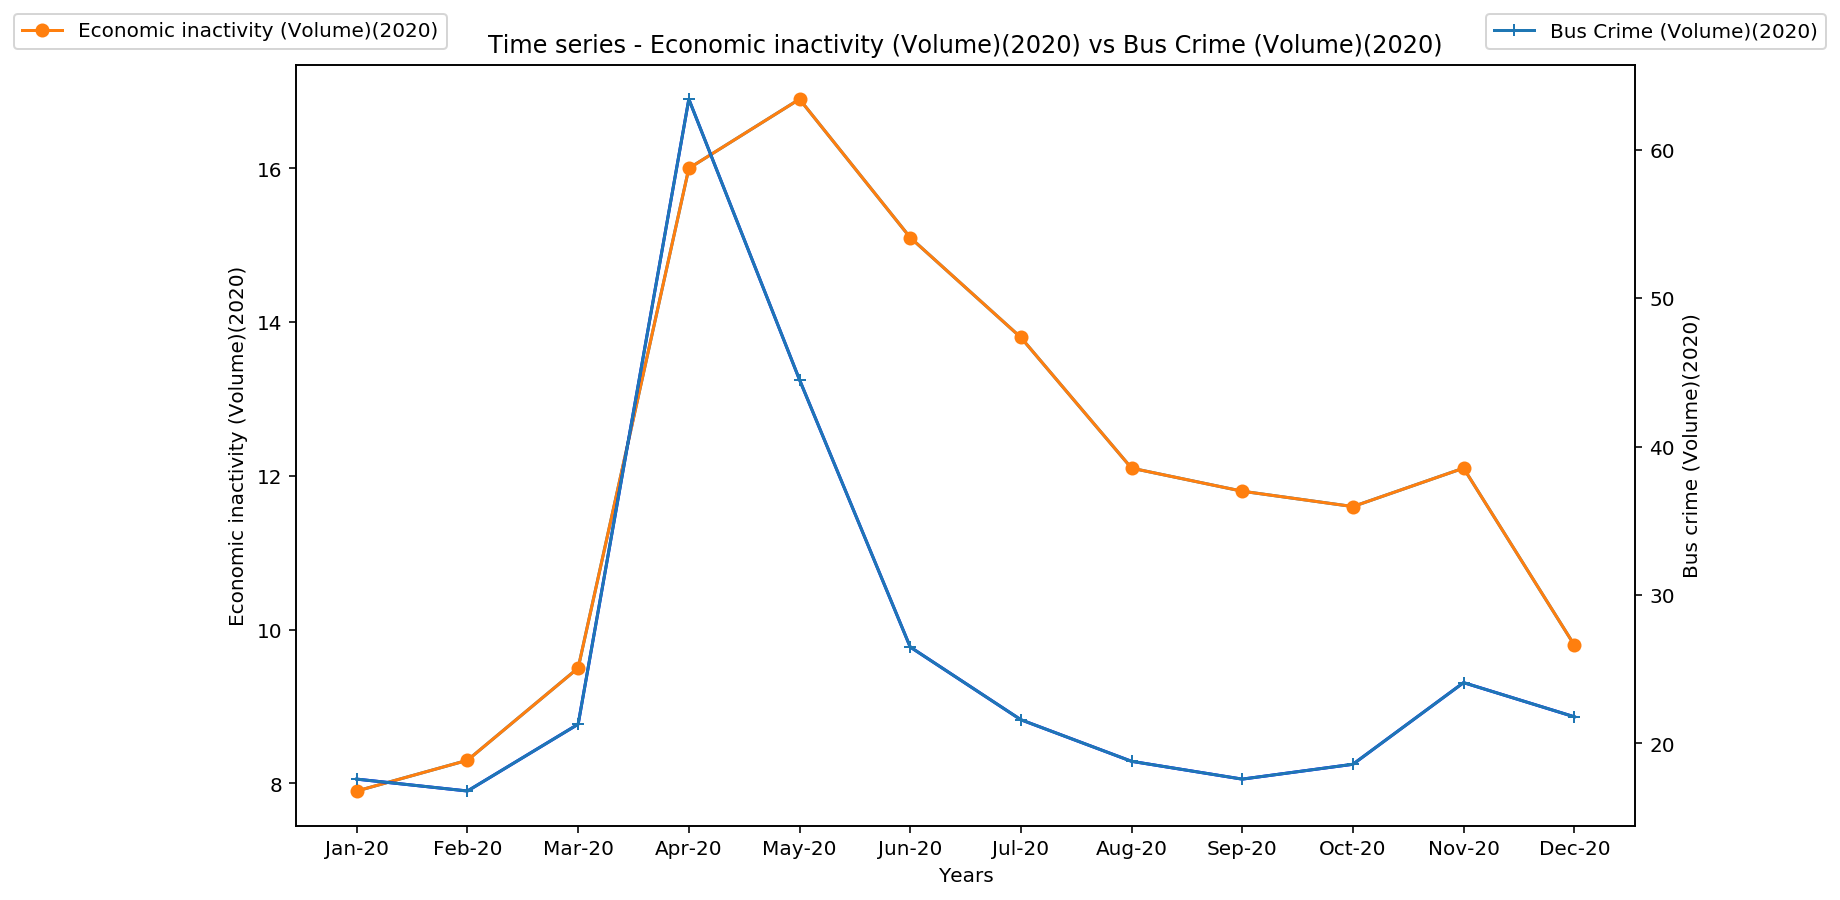

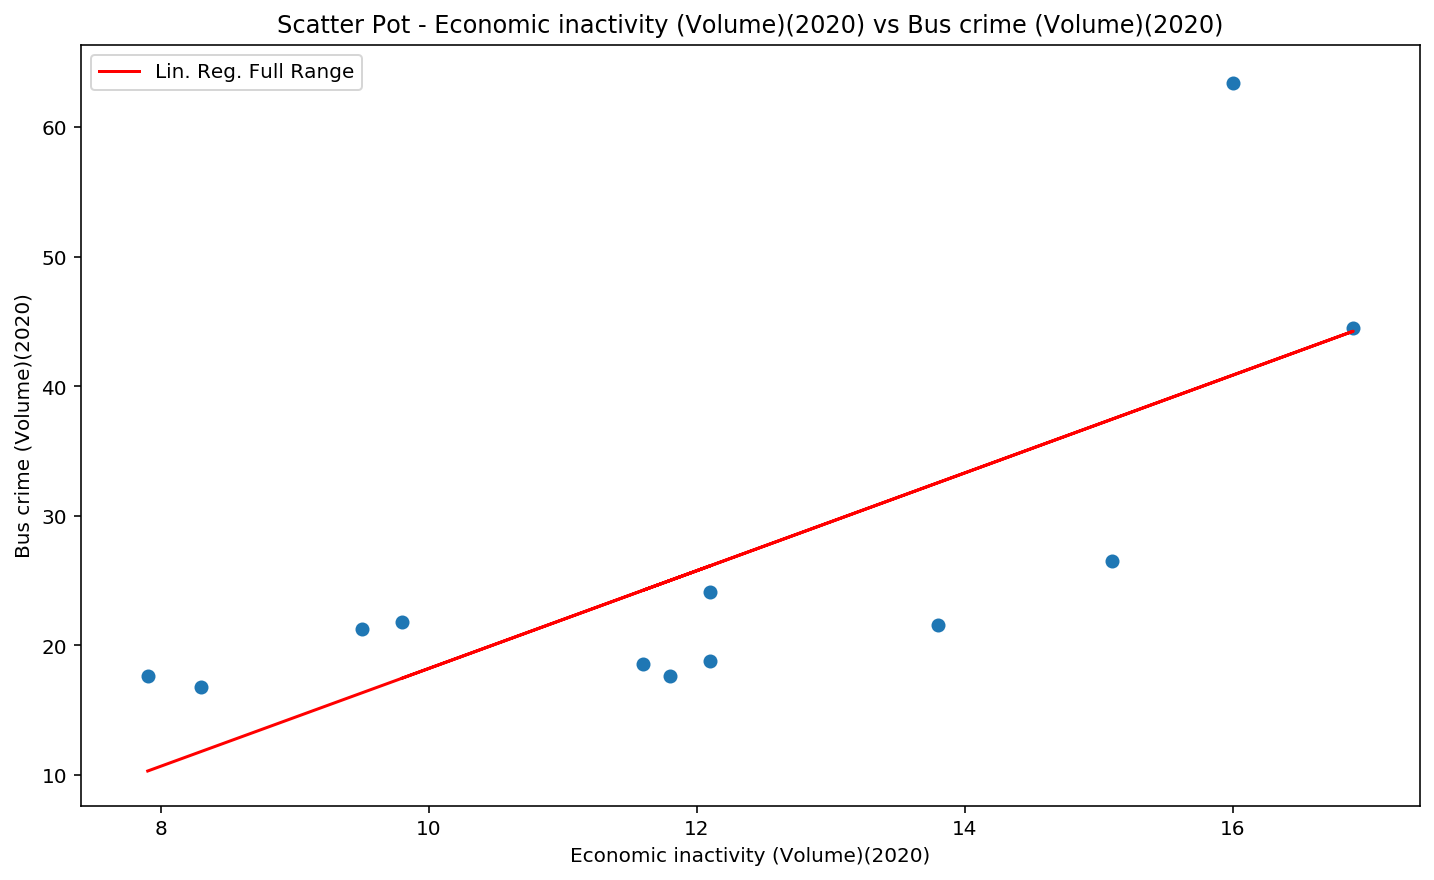

3.7712053544616113 Linear regression
-19.48730465512396 Linear regression

Covariance: 29.73045454545454  Bus crime per Economic inactivity

Correlation Coefficient: 0.727466206978781


In [18]:
# 2020 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2020)")
ax1.set_title("Time series - Economic inactivity (Volume)(2020) vs Bus Crime (Volume)(2020)")

ax1.plot(list_2020, economic_inactivity_2020)
ax1.plot(list_2020, economic_inactivity_2020, marker='o', label='Economic inactivity (Volume)(2020)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2020)")
ax2.plot(bus_crime_2020,'b')
ax2.plot(bus_crime_2020, marker='+',label='Bus Crime (Volume)(2020)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2020):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2020
y = bus_crime_2020
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2020, bus_crime_2020)
y_tot = economic_inactivity_2020*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2020, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2020, bus_crime_2020)


plt.xlabel("Economic inactivity (Volume)(2020)")
plt.ylabel("Bus crime (Volume)(2020)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2020) vs Bus crime (Volume)(2020)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2020
y = bus_crime_2020

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2020_covariance = np.cov(bus_crime_2020,economic_inactivity_2020)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2020,bus_crime_2020)[1][0]

print("Covariance:",bus_crime_2020_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)




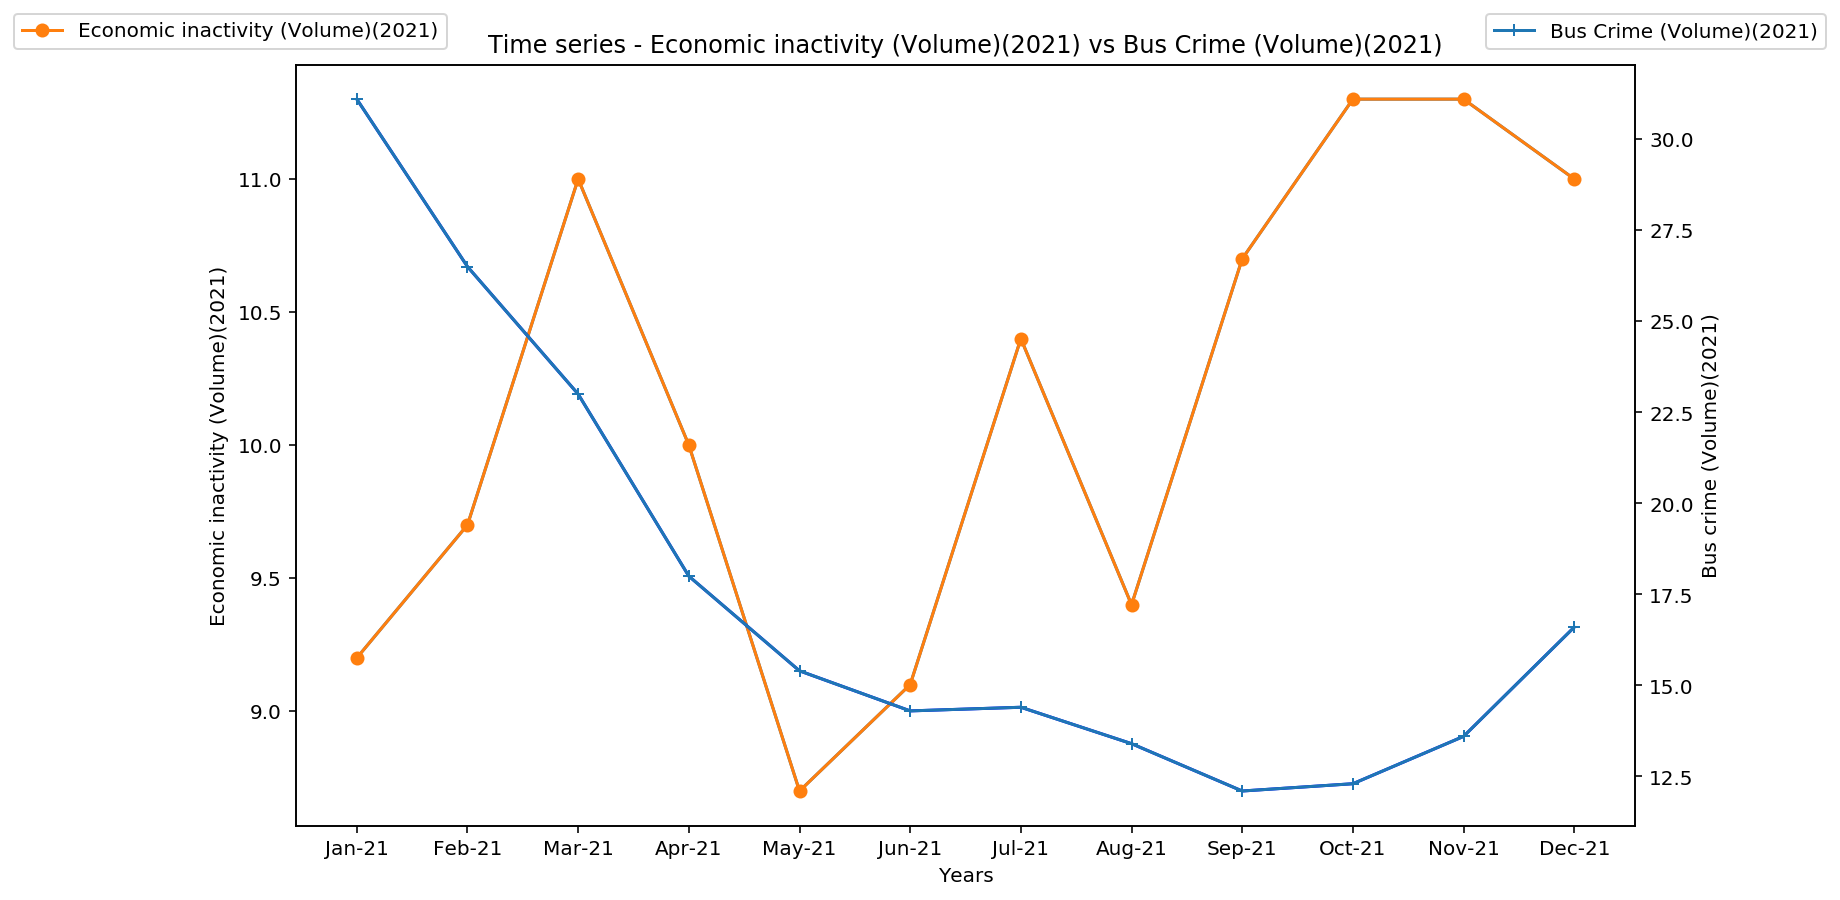

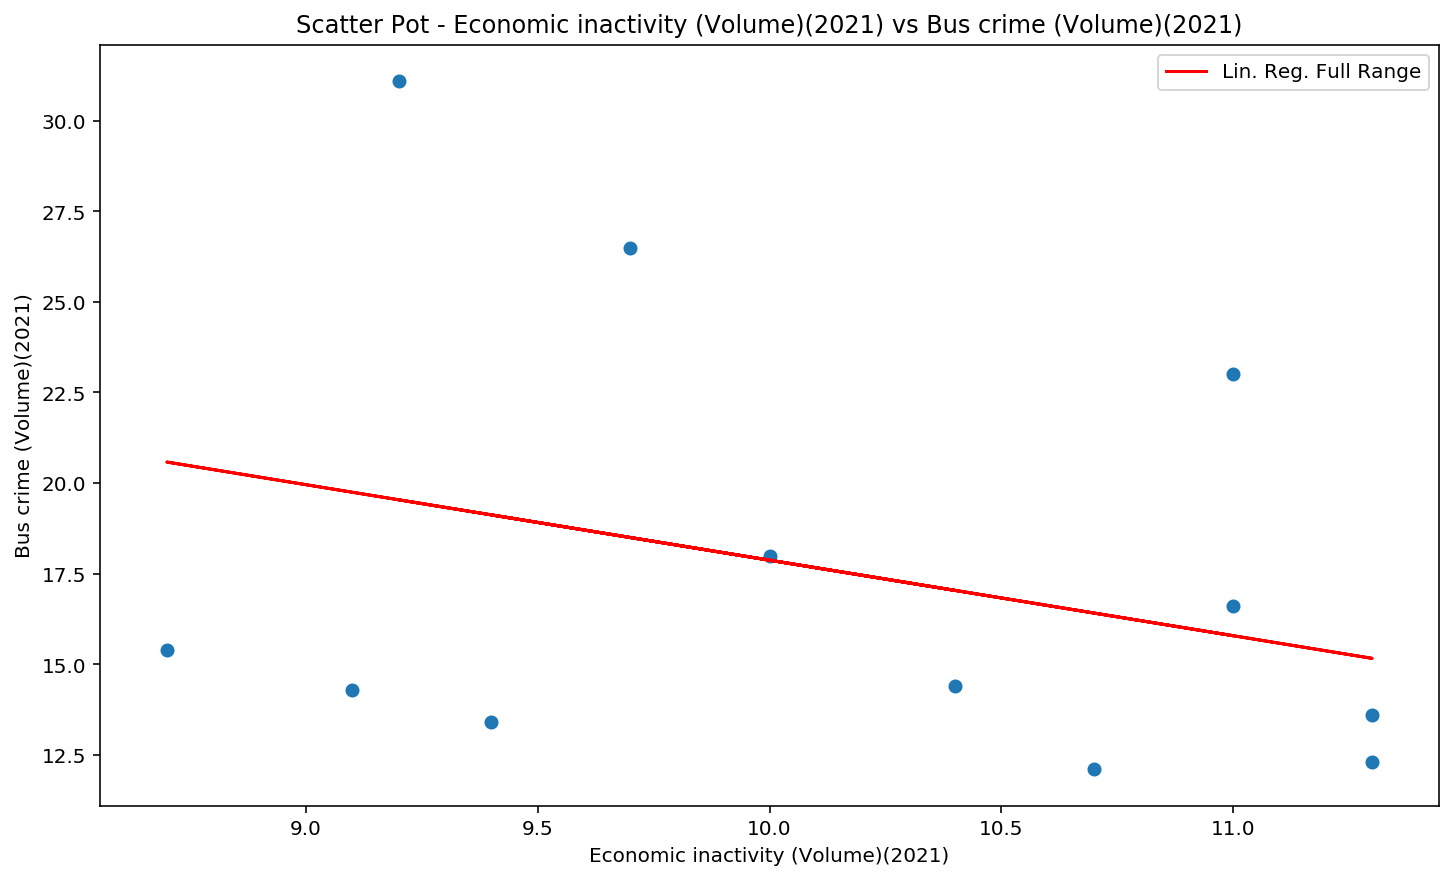

-2.084394749635392 Linear regression
38.71494004213257 Linear regression

Covariance: -1.6240909090909106  Bus crime per Economic inactivity

Correlation Coefficient: -0.28864190004666945


In [19]:
# 2021 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2021)")
ax1.set_title("Time series - Economic inactivity (Volume)(2021) vs Bus Crime (Volume)(2021)")

ax1.plot(list_2021, economic_inactivity_2021)
ax1.plot(list_2021, economic_inactivity_2021, marker='o', label='Economic inactivity (Volume)(2021)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Bus crime (Volume)(2021)")
ax2.plot(bus_crime_2021,'b')
ax2.plot(bus_crime_2021, marker='+',label='Bus Crime (Volume)(2021)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2021):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2021
y = bus_crime_2021
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2021, bus_crime_2021)
y_tot = economic_inactivity_2021*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2021, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2021, bus_crime_2021)


plt.xlabel("Economic inactivity (Volume)(2021)")
plt.ylabel("Bus crime (Volume)(2021)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2021) vs Bus crime (Volume)(2021)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2021
y = bus_crime_2021

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

bus_crime_2021_covariance = np.cov(bus_crime_2021,economic_inactivity_2021)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2021,bus_crime_2021)[1][0]

print("Covariance:",bus_crime_2021_covariance," Bus crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)


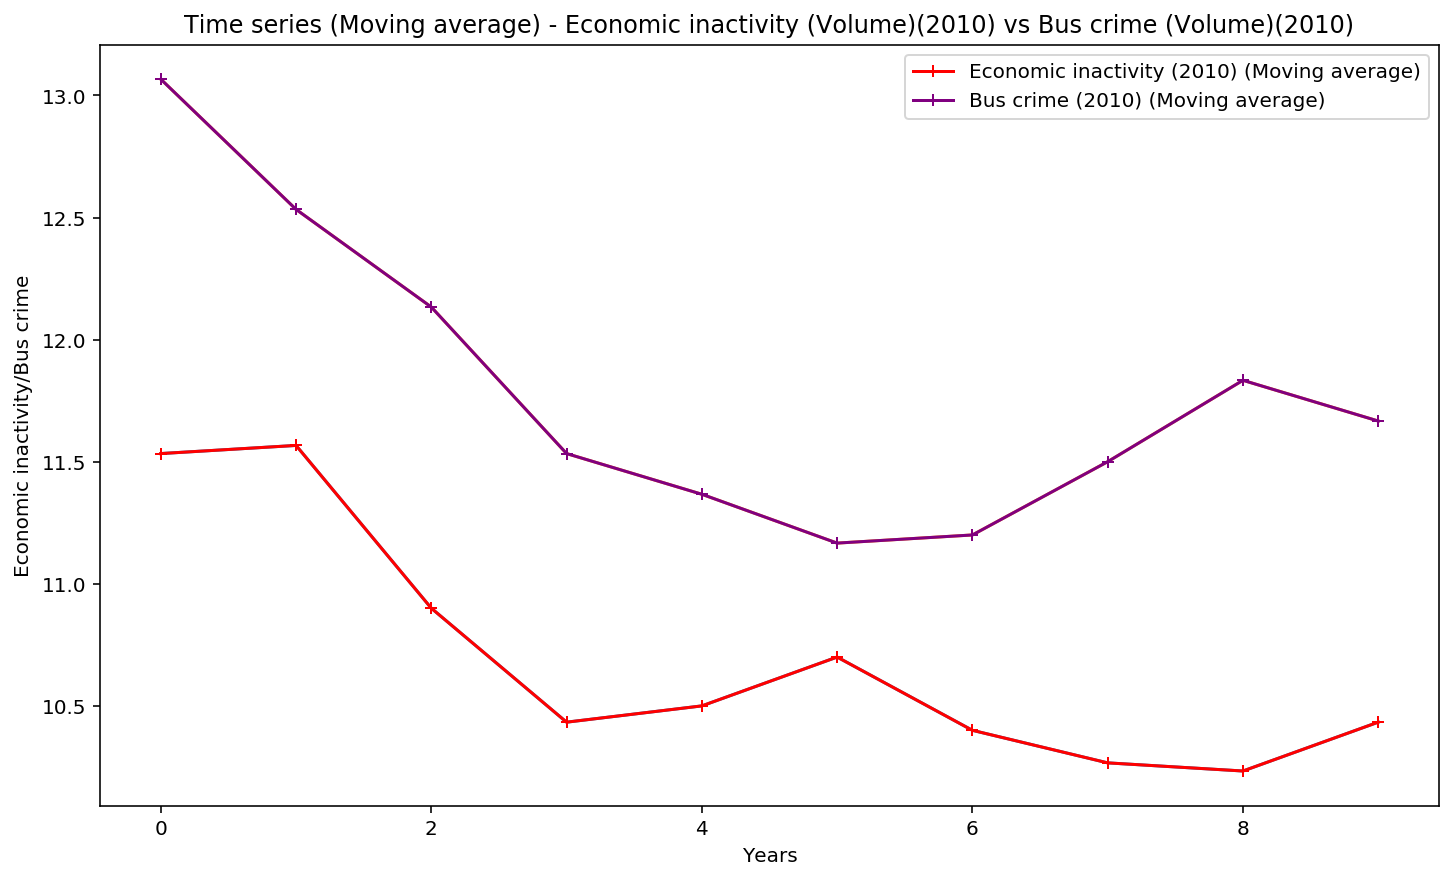

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2010 = np.array(economic_inactivity_2010)
bus_crime_2010 = np.array(bus_crime_2010)
economic_inactivity_2010_ma = moving_average(economic_inactivity_2010,3)
bus_crime_2010_ma = moving_average(bus_crime_2010,3)

plt.figure()
plt.plot(economic_inactivity_2010_ma)
plt.plot(bus_crime_2010_ma)
plt.plot(economic_inactivity_2010_ma, marker='+',label='Economic inactivity (2010) (Moving average)',color = 'red')
plt.plot(bus_crime_2010_ma, marker='+',label='Bus crime (2010) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2010) vs Bus crime (Volume)(2010)")


plt.legend()

plt.show()

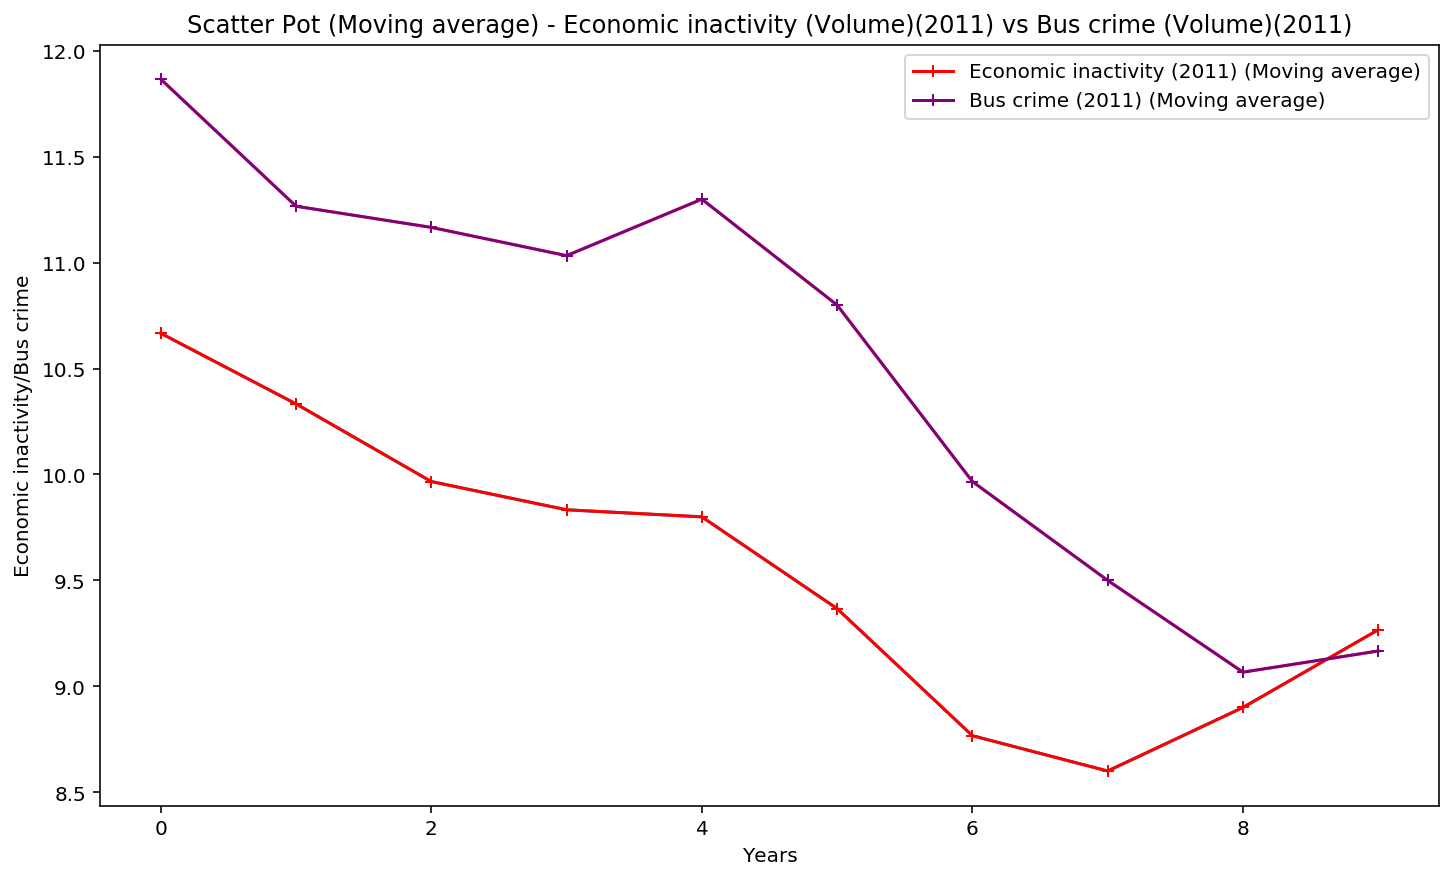

In [21]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2011 = np.array(economic_inactivity_2011)
bus_crime_2011 = np.array(bus_crime_2011)
economic_inactivity_2011_ma = moving_average(economic_inactivity_2011,3)
bus_crime_2011_ma = moving_average(bus_crime_2011,3)

plt.figure()
plt.plot(economic_inactivity_2011_ma)
plt.plot(bus_crime_2011_ma)
plt.plot(economic_inactivity_2011_ma, marker='+',label='Economic inactivity (2011) (Moving average)',color = 'red')
plt.plot(bus_crime_2011_ma, marker='+',label='Bus crime (2011) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2011) vs Bus crime (Volume)(2011)")


plt.legend()

plt.show()

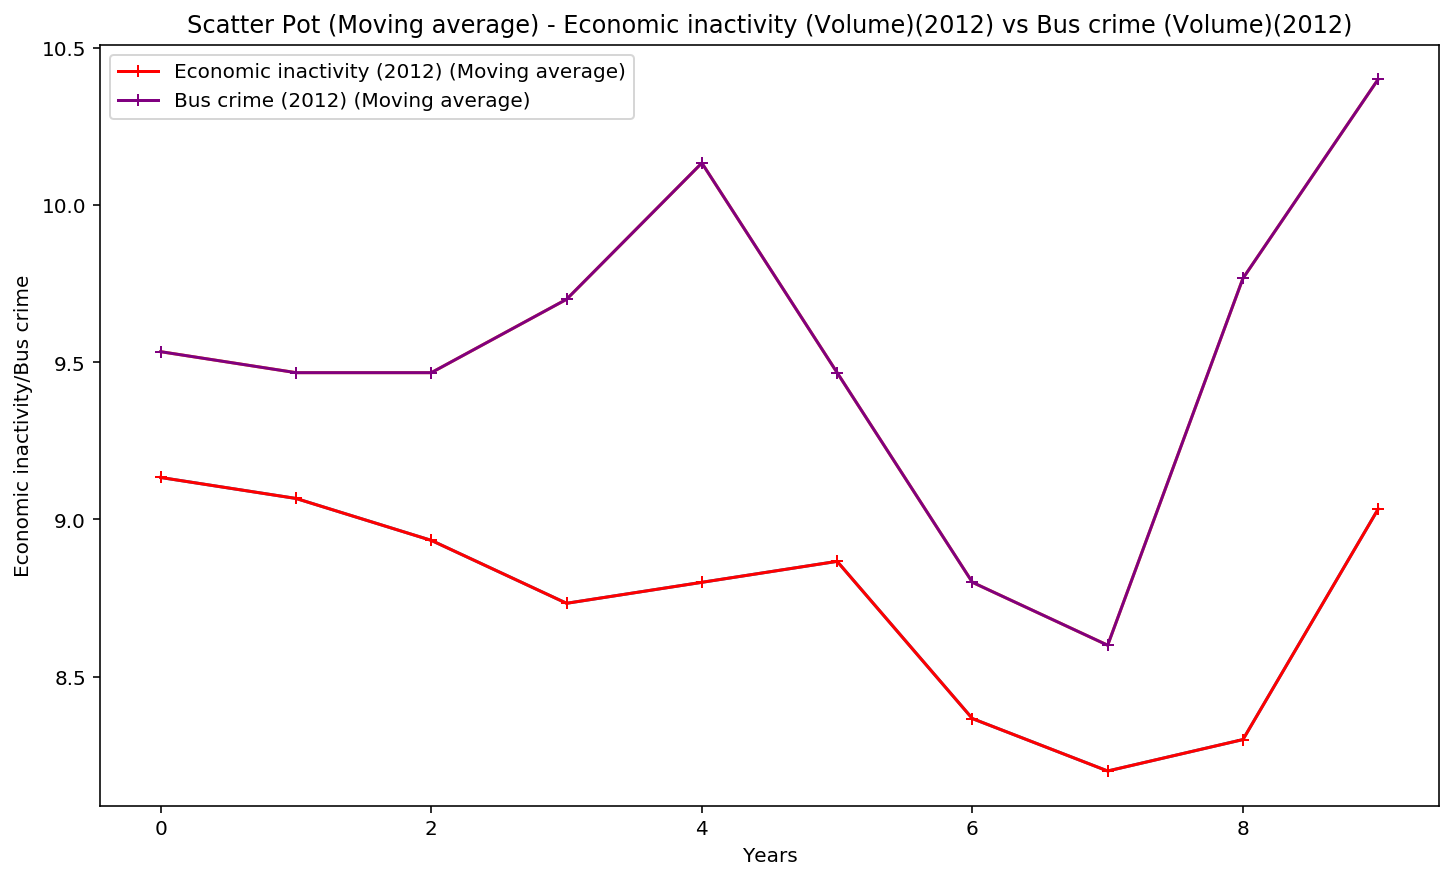

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2012 = np.array(economic_inactivity_2012)
bus_crime_2012 = np.array(bus_crime_2012)
economic_inactivity_2012_ma = moving_average(economic_inactivity_2012,3)
bus_crime_2012_ma = moving_average(bus_crime_2012,3)

plt.figure()
plt.plot(economic_inactivity_2012_ma)
plt.plot(bus_crime_2012_ma)
plt.plot(economic_inactivity_2012_ma, marker='+',label='Economic inactivity (2012) (Moving average)',color = 'red')
plt.plot(bus_crime_2012_ma, marker='+',label='Bus crime (2012) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2012) vs Bus crime (Volume)(2012)")


plt.legend()

plt.show()

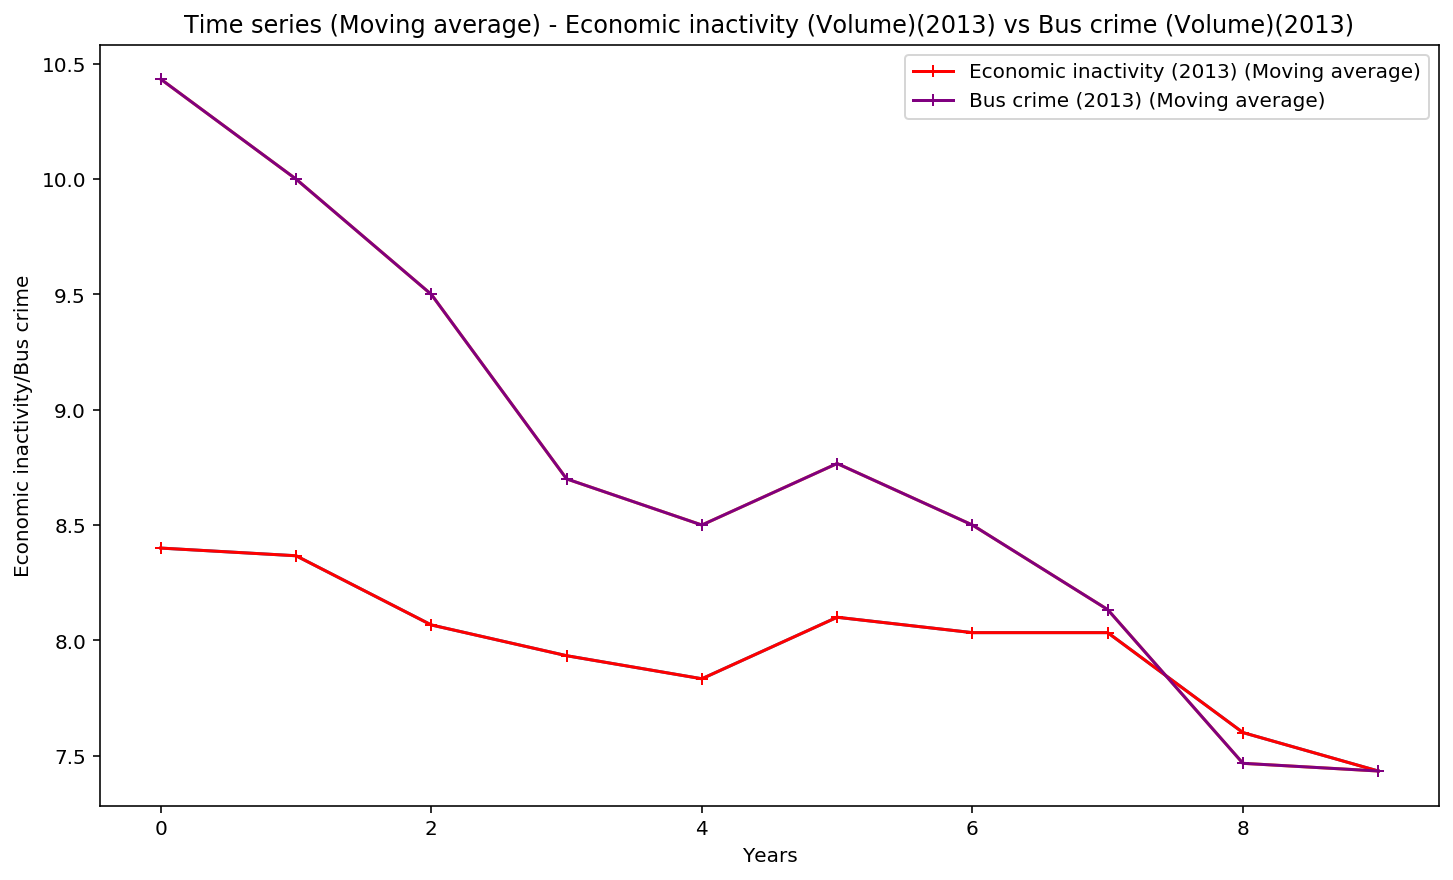

In [61]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2013 = np.array(economic_inactivity_2013)
bus_crime_2013 = np.array(bus_crime_2013)
economic_inactivity_2013_ma = moving_average(economic_inactivity_2013,3)
bus_crime_2013_ma = moving_average(bus_crime_2013,3)

plt.figure()
plt.plot(economic_inactivity_2013_ma)
plt.plot(bus_crime_2013_ma)
plt.plot(economic_inactivity_2013_ma, marker='+',label='Economic inactivity (2013) (Moving average)',color = 'red')
plt.plot(bus_crime_2013_ma, marker='+',label='Bus crime (2013) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2013) vs Bus crime (Volume)(2013)")


plt.legend()

plt.show()

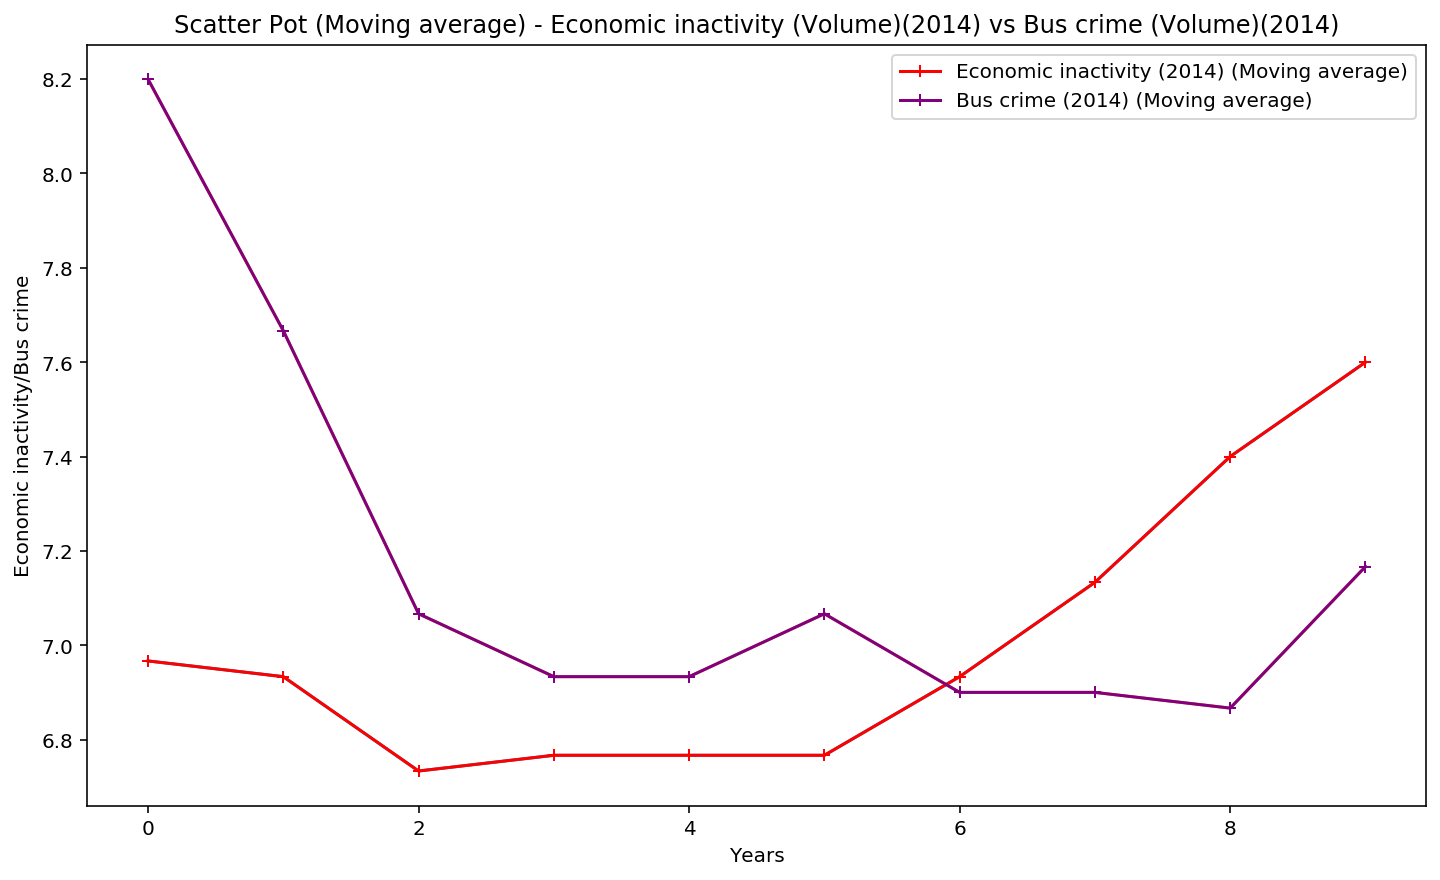

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2014 = np.array(economic_inactivity_2014)
bus_crime_2014 = np.array(bus_crime_2014)
economic_inactivity_2014_ma = moving_average(economic_inactivity_2014,3)
bus_crime_2014_ma = moving_average(bus_crime_2014,3)

plt.figure()
plt.plot(economic_inactivity_2014_ma)
plt.plot(bus_crime_2014_ma)
plt.plot(economic_inactivity_2014_ma, marker='+',label='Economic inactivity (2014) (Moving average)',color = 'red')
plt.plot(bus_crime_2014_ma, marker='+',label='Bus crime (2014) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2014) vs Bus crime (Volume)(2014)")


plt.legend()

plt.show()

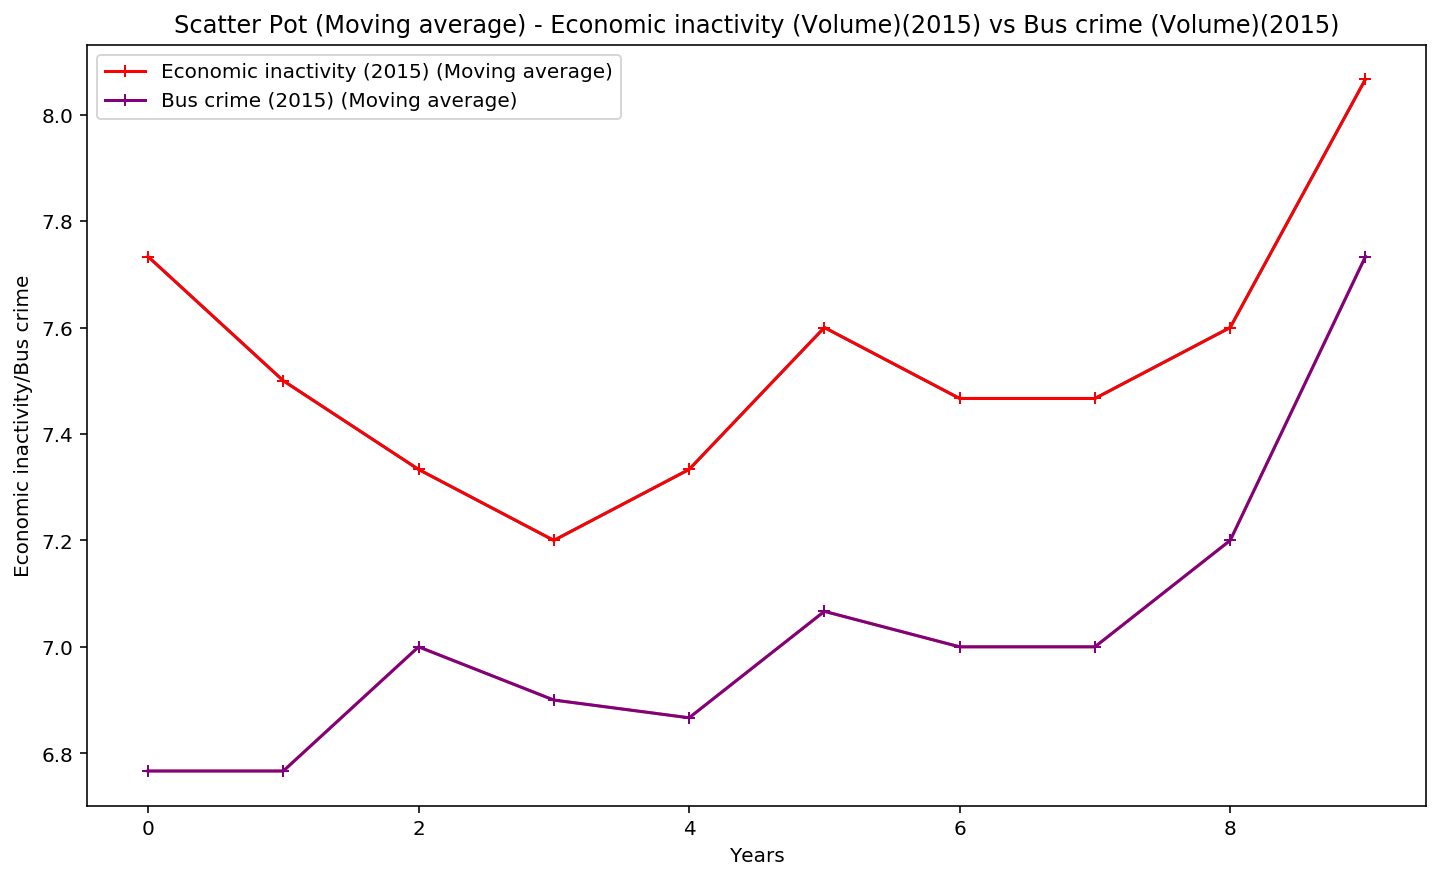

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2015 = np.array(economic_inactivity_2015)
bus_crime_2015 = np.array(bus_crime_2015)
economic_inactivity_2015_ma = moving_average(economic_inactivity_2015,3)
bus_crime_2015_ma = moving_average(bus_crime_2015,3)

plt.figure()
plt.plot(economic_inactivity_2015_ma)
plt.plot(bus_crime_2015_ma)
plt.plot(economic_inactivity_2015_ma, marker='+',label='Economic inactivity (2015) (Moving average)',color = 'red')
plt.plot(bus_crime_2015_ma, marker='+',label='Bus crime (2015) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2015) vs Bus crime (Volume)(2015)")


plt.legend()

plt.show()

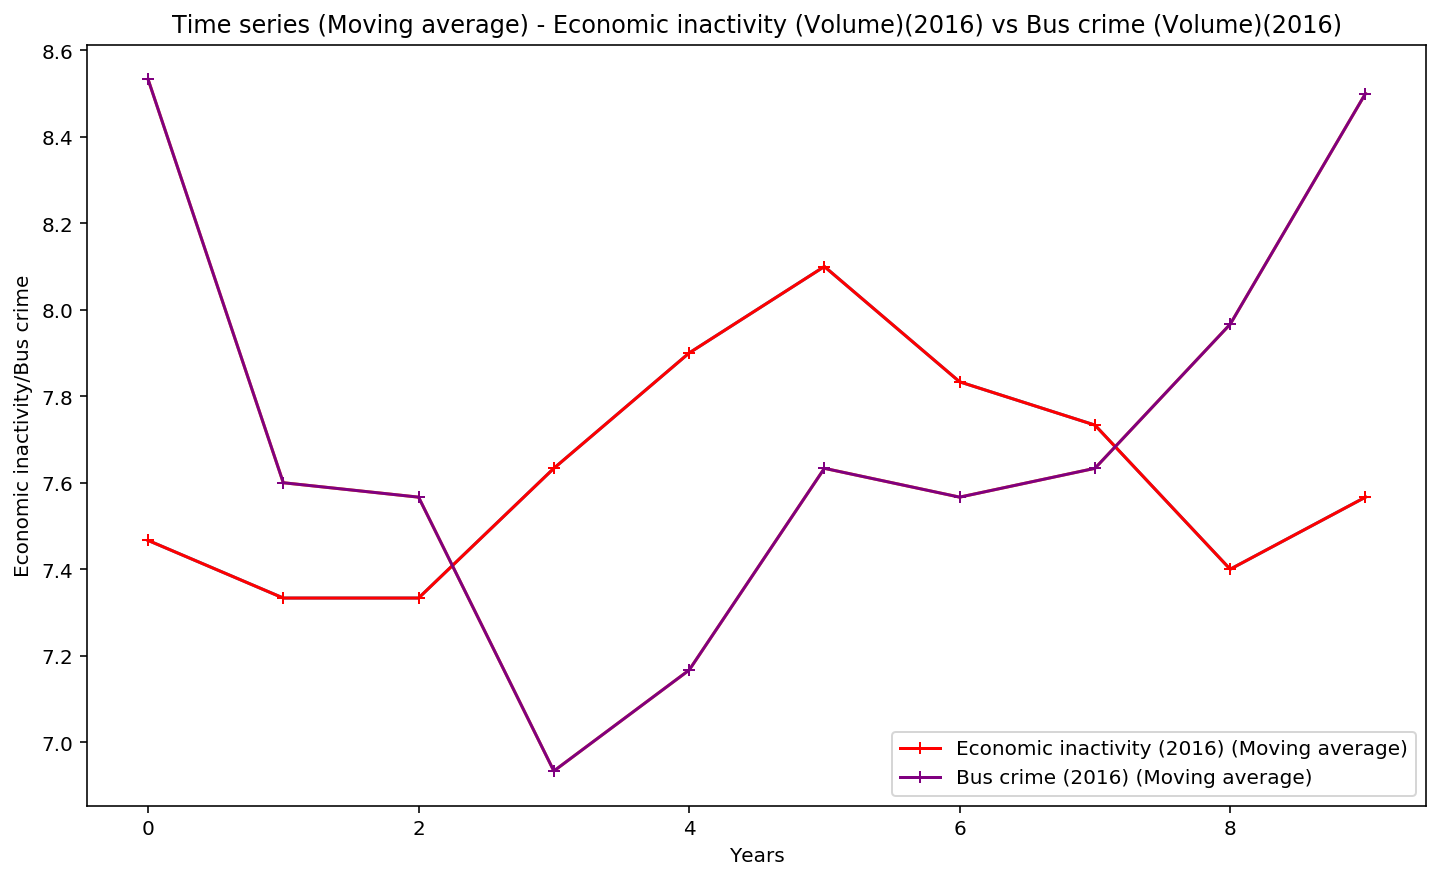

In [62]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2016 = np.array(economic_inactivity_2016)
bus_crime_2016 = np.array(bus_crime_2016)
economic_inactivity_2016_ma = moving_average(economic_inactivity_2016,3)
bus_crime_2016_ma = moving_average(bus_crime_2016,3)

plt.figure()
plt.plot(economic_inactivity_2016_ma)
plt.plot(bus_crime_2016_ma)
plt.plot(economic_inactivity_2016_ma, marker='+',label='Economic inactivity (2016) (Moving average)',color = 'red')
plt.plot(bus_crime_2016_ma, marker='+',label='Bus crime (2016) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2016) vs Bus crime (Volume)(2016)")


plt.legend()

plt.show()

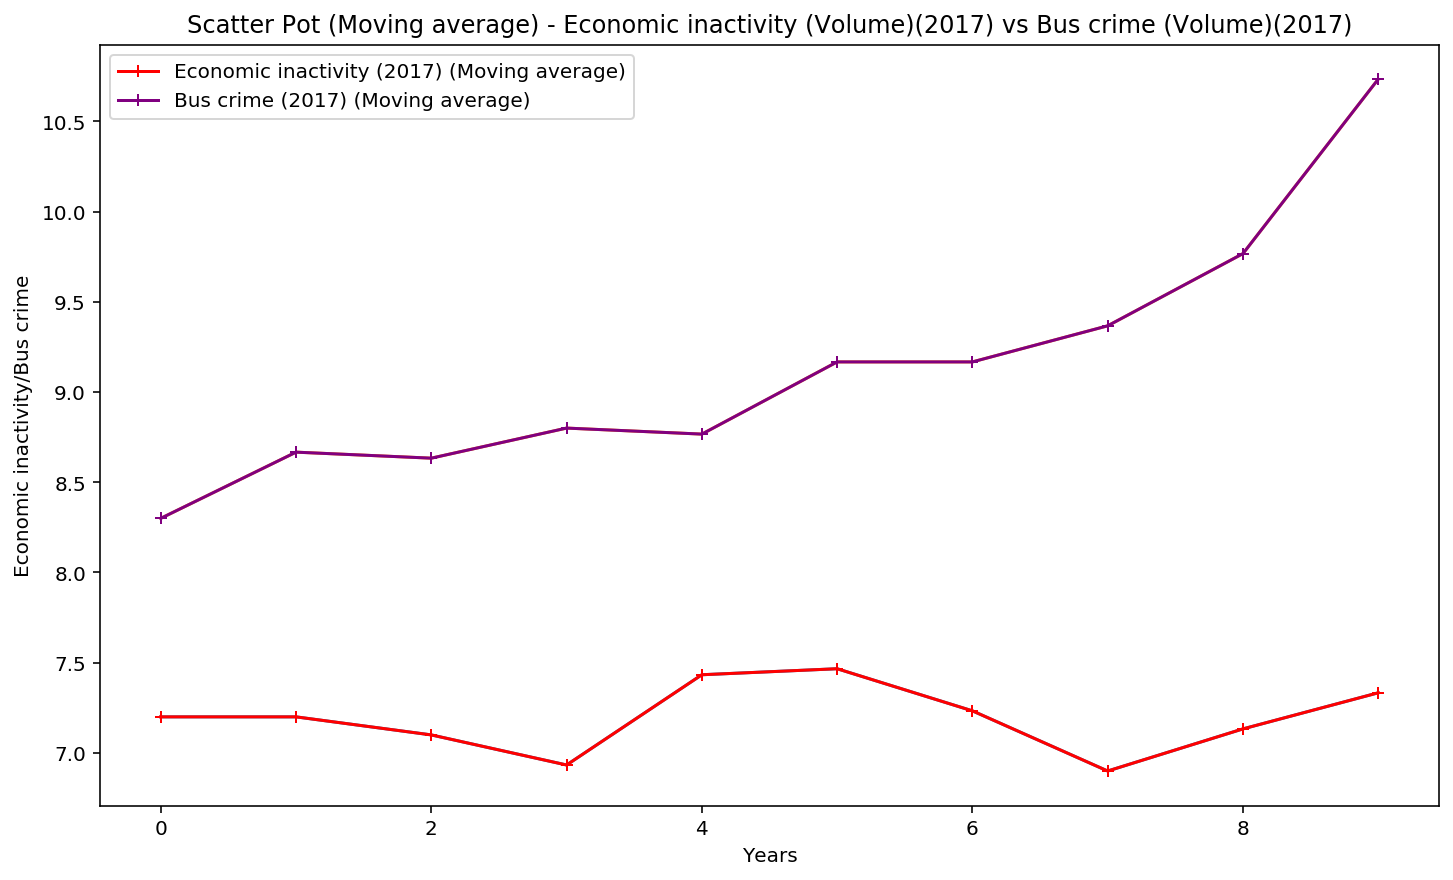

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2017 = np.array(economic_inactivity_2017)
bus_crime_2017 = np.array(bus_crime_2017)
economic_inactivity_2017_ma = moving_average(economic_inactivity_2017,3)
bus_crime_2017_ma = moving_average(bus_crime_2017,3)

plt.figure()
plt.plot(economic_inactivity_2017_ma)
plt.plot(bus_crime_2017_ma)
plt.plot(economic_inactivity_2017_ma, marker='+',label='Economic inactivity (2017) (Moving average)',color = 'red')
plt.plot(bus_crime_2017_ma, marker='+',label='Bus crime (2017) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2017) vs Bus crime (Volume)(2017)")


plt.legend()

plt.show()

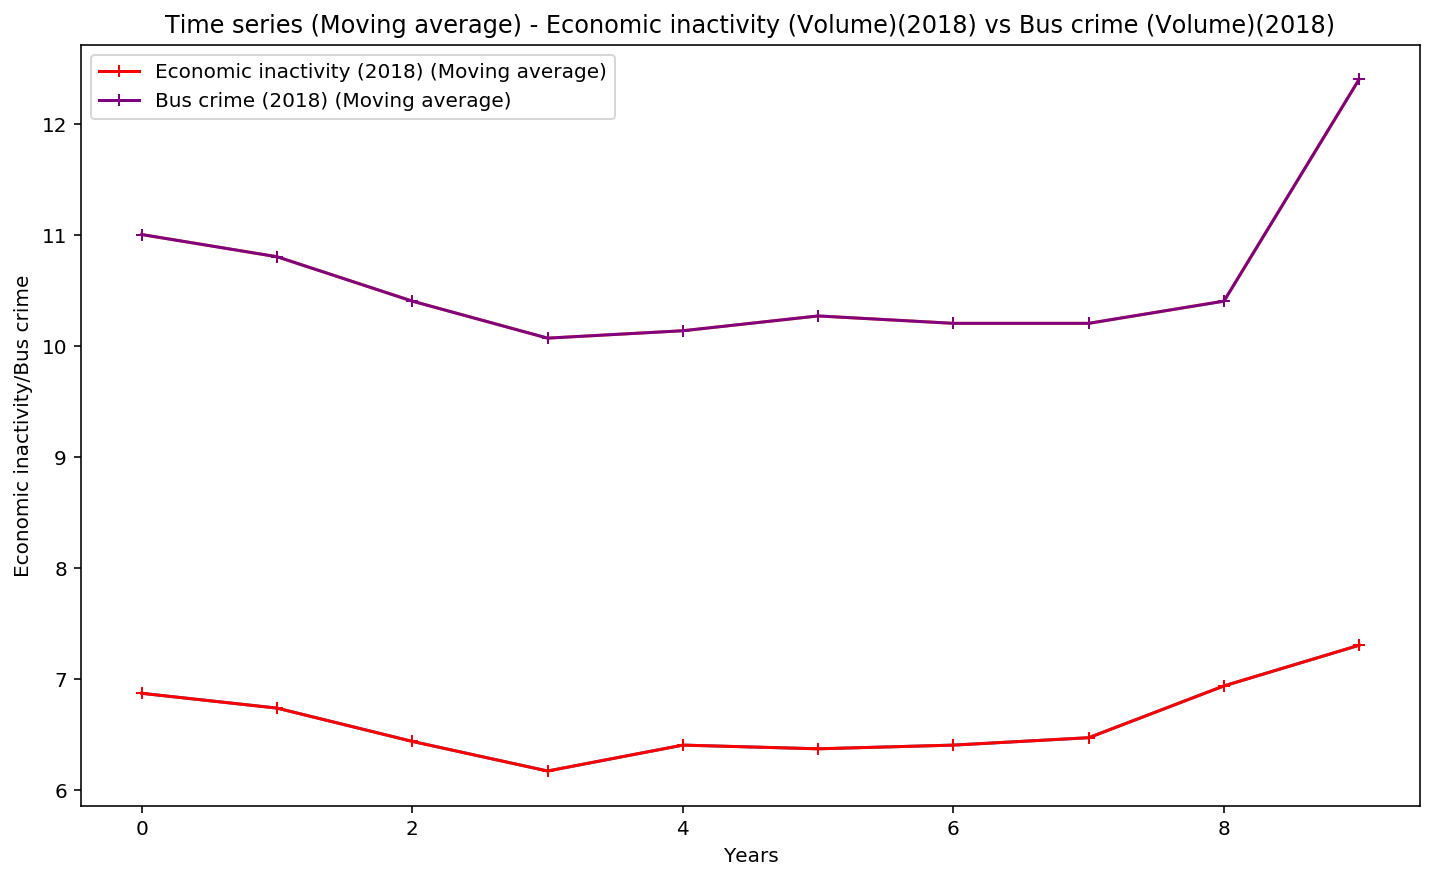

In [63]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2018 = np.array(economic_inactivity_2018)
bus_crime_2018 = np.array(bus_crime_2018)
economic_inactivity_2018_ma = moving_average(economic_inactivity_2018,3)
bus_crime_2018_ma = moving_average(bus_crime_2018,3)

plt.figure()
plt.plot(economic_inactivity_2018_ma)
plt.plot(bus_crime_2018_ma)
plt.plot(economic_inactivity_2018_ma, marker='+',label='Economic inactivity (2018) (Moving average)',color = 'red')
plt.plot(bus_crime_2018_ma, marker='+',label='Bus crime (2018) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2018) vs Bus crime (Volume)(2018)")


plt.legend()

plt.show()

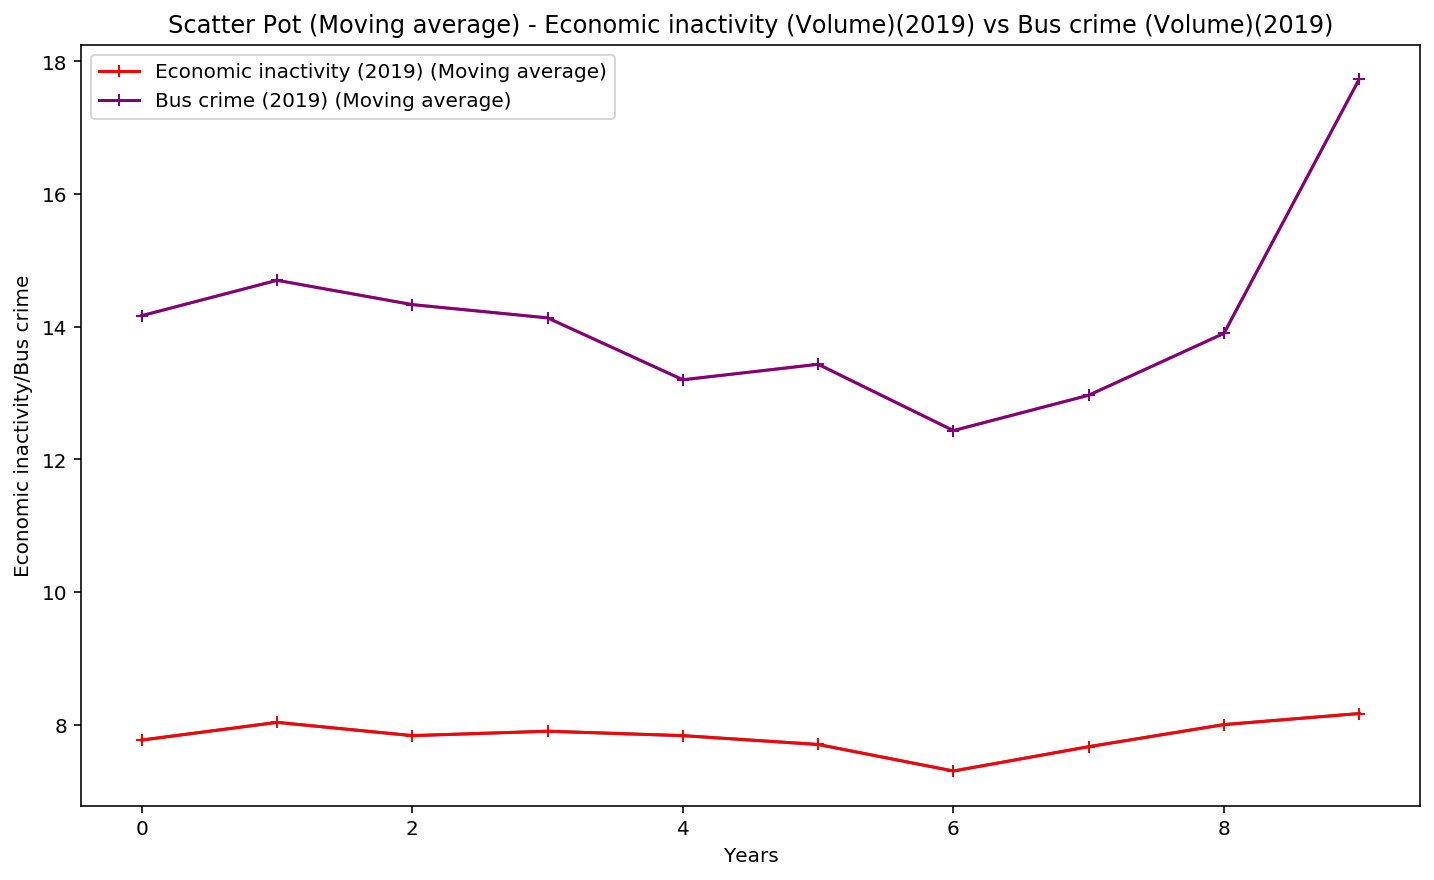

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2019 = np.array(economic_inactivity_2019)
bus_crime_2019 = np.array(bus_crime_2019)
economic_inactivity_2019_ma = moving_average(economic_inactivity_2019,3)
bus_crime_2019_ma = moving_average(bus_crime_2019,3)

plt.figure()
plt.plot(economic_inactivity_2019_ma)
plt.plot(bus_crime_2019_ma)
plt.plot(economic_inactivity_2019_ma, marker='+',label='Economic inactivity (2019) (Moving average)',color = 'red')
plt.plot(bus_crime_2019_ma, marker='+',label='Bus crime (2019) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2019) vs Bus crime (Volume)(2019)")


plt.legend()

plt.show()

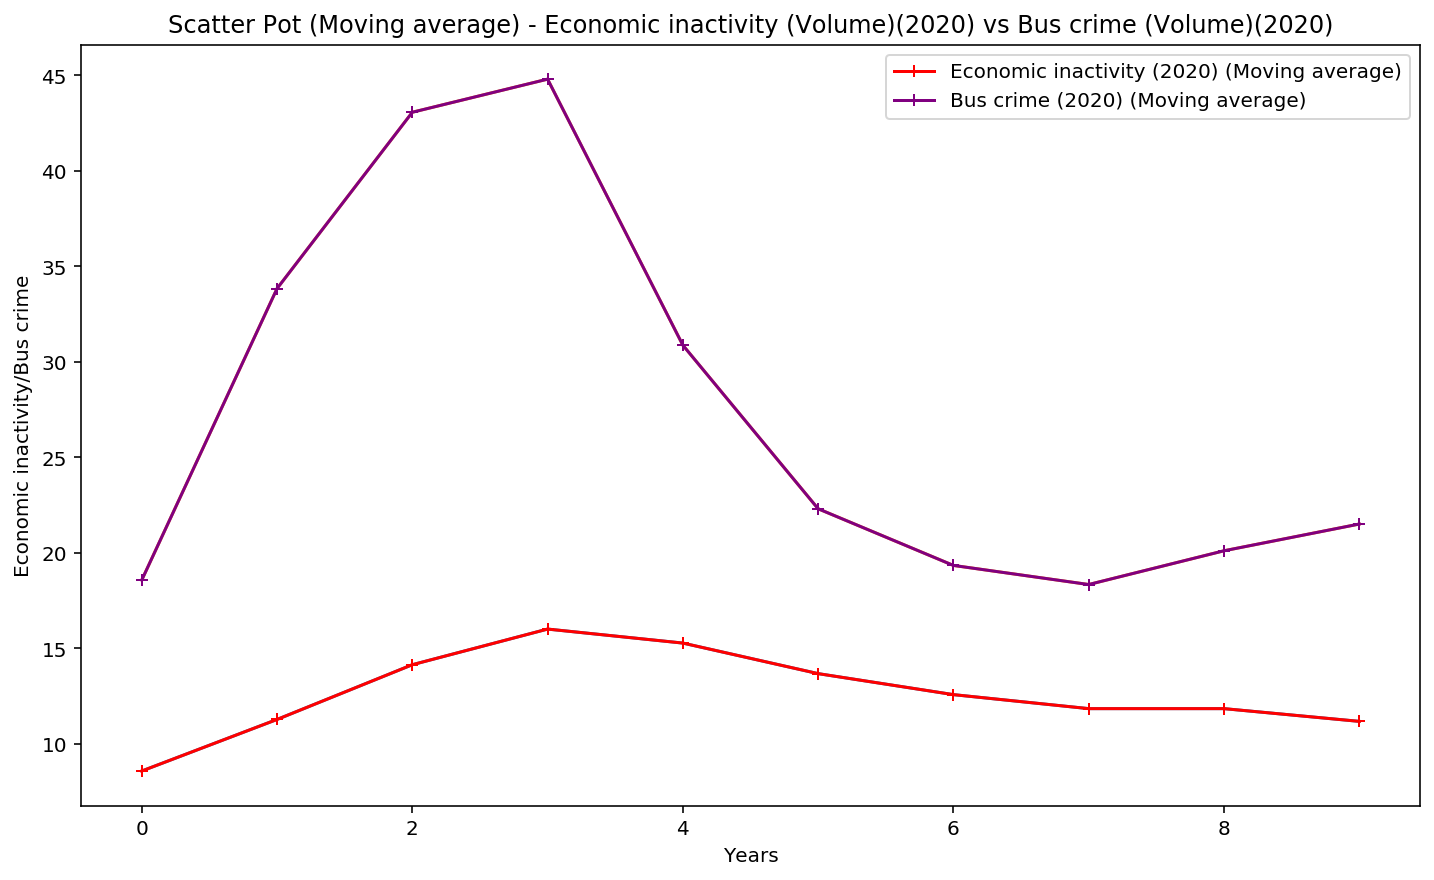

In [64]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2020 = np.array(economic_inactivity_2020)
bus_crime_2020 = np.array(bus_crime_2020)
economic_inactivity_2020_ma = moving_average(economic_inactivity_2020,3)
bus_crime_2020_ma = moving_average(bus_crime_2020,3)

plt.figure()
plt.plot(economic_inactivity_2020_ma)
plt.plot(bus_crime_2020_ma)
plt.plot(economic_inactivity_2020_ma, marker='+',label='Economic inactivity (2020) (Moving average)',color = 'red')
plt.plot(bus_crime_2020_ma, marker='+',label='Bus crime (2020) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2020) vs Bus crime (Volume)(2020)")


plt.legend()

plt.show()

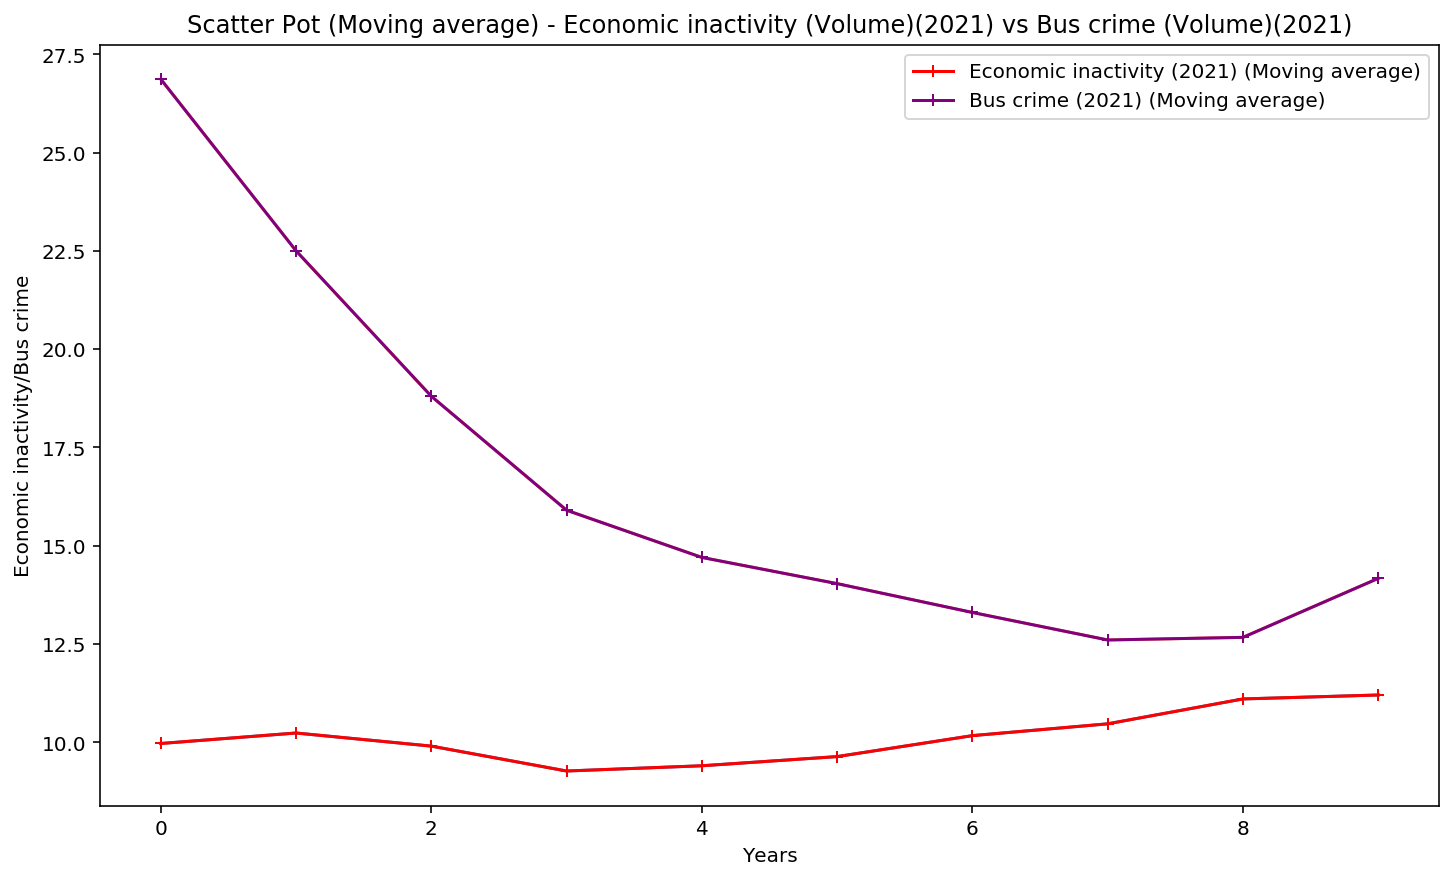

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2021 = np.array(economic_inactivity_2021)
bus_crime_2021 = np.array(bus_crime_2021)
economic_inactivity_2021_ma = moving_average(economic_inactivity_2021,3)
bus_crime_2021_ma = moving_average(bus_crime_2021,3)

plt.figure()
plt.plot(economic_inactivity_2021_ma)
plt.plot(bus_crime_2021_ma)
plt.plot(economic_inactivity_2021_ma, marker='+',label='Economic inactivity (2021) (Moving average)',color = 'red')
plt.plot(bus_crime_2021_ma, marker='+',label='Bus crime (2021) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Bus crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2021) vs Bus crime (Volume)(2021)")


plt.legend()

plt.show()

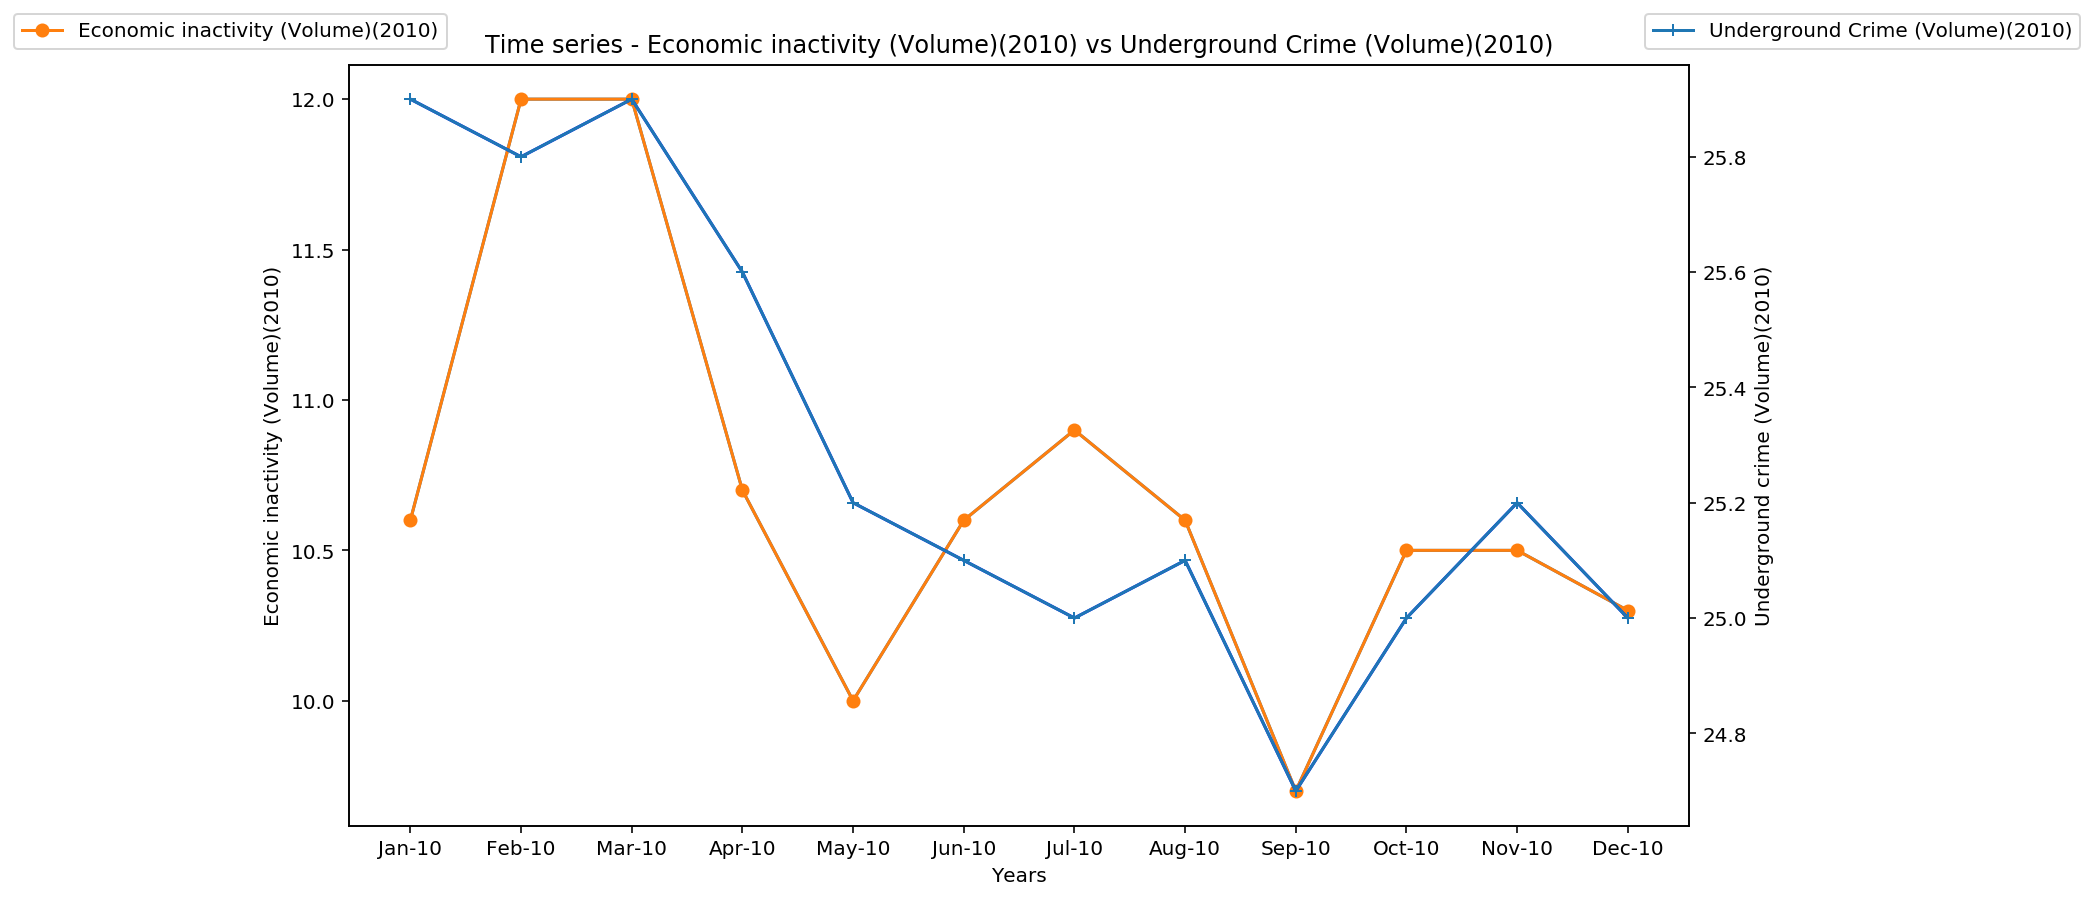

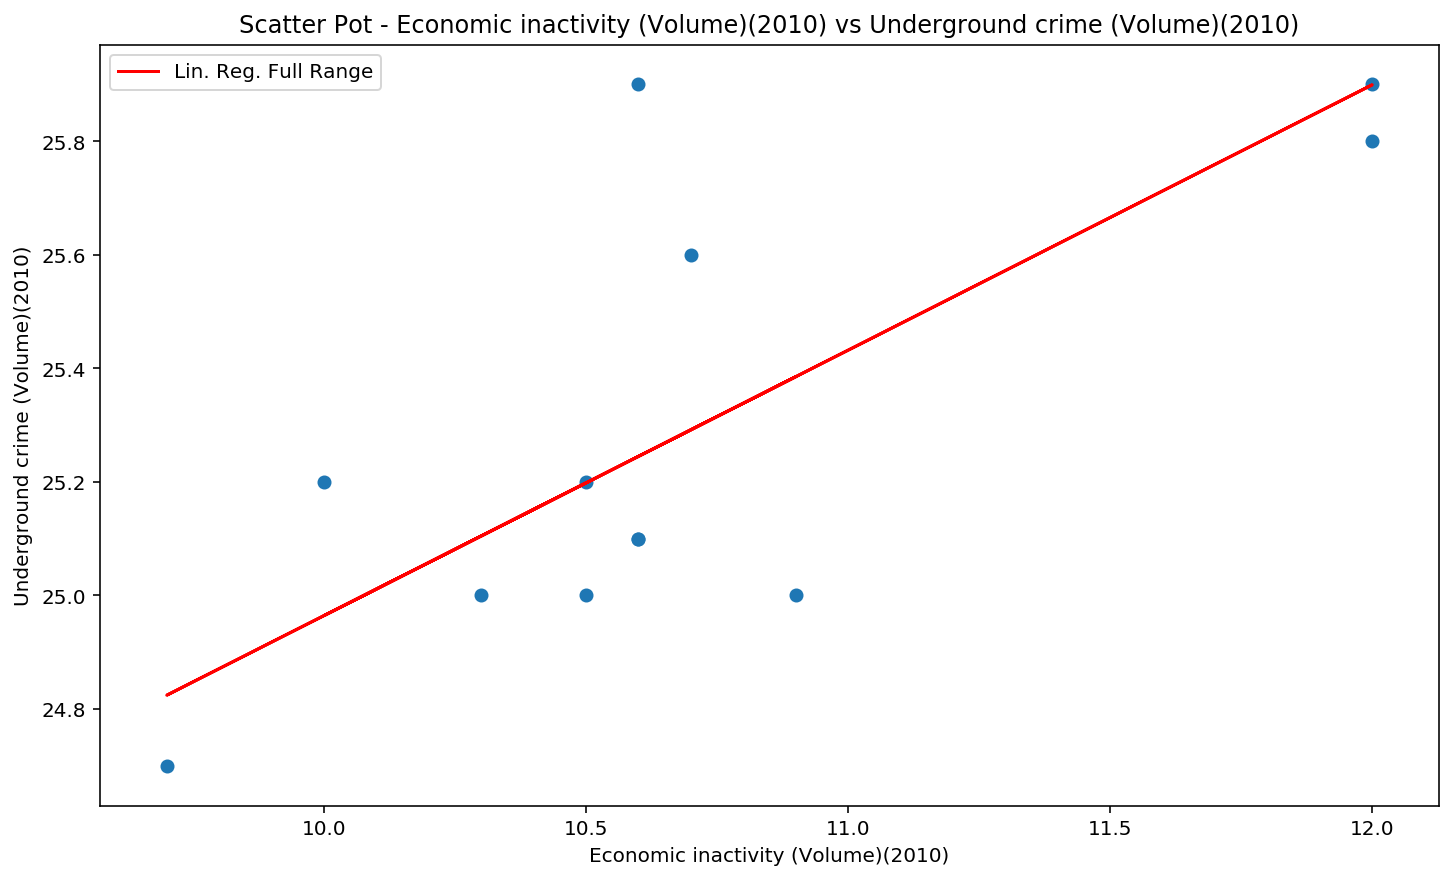

0.46753246753246747 Linear regression
20.289069264069266 Linear regression

Covariance: 0.20181818181818187  Underground crime per Economic inactivity

Correlation Coefficient: 0.7292269246573524


In [32]:
# 2010 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2010):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2010)")
ax1.set_title("Time series - Economic inactivity (Volume)(2010) vs Underground Crime (Volume)(2010)")

ax1.plot(list_2010, economic_inactivity_2010)
ax1.plot(list_2010, economic_inactivity_2010, marker='o', label='Economic inactivity (Volume)(2010)')
ax1.legend(bbox_to_anchor=(0.08, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2010)")
ax2.plot(underground_crime_2010,'b')
ax2.plot(underground_crime_2010, marker='+',label='Underground Crime (Volume)(2010)')
ax2.legend(bbox_to_anchor=(1.30, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2010):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2010
y = underground_crime_2010
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2010, underground_crime_2010)
y_tot = economic_inactivity_2010*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2010, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2010, underground_crime_2010)


plt.xlabel("Economic inactivity (Volume)(2010)")
plt.ylabel("Underground crime (Volume)(2010)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2010) vs Underground crime (Volume)(2010)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2010
y = underground_crime_2010

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2010_covariance = np.cov(underground_crime_2010,economic_inactivity_2010)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2010,underground_crime_2010)[1][0]

print("Covariance:",underground_crime_2010_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

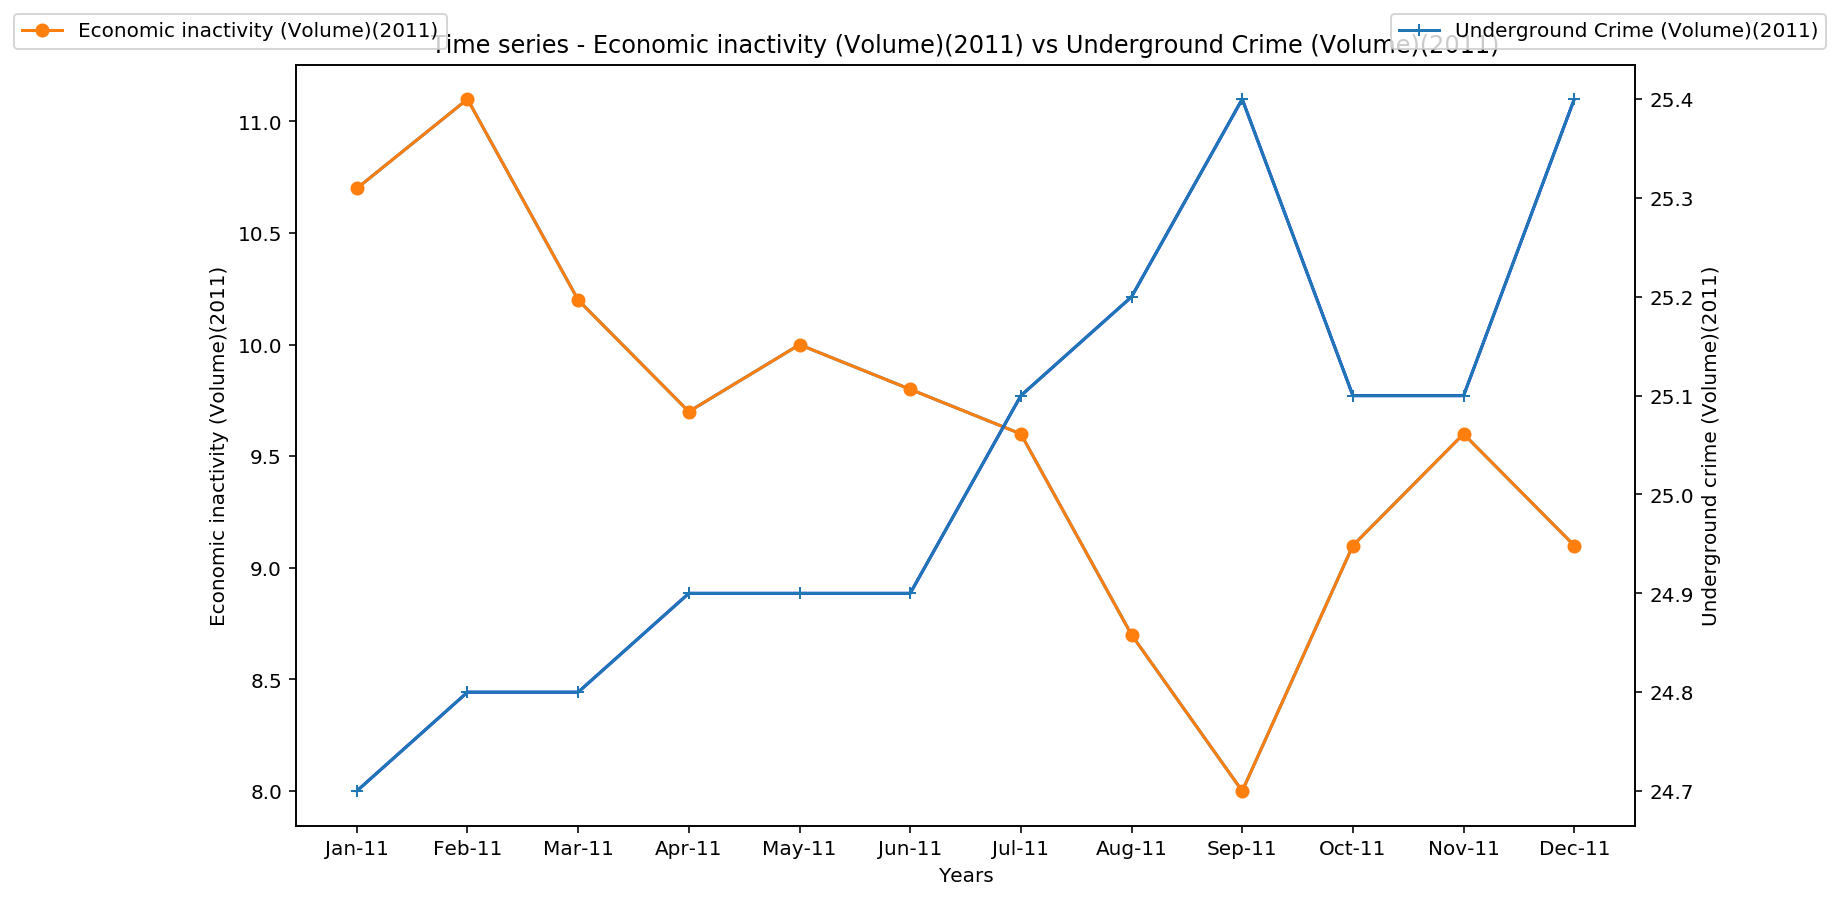

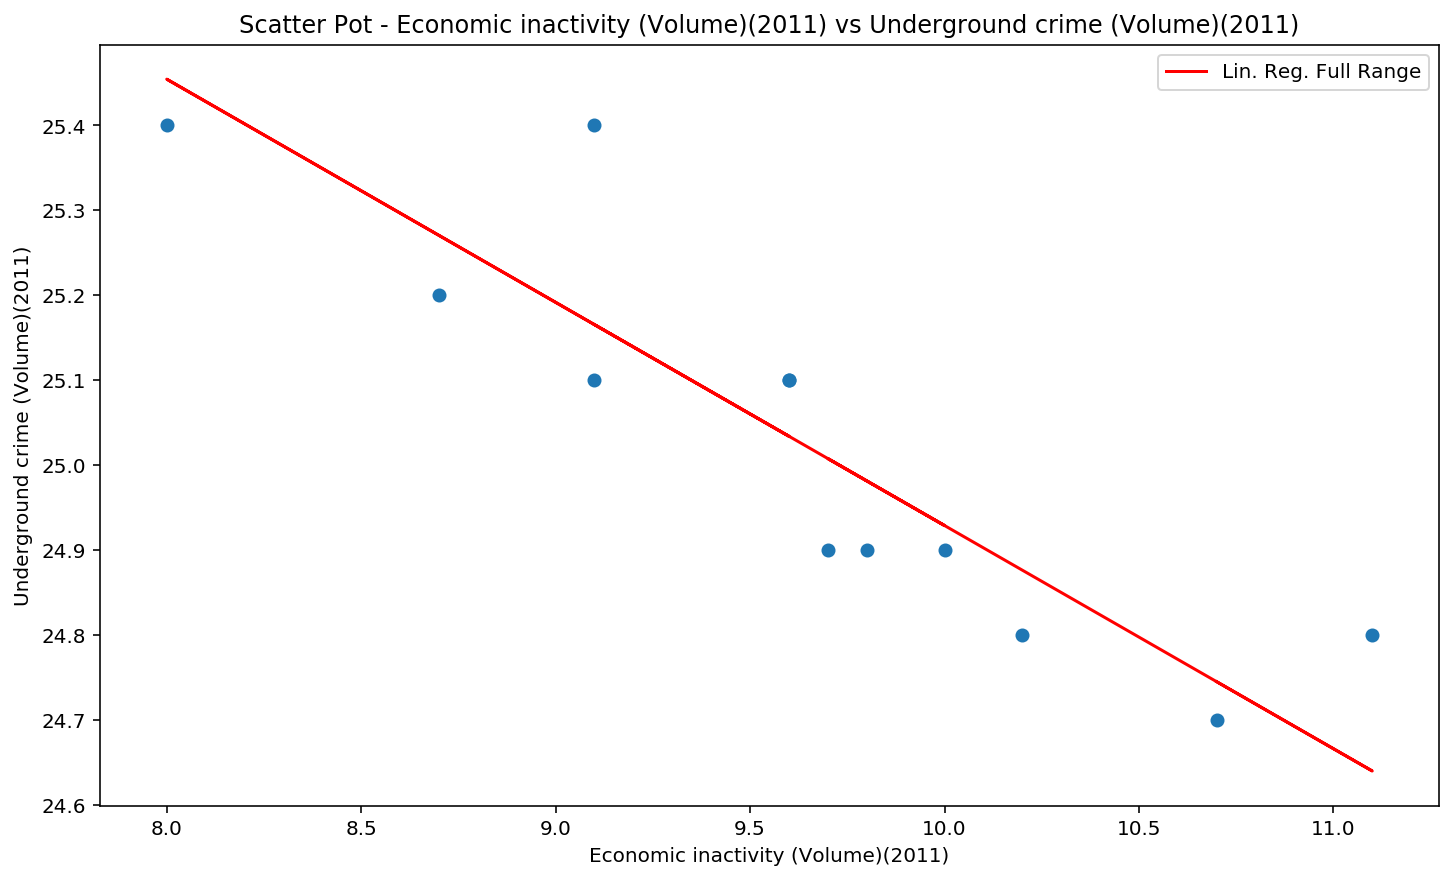

-0.26281410896795465 Linear regression
27.5567759163913 Linear regression

Covariance: -0.17272727272727245  Underground crime per Economic inactivity

Correlation Coefficient: -0.8864594891791091


In [33]:
# 2011 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2011):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2011)")
ax1.set_title("Time series - Economic inactivity (Volume)(2011) vs Underground Crime (Volume)(2011)")

ax1.plot(list_2011, economic_inactivity_2011)
ax1.plot(list_2011, economic_inactivity_2011, marker='o', label='Economic inactivity (Volume)(2011)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2011)")
ax2.plot(underground_crime_2011,'b')
ax2.plot(underground_crime_2011, marker='+',label='Underground Crime (Volume)(2011)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2011):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2011
y = underground_crime_2011
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2011, underground_crime_2011)
y_tot = economic_inactivity_2011*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2011, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2011, underground_crime_2011)


plt.xlabel("Economic inactivity (Volume)(2011)")
plt.ylabel("Underground crime (Volume)(2011)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2011) vs Underground crime (Volume)(2011)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2011
y = underground_crime_2011

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2011_covariance = np.cov(underground_crime_2011,economic_inactivity_2011)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2011,underground_crime_2011)[1][0]

print("Covariance:",underground_crime_2011_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

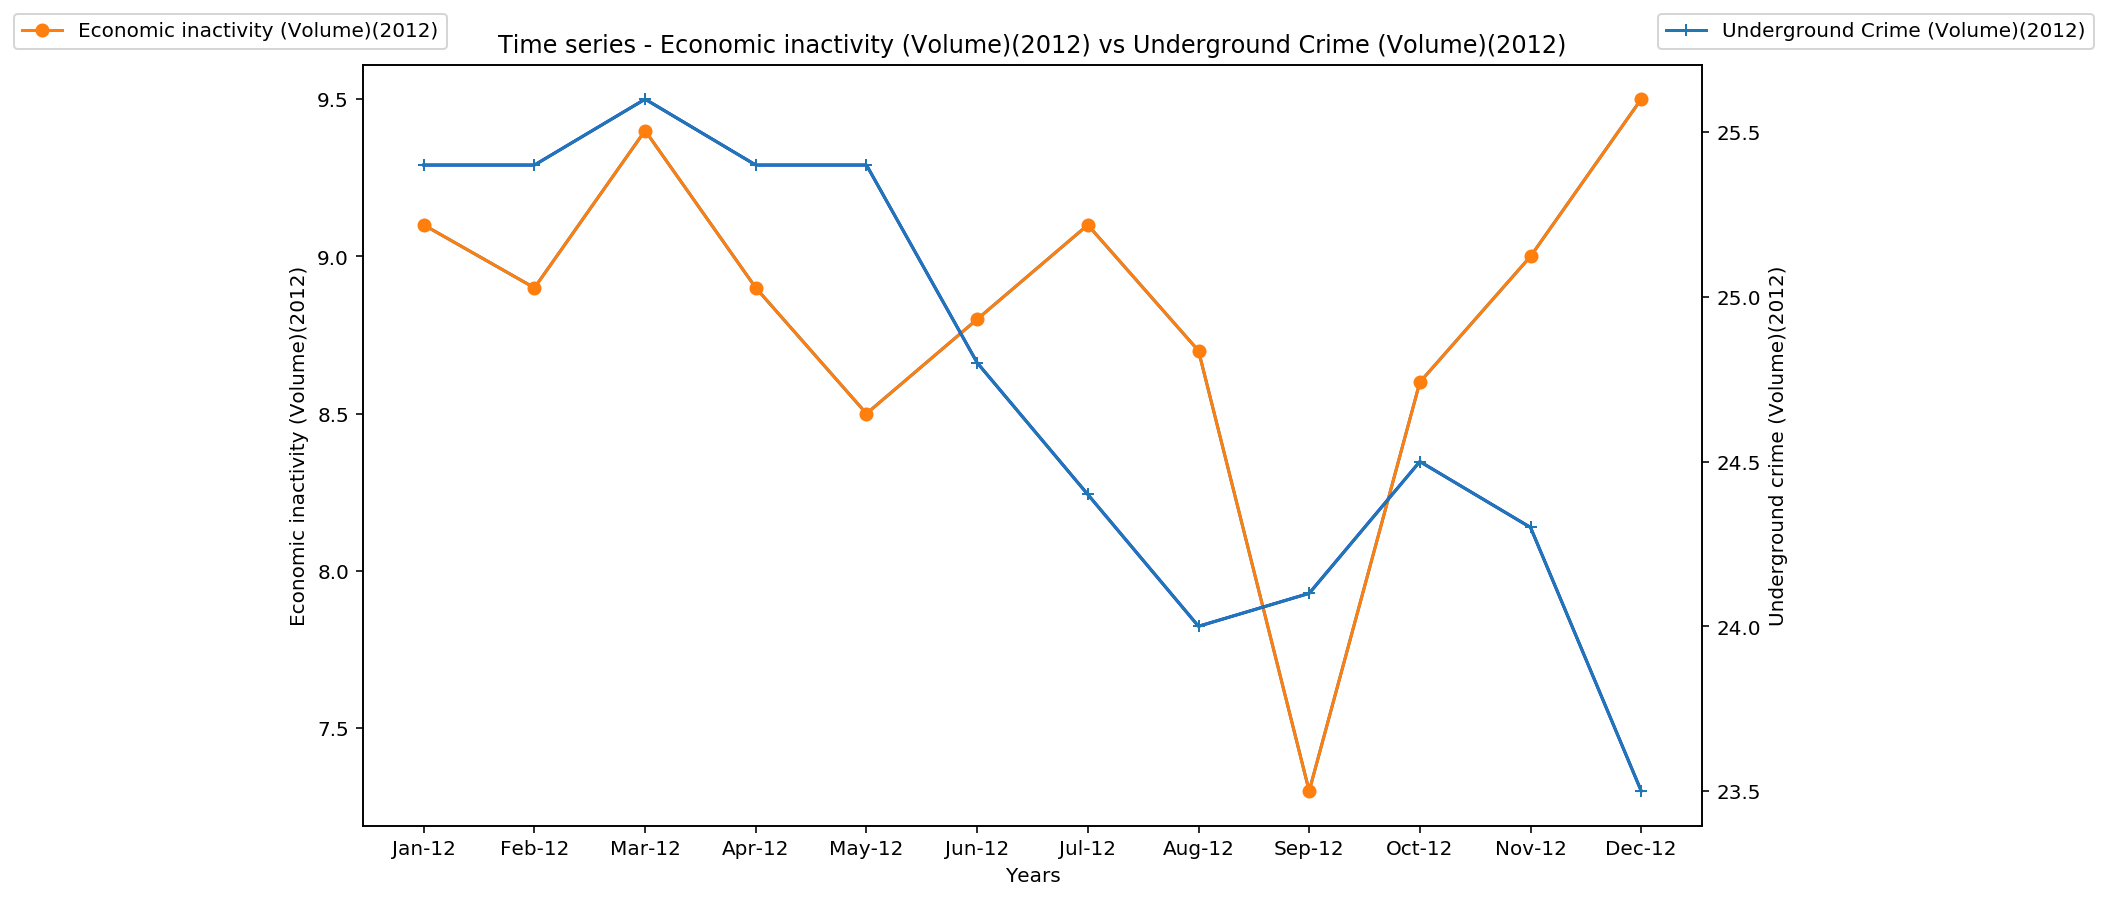

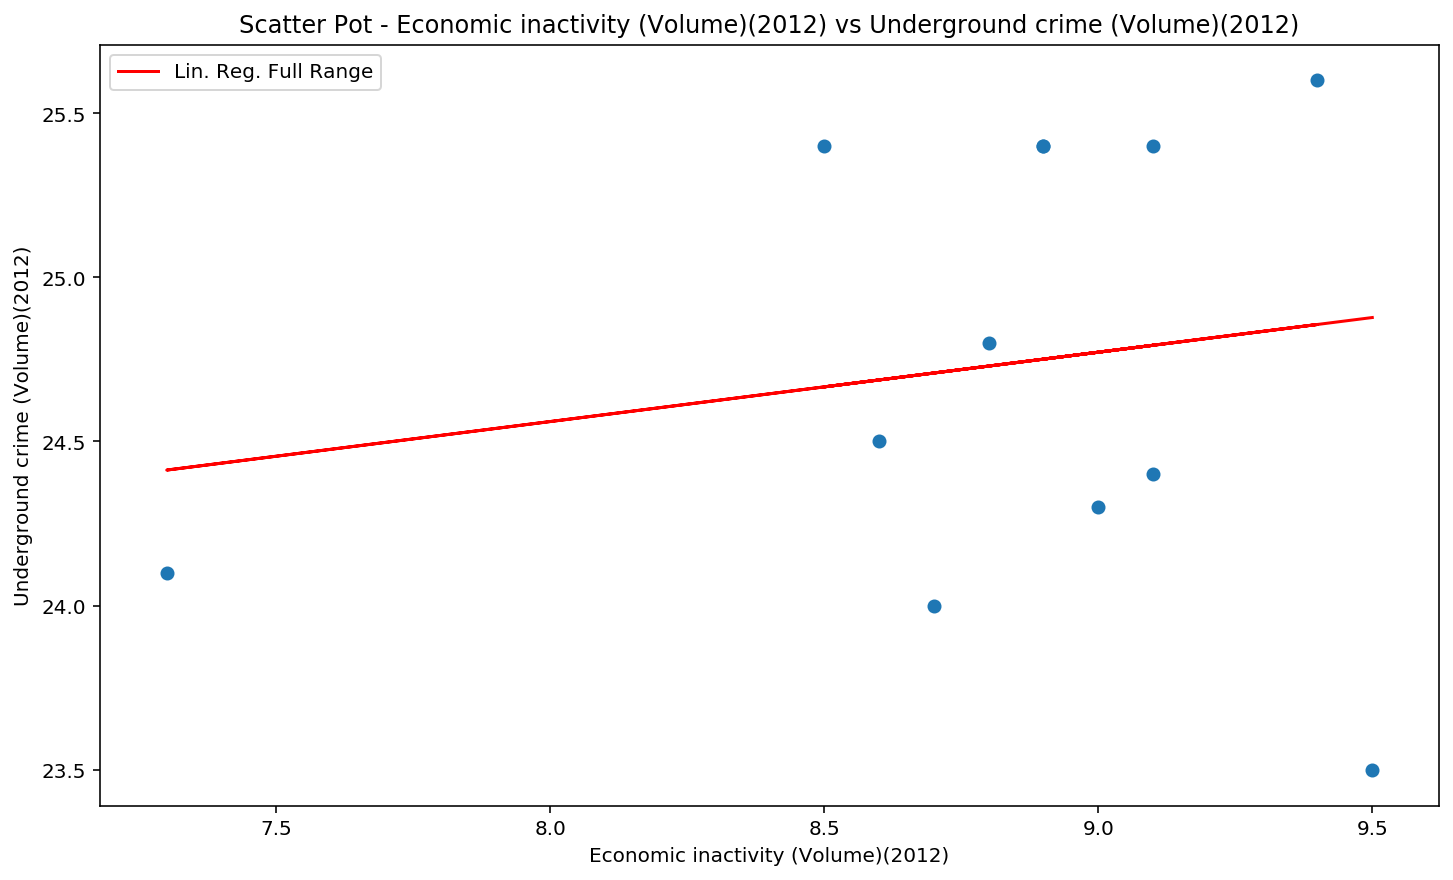

0.21127865423167416 Linear regression
22.87055986519074 Linear regression

Covariance: 0.0612121212121212  Underground crime per Economic inactivity

Correlation Coefficient: 0.15617338848379453


In [34]:
# 2012 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2012):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2012)")
ax1.set_title("Time series - Economic inactivity (Volume)(2012) vs Underground Crime (Volume)(2012)")

ax1.plot(list_2012, economic_inactivity_2012)
ax1.plot(list_2012, economic_inactivity_2012, marker='o', label='Economic inactivity (Volume)(2012)')
ax1.legend(bbox_to_anchor=(0.07, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2012)")
ax2.plot(underground_crime_2012,'b')
ax2.plot(underground_crime_2012, marker='+',label='Underground Crime (Volume)(2012)')
ax2.legend(bbox_to_anchor=(1.3, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2012):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2012
y = underground_crime_2012
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2012, underground_crime_2012)
y_tot = economic_inactivity_2012*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2012, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2012, underground_crime_2012)


plt.xlabel("Economic inactivity (Volume)(2012)")
plt.ylabel("Underground crime (Volume)(2012)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2012) vs Underground crime (Volume)(2012)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2012
y = underground_crime_2012

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2012_covariance = np.cov(underground_crime_2012,economic_inactivity_2012)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2012,underground_crime_2012)[1][0]

print("Covariance:",underground_crime_2012_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

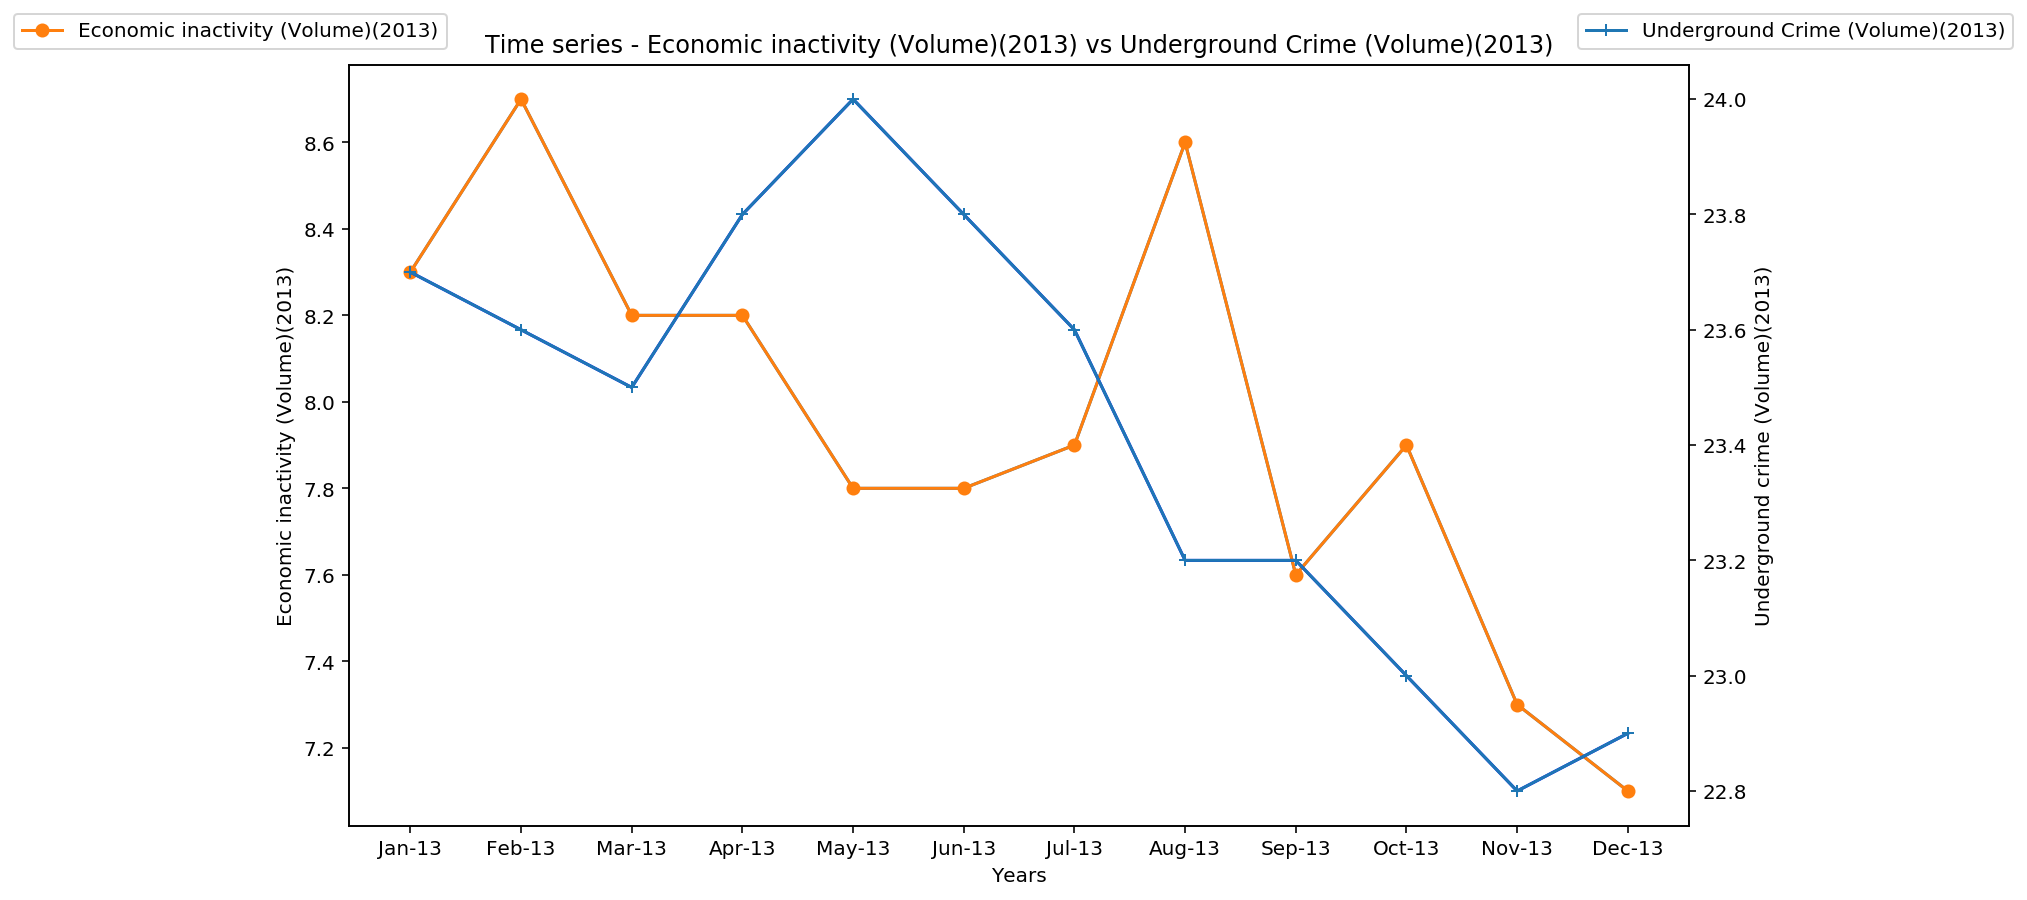

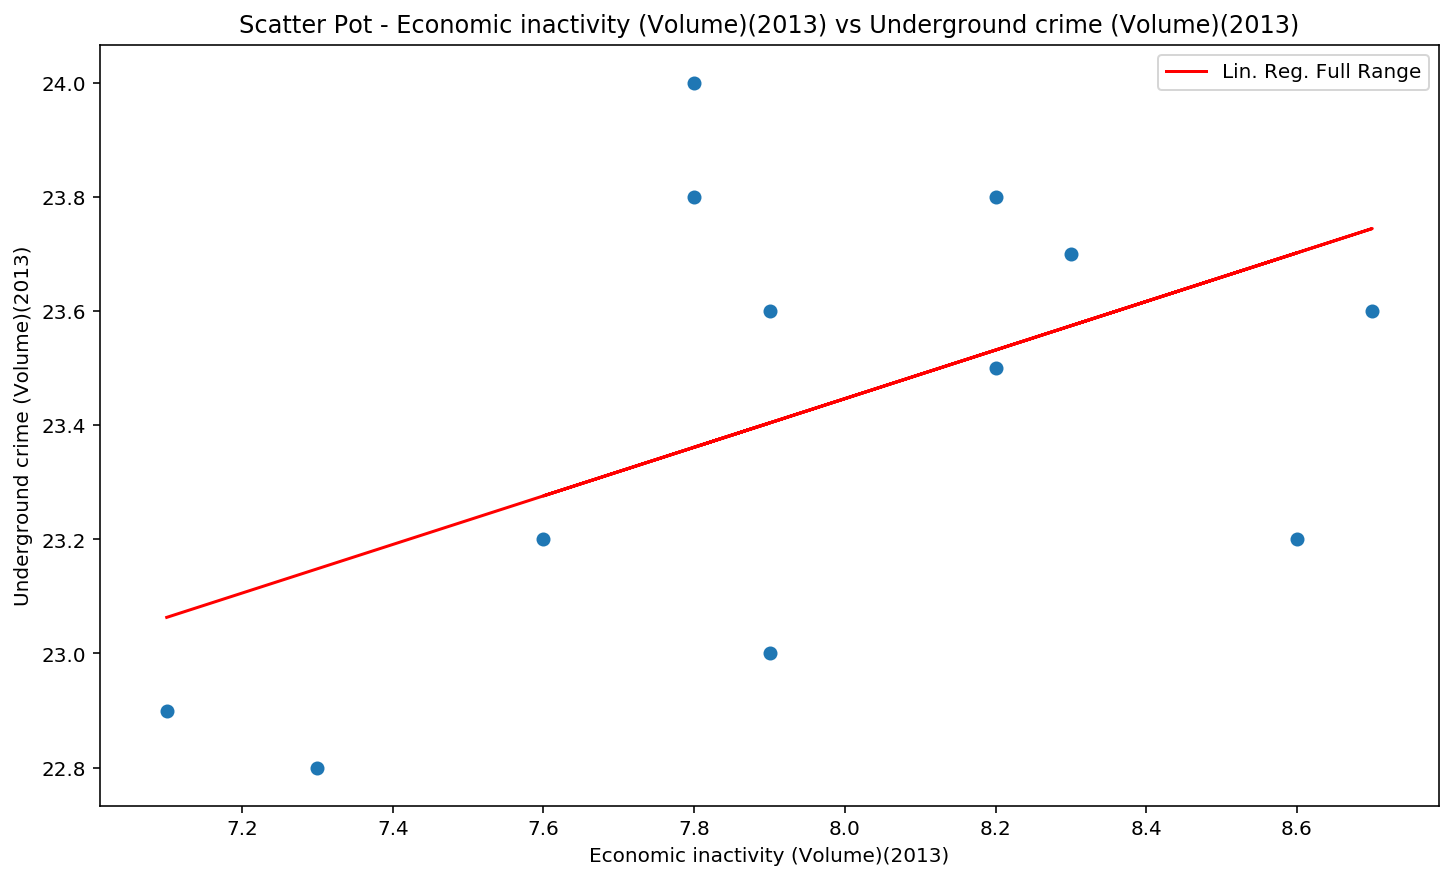

0.42566844919786156 Linear regression
20.040935828876997 Linear regression

Covariance: 0.09045454545454558  Underground crime per Economic inactivity

Correlation Coefficient: 0.47753964280348377


In [35]:
# 2013 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2013):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2013)")
ax1.set_title("Time series - Economic inactivity (Volume)(2013) vs Underground Crime (Volume)(2013)")

ax1.plot(list_2013, economic_inactivity_2013)
ax1.plot(list_2013, economic_inactivity_2013, marker='o', label='Economic inactivity (Volume)(2013)')
ax1.legend(bbox_to_anchor=(0.08, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2013)")
ax2.plot(underground_crime_2013,'b')
ax2.plot(underground_crime_2013, marker='+',label='Underground Crime (Volume)(2013)')
ax2.legend(bbox_to_anchor=(1.25, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2013):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2013
y = underground_crime_2013
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2013, underground_crime_2013)
y_tot = economic_inactivity_2013*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2013, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2013, underground_crime_2013)


plt.xlabel("Economic inactivity (Volume)(2013)")
plt.ylabel("Underground crime (Volume)(2013)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2013) vs Underground crime (Volume)(2013)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2013
y = underground_crime_2013

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2013_covariance = np.cov(underground_crime_2013,economic_inactivity_2013)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2013,underground_crime_2013)[1][0]

print("Covariance:",underground_crime_2013_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

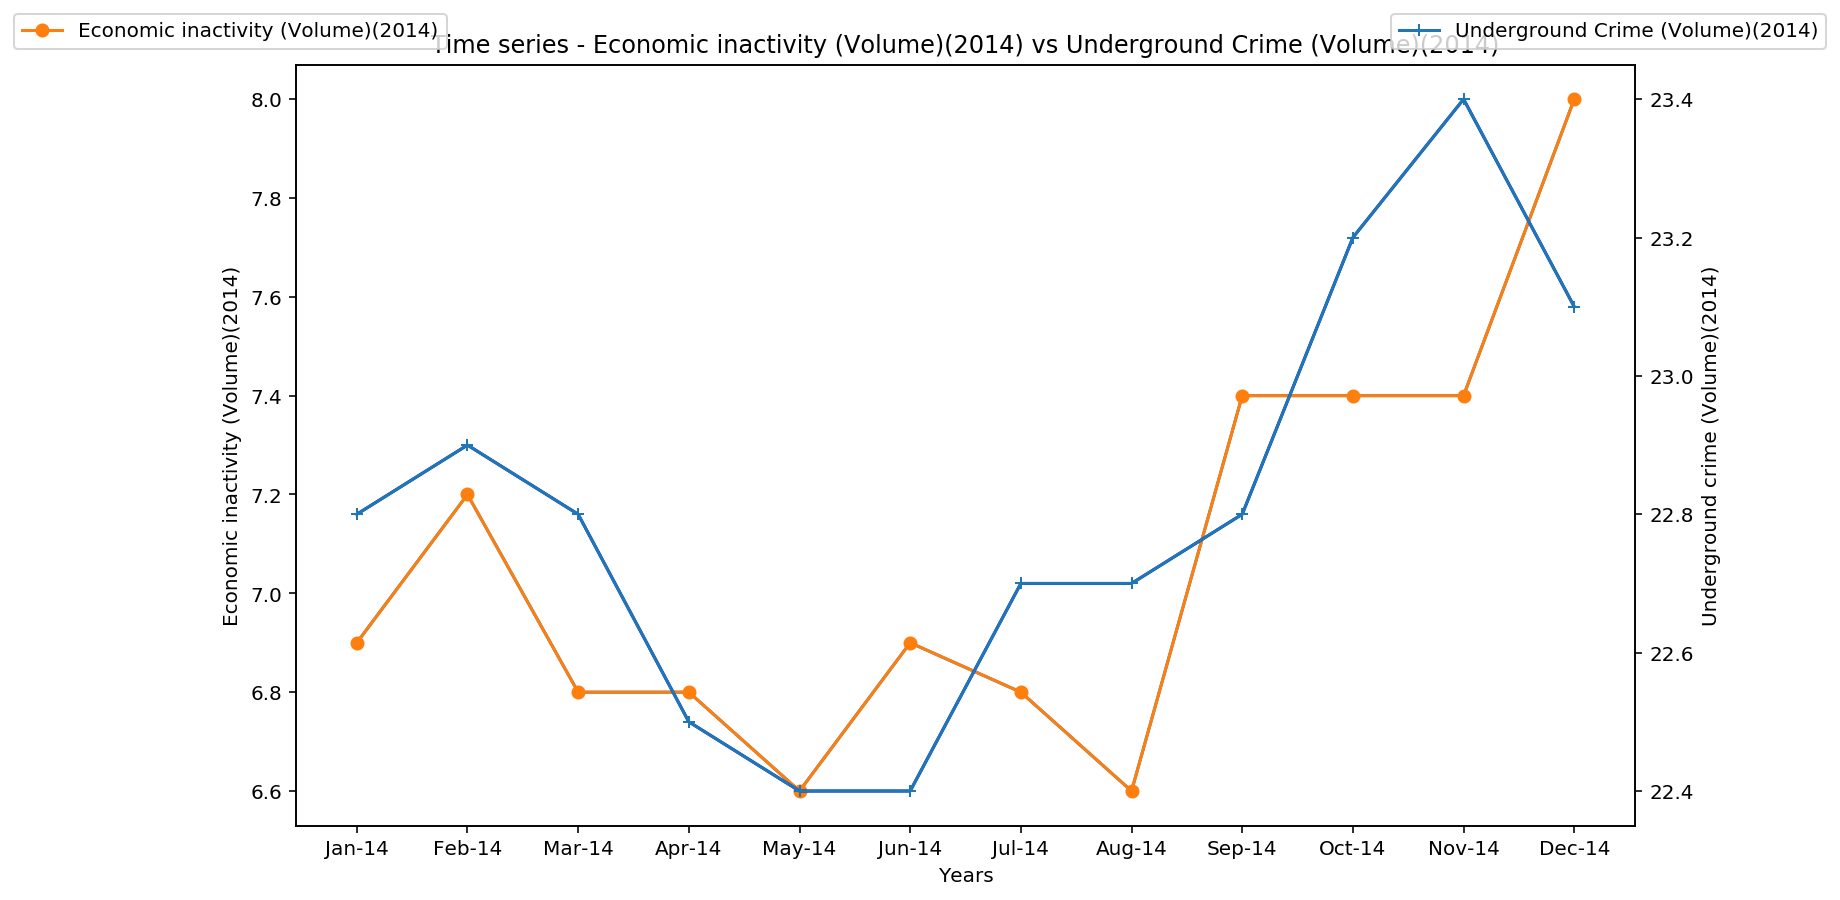

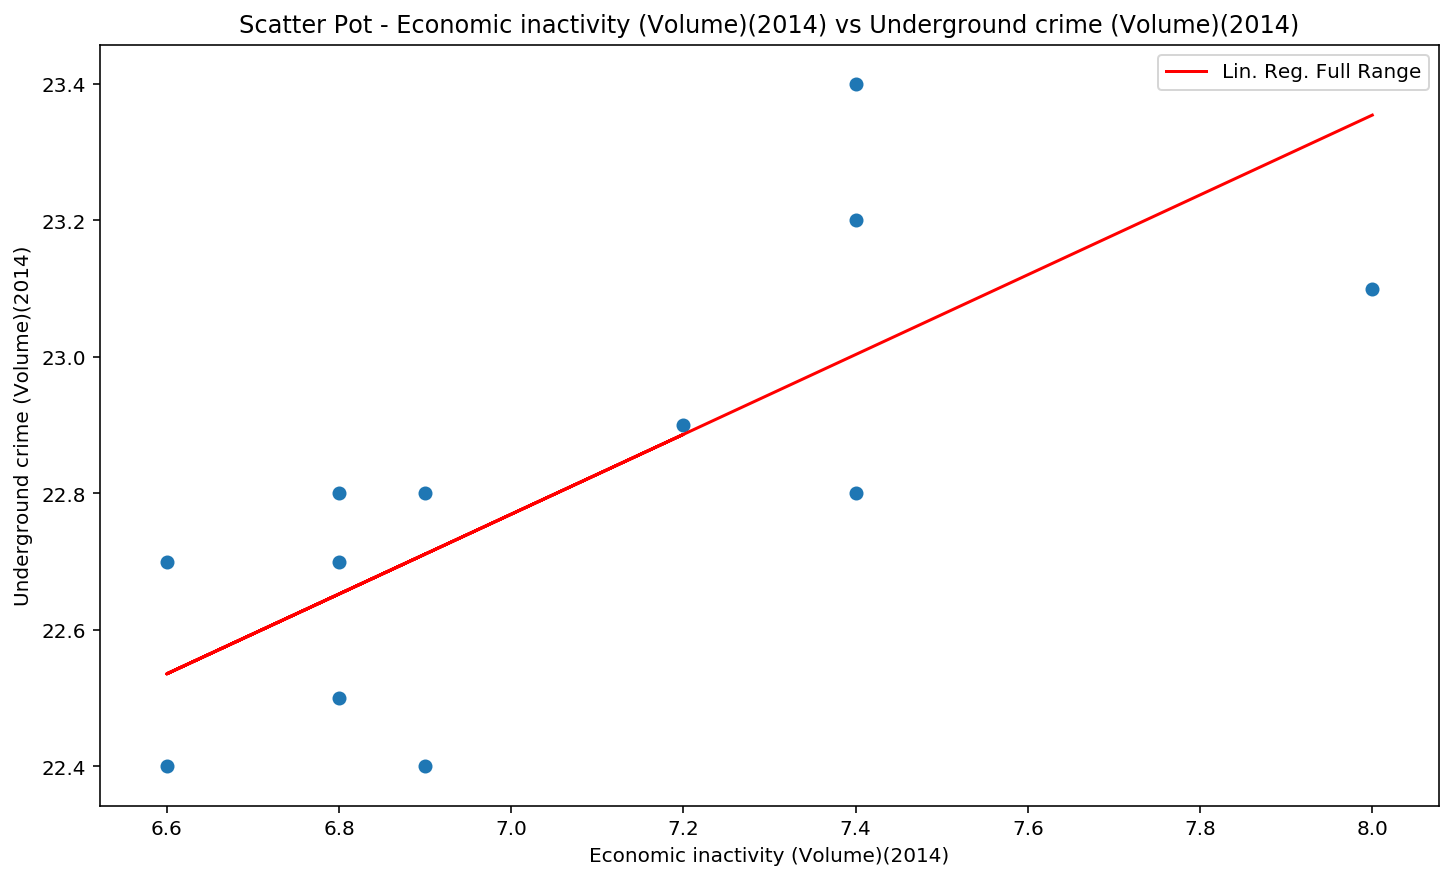

0.5850896508335962 Linear regression
18.67369980077592 Linear regression

Covariance: 0.09393939393939416  Underground crime per Economic inactivity

Correlation Coefficient: 0.7267999775716046


In [36]:
# 2014 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2014):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2014)")
ax1.set_title("Time series - Economic inactivity (Volume)(2014) vs Underground Crime (Volume)(2014)")

ax1.plot(list_2014, economic_inactivity_2014)
ax1.plot(list_2014, economic_inactivity_2014, marker='o', label='Economic inactivity (Volume)(2014)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2014)")
ax2.plot(underground_crime_2014,'b')
ax2.plot(underground_crime_2014, marker='+',label='Underground Crime (Volume)(2014)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2014):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2014
y = underground_crime_2014
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2014, underground_crime_2014)
y_tot = economic_inactivity_2014*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2014, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2014, underground_crime_2014)


plt.xlabel("Economic inactivity (Volume)(2014)")
plt.ylabel("Underground crime (Volume)(2014)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2014) vs Underground crime (Volume)(2014)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2014
y = underground_crime_2014

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2014_covariance = np.cov(underground_crime_2014,economic_inactivity_2014)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2014,underground_crime_2014)[1][0]

print("Covariance:",underground_crime_2014_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

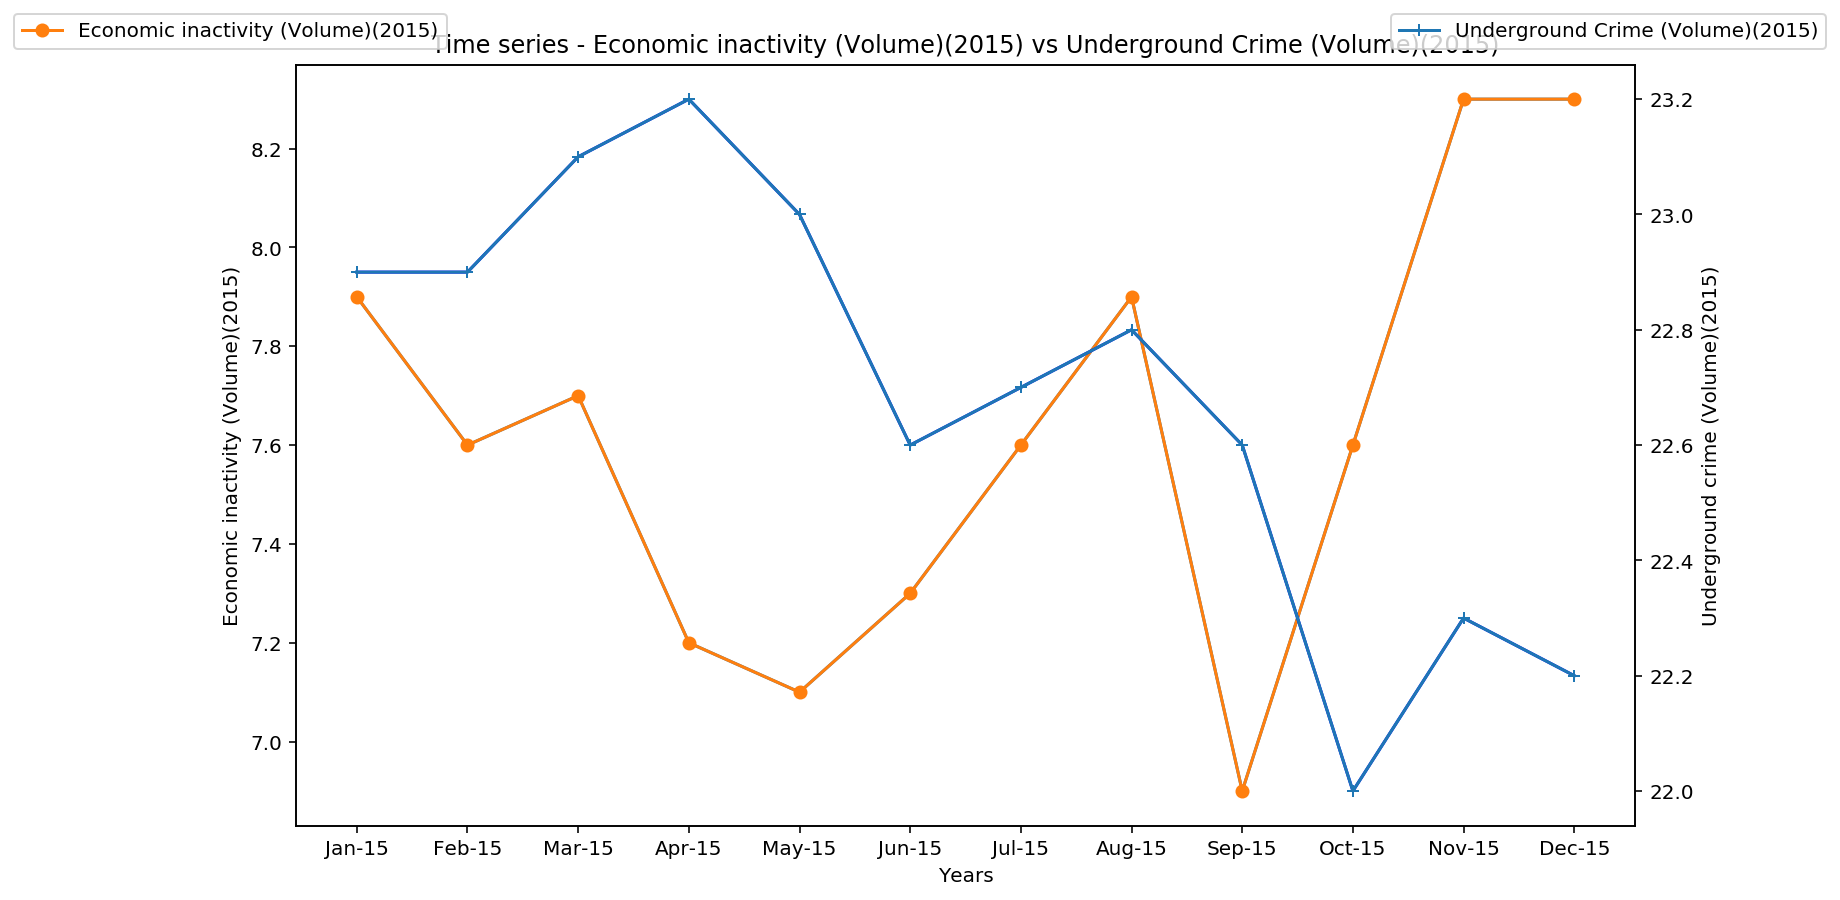

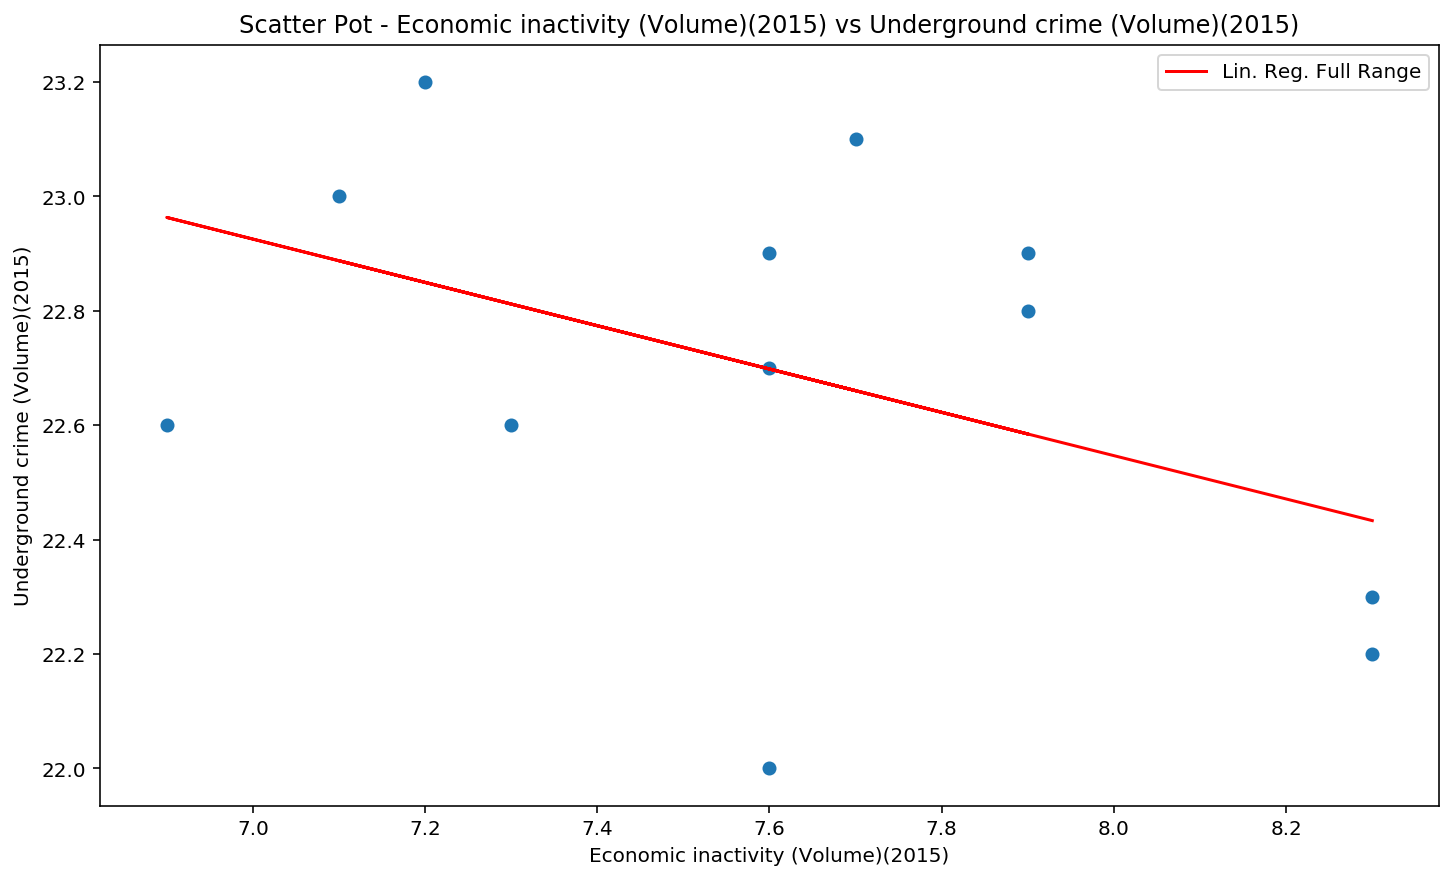

-0.3785302796121965 Linear regression
25.574805629712895 Linear regression

Covariance: -0.06803030303030316  Underground crime per Economic inactivity

Correlation Coefficient: -0.41479639713621


In [37]:
# 2015 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2015):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2015)")
ax1.set_title("Time series - Economic inactivity (Volume)(2015) vs Underground Crime (Volume)(2015)")

ax1.plot(list_2015, economic_inactivity_2015)
ax1.plot(list_2015, economic_inactivity_2015, marker='o', label='Economic inactivity (Volume)(2015)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2015)")
ax2.plot(underground_crime_2015,'b')
ax2.plot(underground_crime_2015, marker='+',label='Underground Crime (Volume)(2015)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2015):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2015
y = underground_crime_2015
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2015, underground_crime_2015)
y_tot = economic_inactivity_2015*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2015, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2015, underground_crime_2015)


plt.xlabel("Economic inactivity (Volume)(2015)")
plt.ylabel("Underground crime (Volume)(2015)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2015) vs Underground crime (Volume)(2015)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2015
y = underground_crime_2015

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2015_covariance = np.cov(underground_crime_2015,economic_inactivity_2015)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2015,underground_crime_2015)[1][0]

print("Covariance:",underground_crime_2015_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

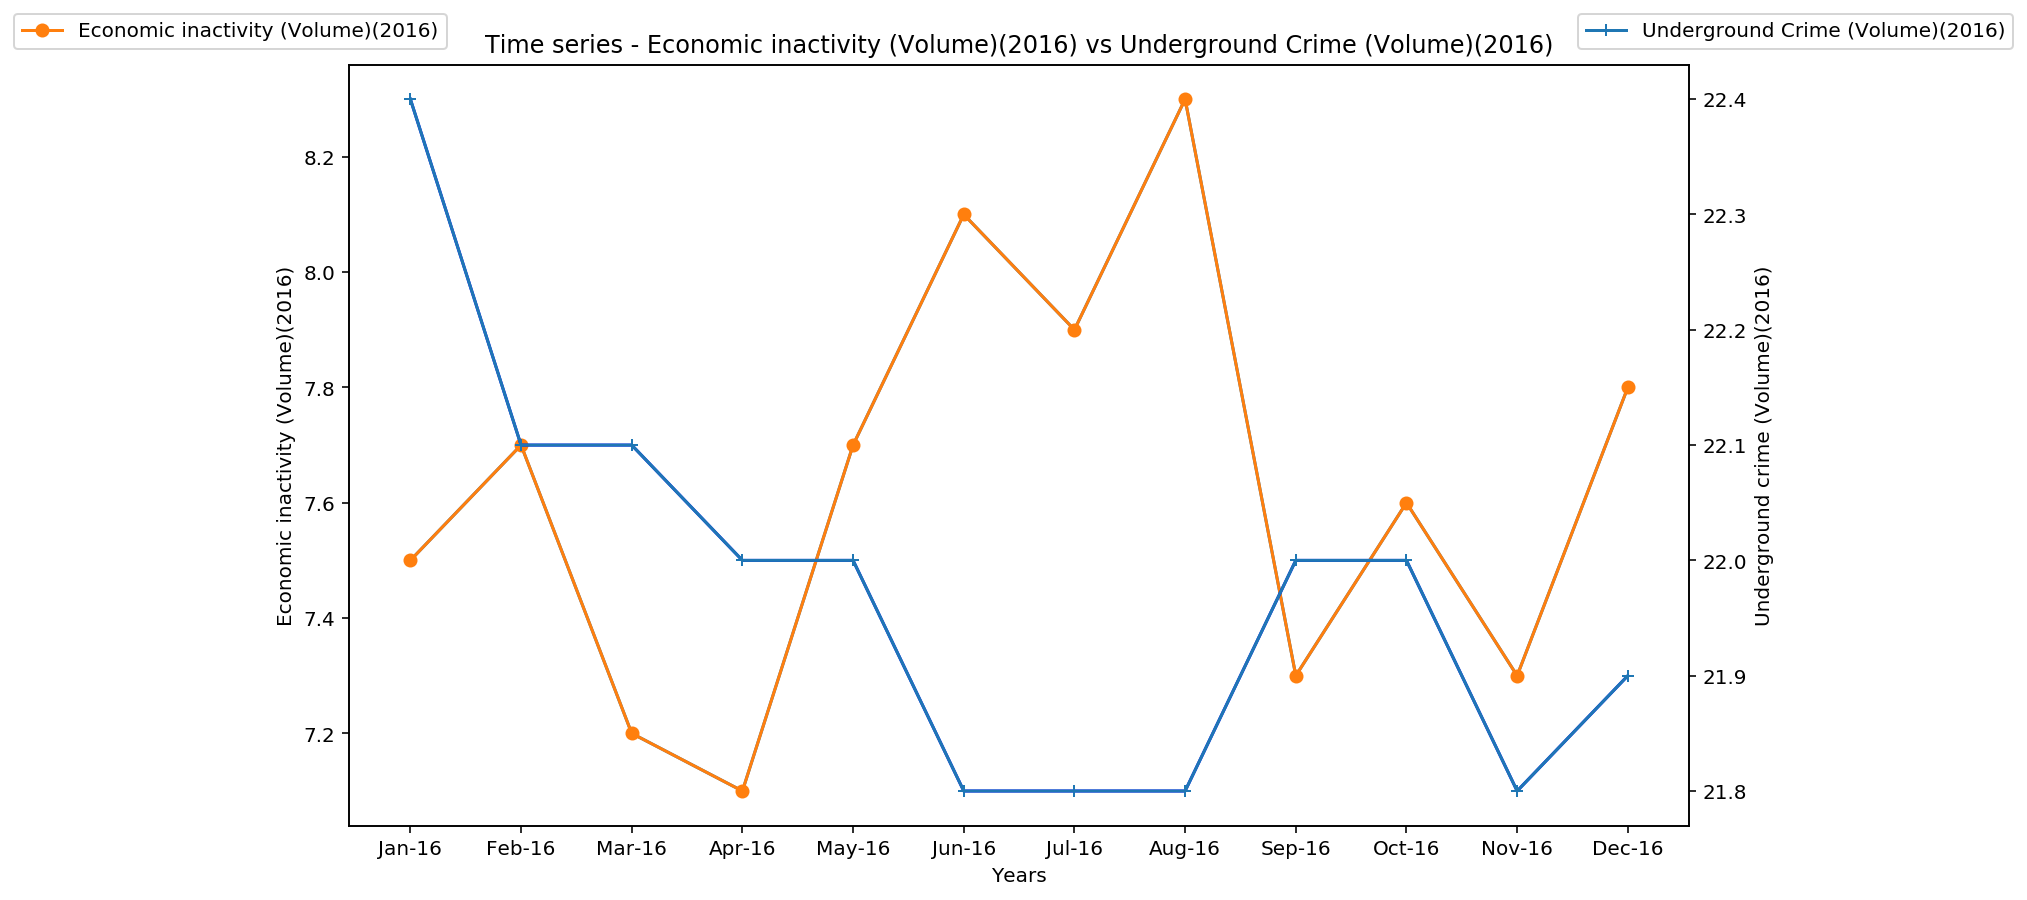

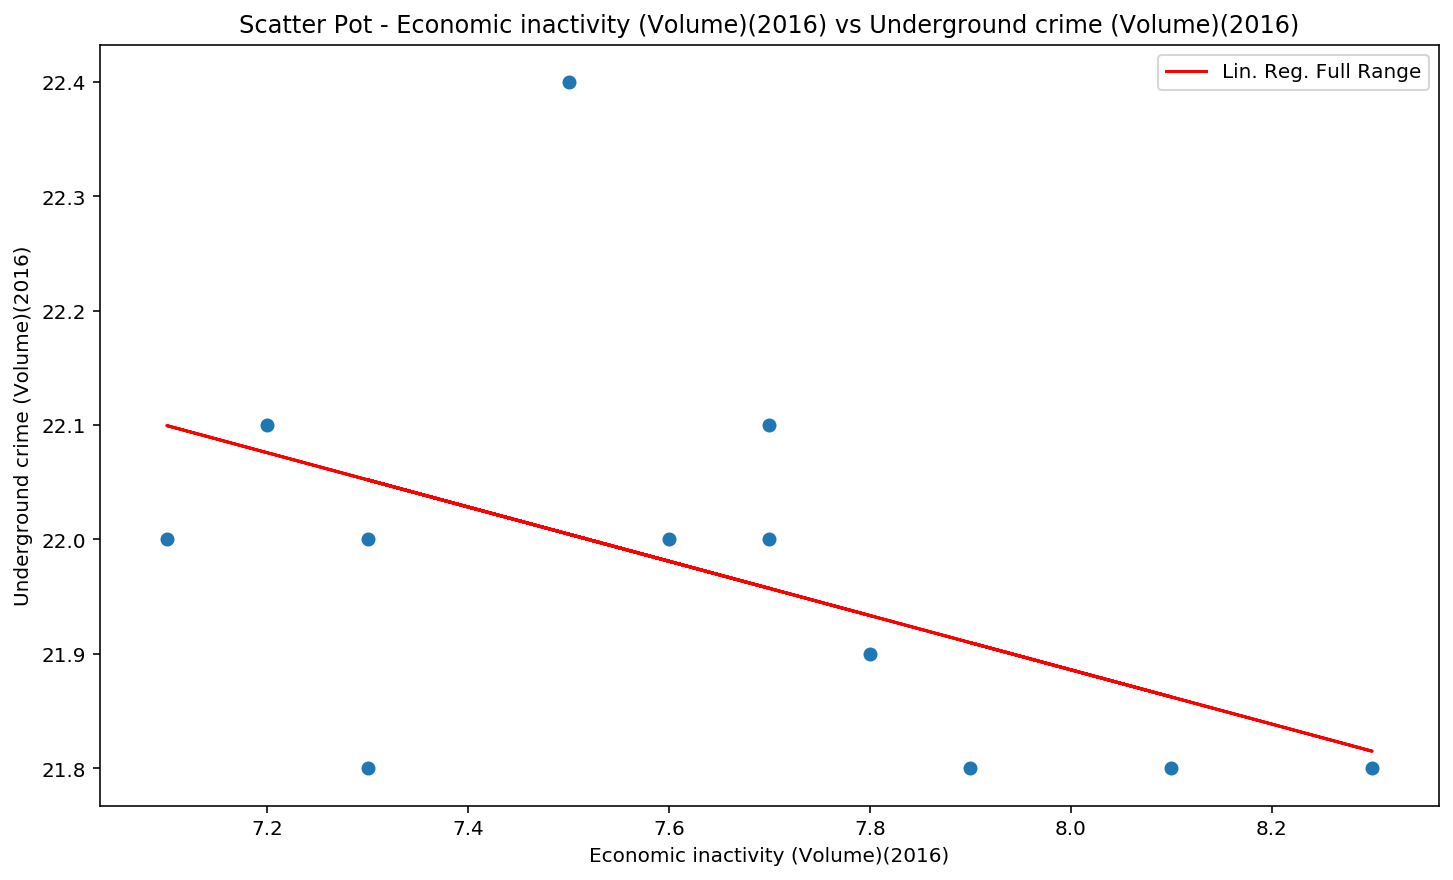

-0.23731411927027404 Linear regression
23.784520159435836 Linear regression

Covariance: -0.029318181818181806  Underground crime per Economic inactivity

Correlation Coefficient: -0.452587005013812


In [38]:
# 2016 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2016):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2016)")
ax1.set_title("Time series - Economic inactivity (Volume)(2016) vs Underground Crime (Volume)(2016)")

ax1.plot(list_2016, economic_inactivity_2016)
ax1.plot(list_2016, economic_inactivity_2016, marker='o', label='Economic inactivity (Volume)(2016)')
ax1.legend(bbox_to_anchor=(0.08, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2016)")
ax2.plot(underground_crime_2016,'b')
ax2.plot(underground_crime_2016, marker='+',label='Underground Crime (Volume)(2016)')
ax2.legend(bbox_to_anchor=(1.25, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2016):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2016
y = underground_crime_2016
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2016, underground_crime_2016)
y_tot = economic_inactivity_2016*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2016, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2016, underground_crime_2016)


plt.xlabel("Economic inactivity (Volume)(2016)")
plt.ylabel("Underground crime (Volume)(2016)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2016) vs Underground crime (Volume)(2016)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2016
y = underground_crime_2016

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2016_covariance = np.cov(underground_crime_2016,economic_inactivity_2016)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2016,underground_crime_2016)[1][0]

print("Covariance:",underground_crime_2016_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

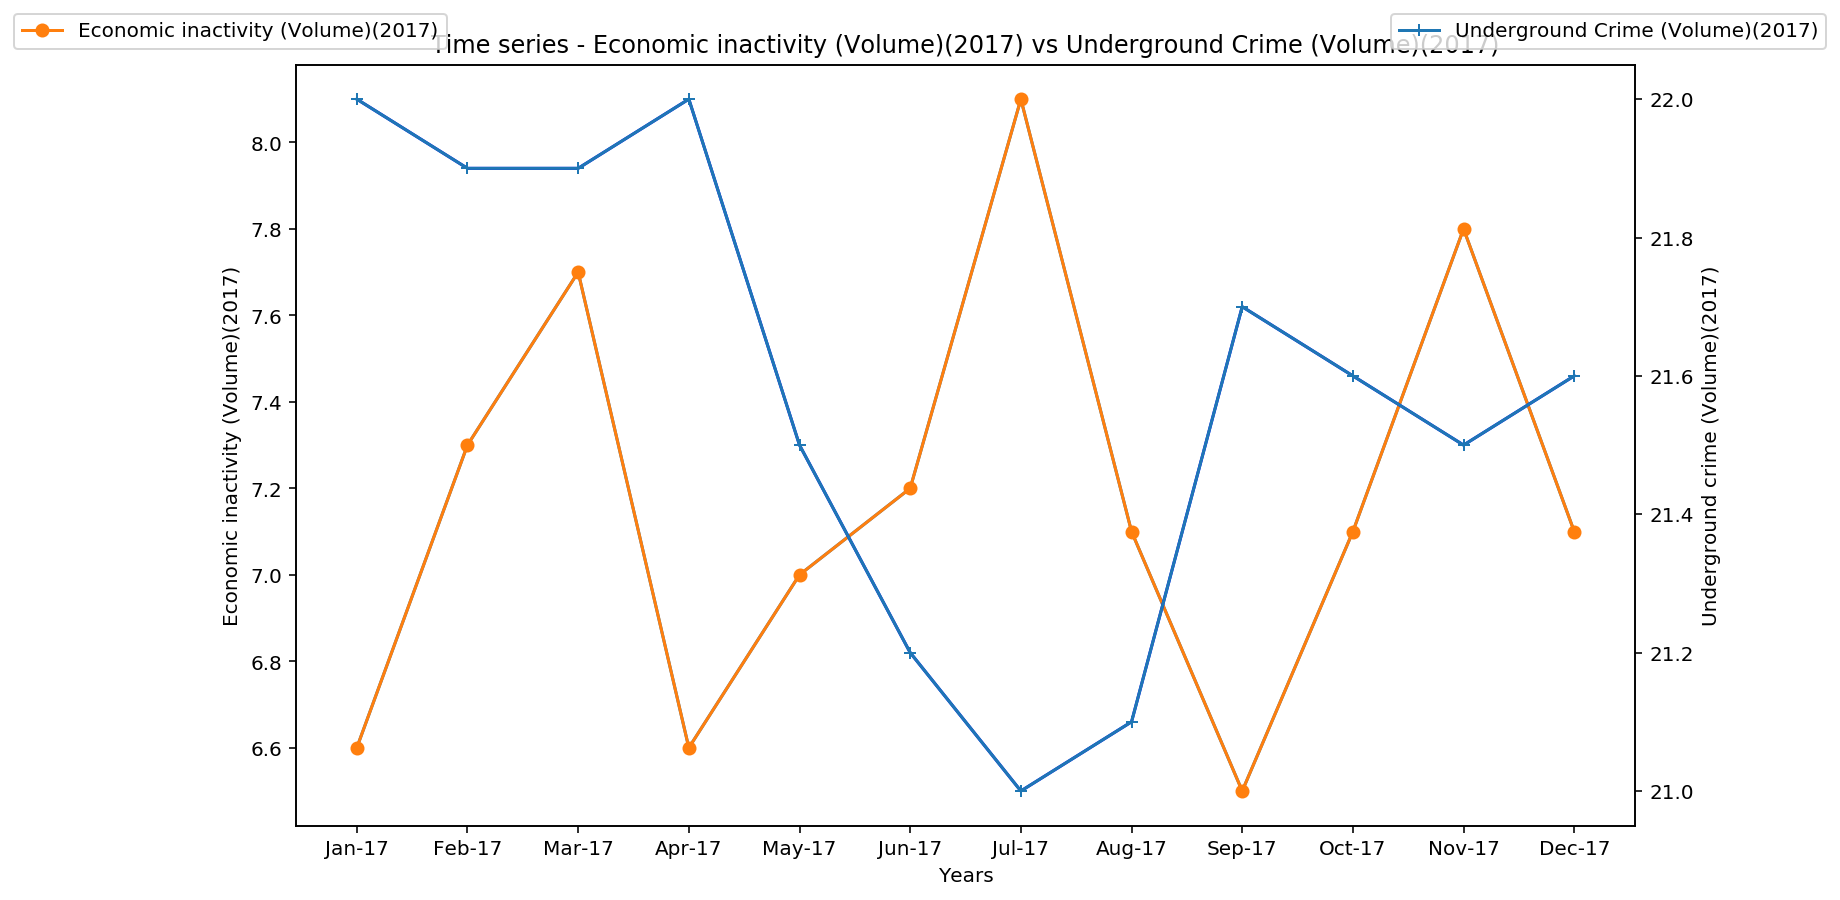

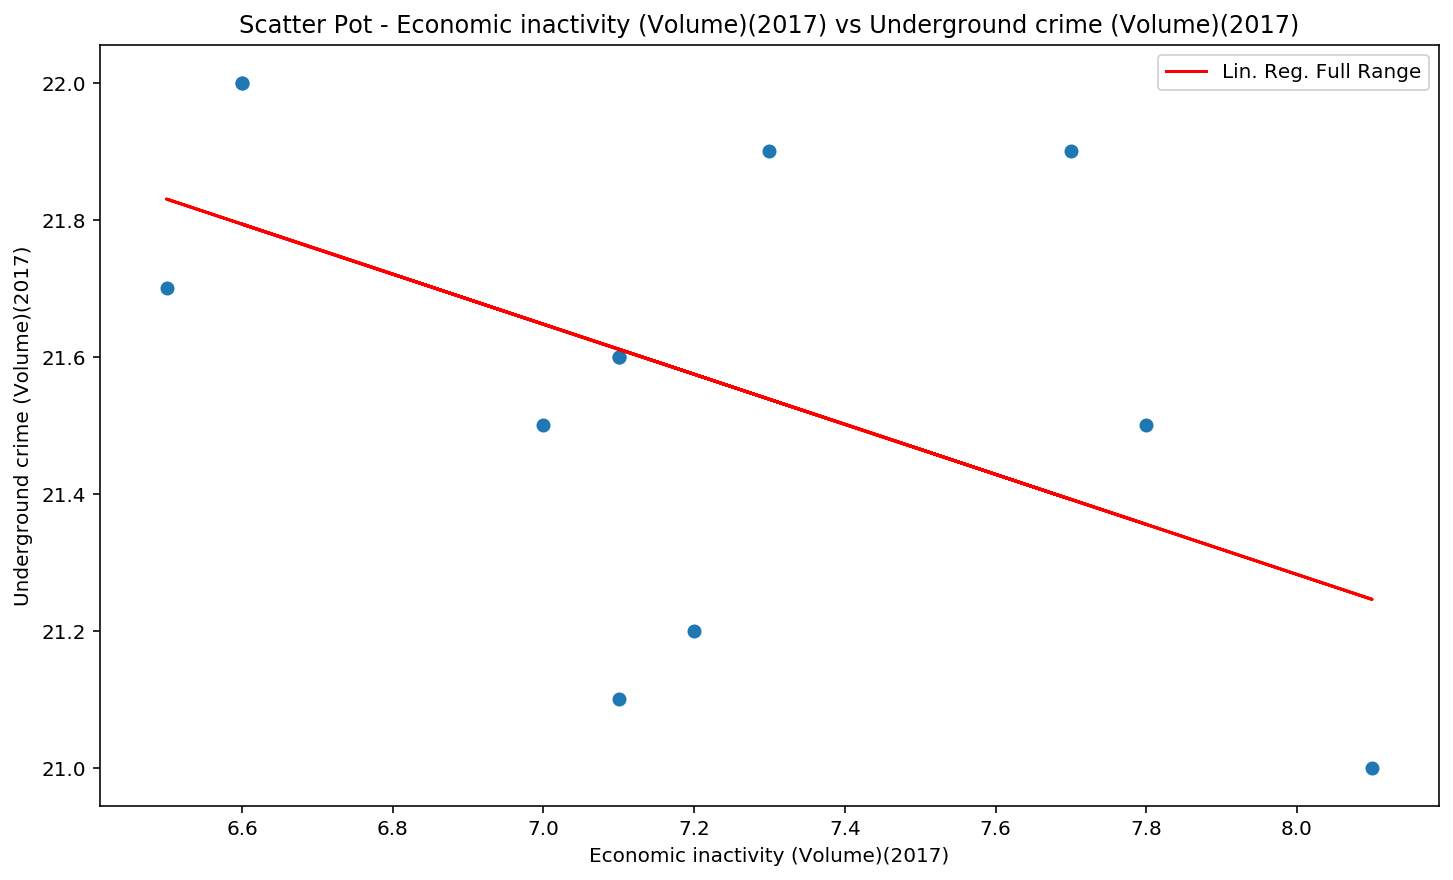

-0.3653183079640067 Linear regression
24.20449219297508 Linear regression

Covariance: -0.08227272727272734  Underground crime per Economic inactivity

Correlation Coefficient: -0.48344998889207685


In [39]:
# 2017 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2017):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2017)")
ax1.set_title("Time series - Economic inactivity (Volume)(2017) vs Underground Crime (Volume)(2017)")

ax1.plot(list_2017, economic_inactivity_2017)
ax1.plot(list_2017, economic_inactivity_2017, marker='o', label='Economic inactivity (Volume)(2017)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2017)")
ax2.plot(underground_crime_2017,'b')
ax2.plot(underground_crime_2017, marker='+',label='Underground Crime (Volume)(2017)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2017):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2017
y = underground_crime_2017
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2017, underground_crime_2017)
y_tot = economic_inactivity_2017*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2017, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2017, underground_crime_2017)


plt.xlabel("Economic inactivity (Volume)(2017)")
plt.ylabel("Underground crime (Volume)(2017)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2017) vs Underground crime (Volume)(2017)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2017
y = underground_crime_2017

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2017_covariance = np.cov(underground_crime_2017,economic_inactivity_2017)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2017,underground_crime_2017)[1][0]

print("Covariance:",underground_crime_2017_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

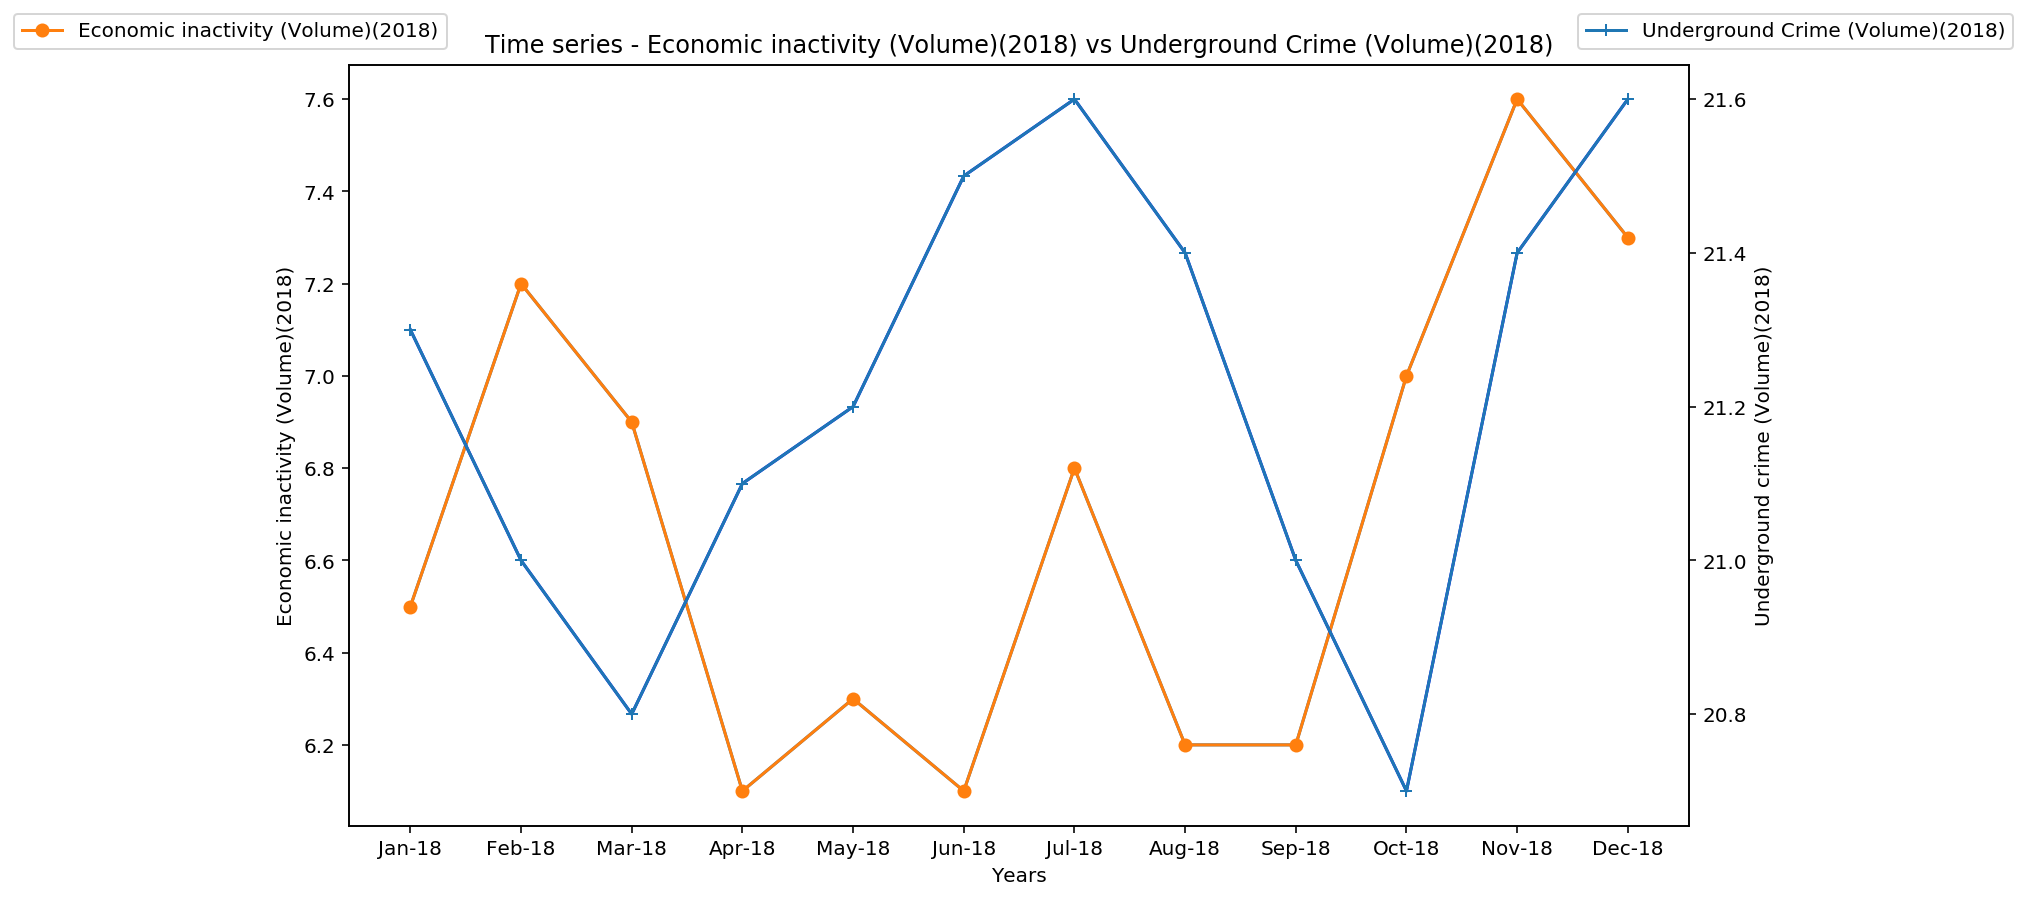

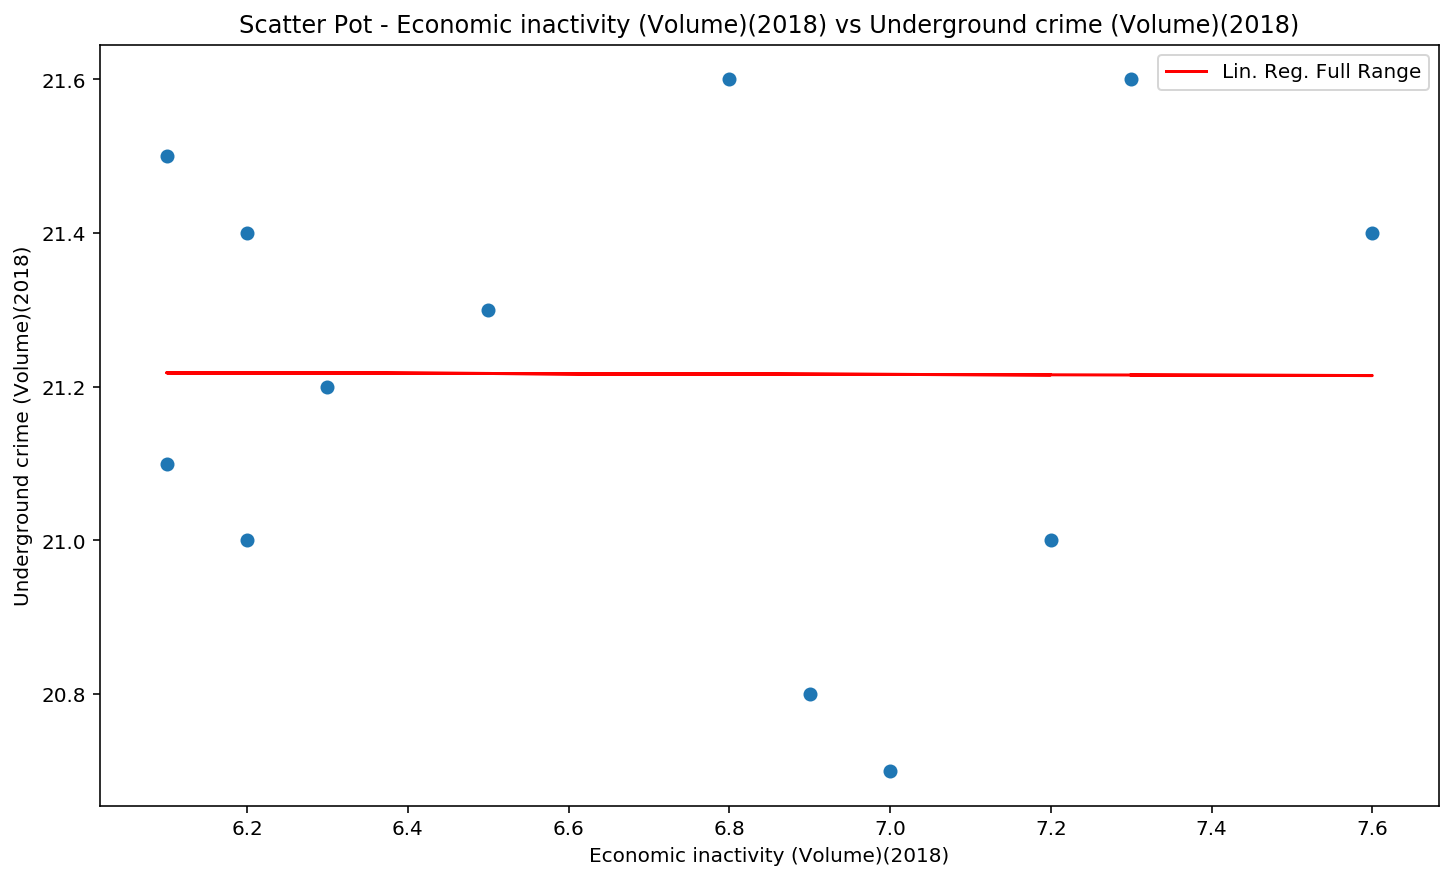

-0.0024432454443655354 Linear regression
21.23299569038651 Linear regression

Covariance: -0.000606060606060674  Underground crime per Economic inactivity

Correlation Coefficient: -0.0038705142618355535


In [40]:
# 2018 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2018):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2018)")
ax1.set_title("Time series - Economic inactivity (Volume)(2018) vs Underground Crime (Volume)(2018)")

ax1.plot(list_2018, economic_inactivity_2018)
ax1.plot(list_2018, economic_inactivity_2018, marker='o', label='Economic inactivity (Volume)(2018)')
ax1.legend(bbox_to_anchor=(0.08, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2018)")
ax2.plot(underground_crime_2018,'b')
ax2.plot(underground_crime_2018, marker='+',label='Underground Crime (Volume)(2018)')
ax2.legend(bbox_to_anchor=(1.25, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2018):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2018
y = underground_crime_2018
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2018, underground_crime_2018)
y_tot = economic_inactivity_2018*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2018, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2018, underground_crime_2018)


plt.xlabel("Economic inactivity (Volume)(2018)")
plt.ylabel("Underground crime (Volume)(2018)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2018) vs Underground crime (Volume)(2018)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2018
y = underground_crime_2018

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2018_covariance = np.cov(underground_crime_2018,economic_inactivity_2018)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2018,underground_crime_2018)[1][0]

print("Covariance:",underground_crime_2018_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

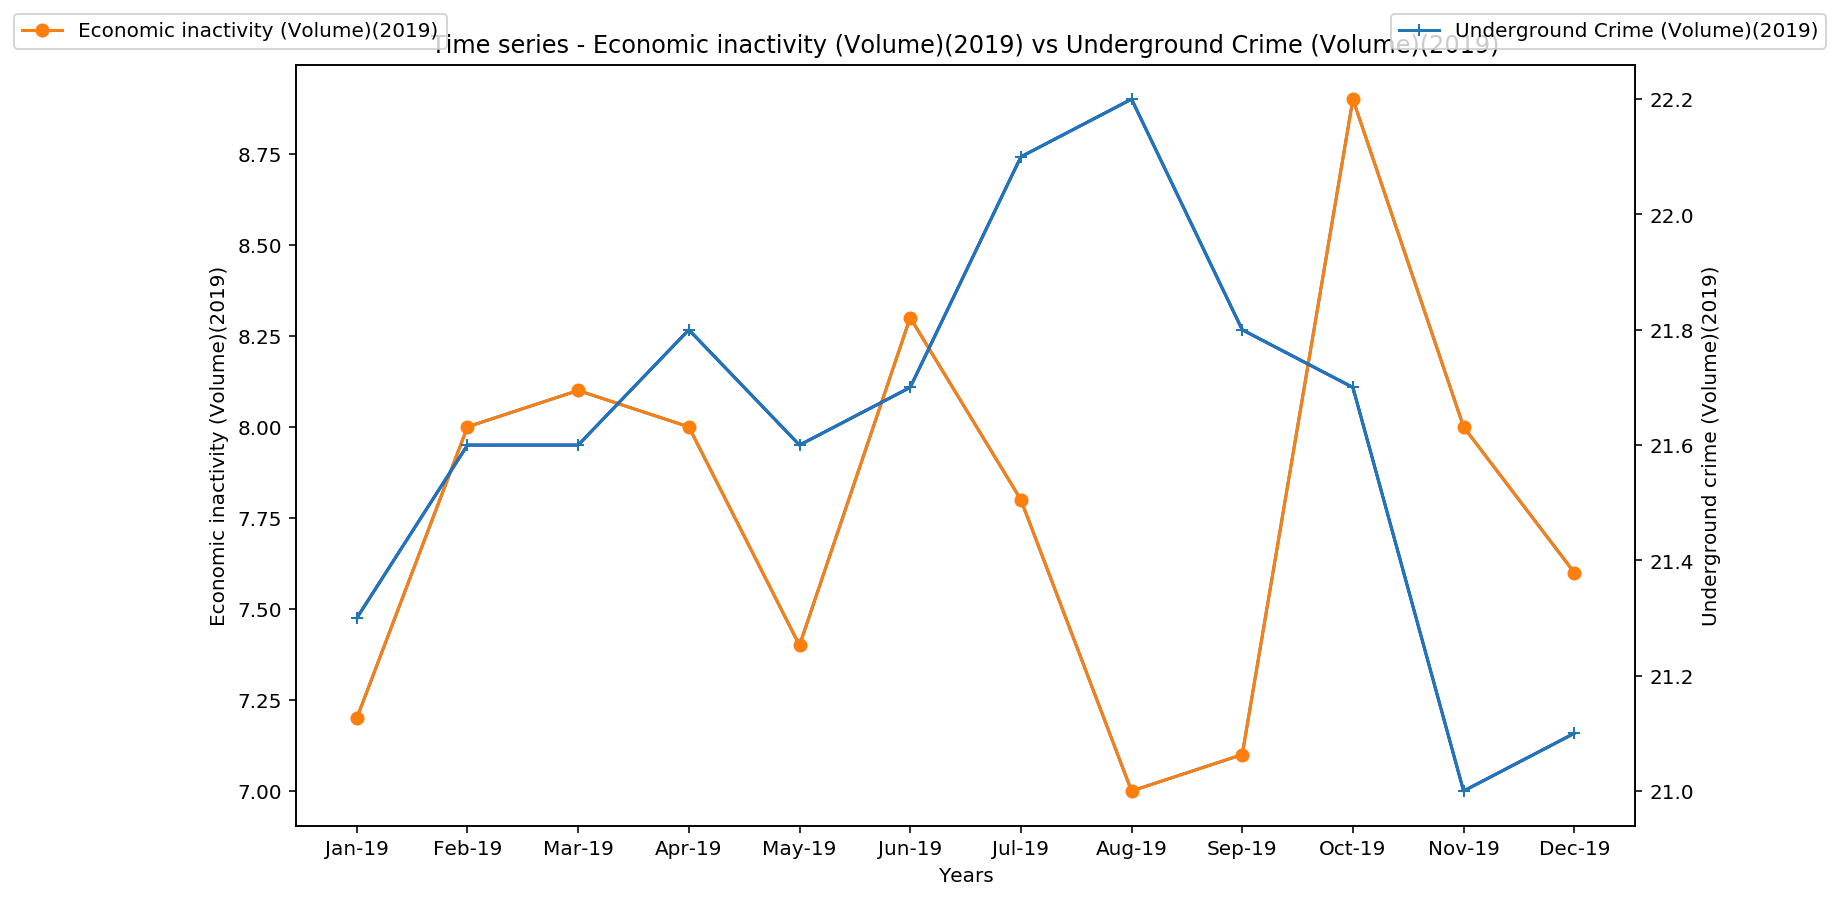

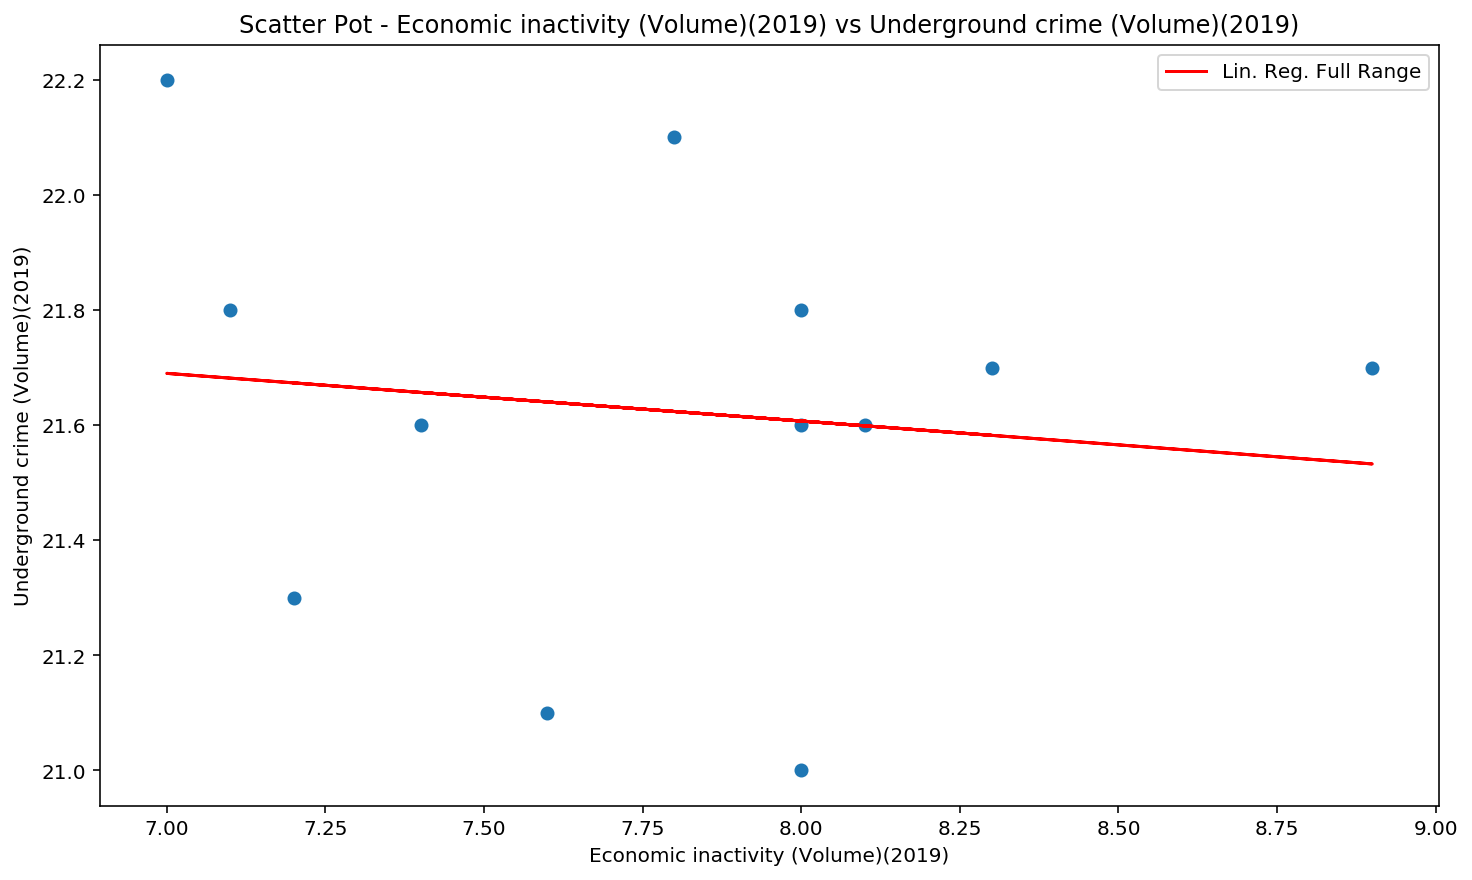

-0.0828744244831637 Linear regression
22.270039270560623 Linear regression

Covariance: -0.023181818181818303  Underground crime per Economic inactivity

Correlation Coefficient: -0.11752618465911065


In [41]:
# 2019 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2019):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2019)")
ax1.set_title("Time series - Economic inactivity (Volume)(2019) vs Underground Crime (Volume)(2019)")

ax1.plot(list_2019, economic_inactivity_2019)
ax1.plot(list_2019, economic_inactivity_2019, marker='o', label='Economic inactivity (Volume)(2019)')
ax1.legend(bbox_to_anchor=(0.12, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2019)")
ax2.plot(underground_crime_2019,'b')
ax2.plot(underground_crime_2019, marker='+',label='Underground Crime (Volume)(2019)')
ax2.legend(bbox_to_anchor=(1.15, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2019):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2019
y = underground_crime_2019
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2019, underground_crime_2019)
y_tot = economic_inactivity_2019*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2019, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2019, underground_crime_2019)


plt.xlabel("Economic inactivity (Volume)(2019)")
plt.ylabel("Underground crime (Volume)(2019)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2019) vs Underground crime (Volume)(2019)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2019
y = underground_crime_2019

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2019_covariance = np.cov(underground_crime_2019,economic_inactivity_2019)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2019,underground_crime_2019)[1][0]

print("Covariance:",underground_crime_2019_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

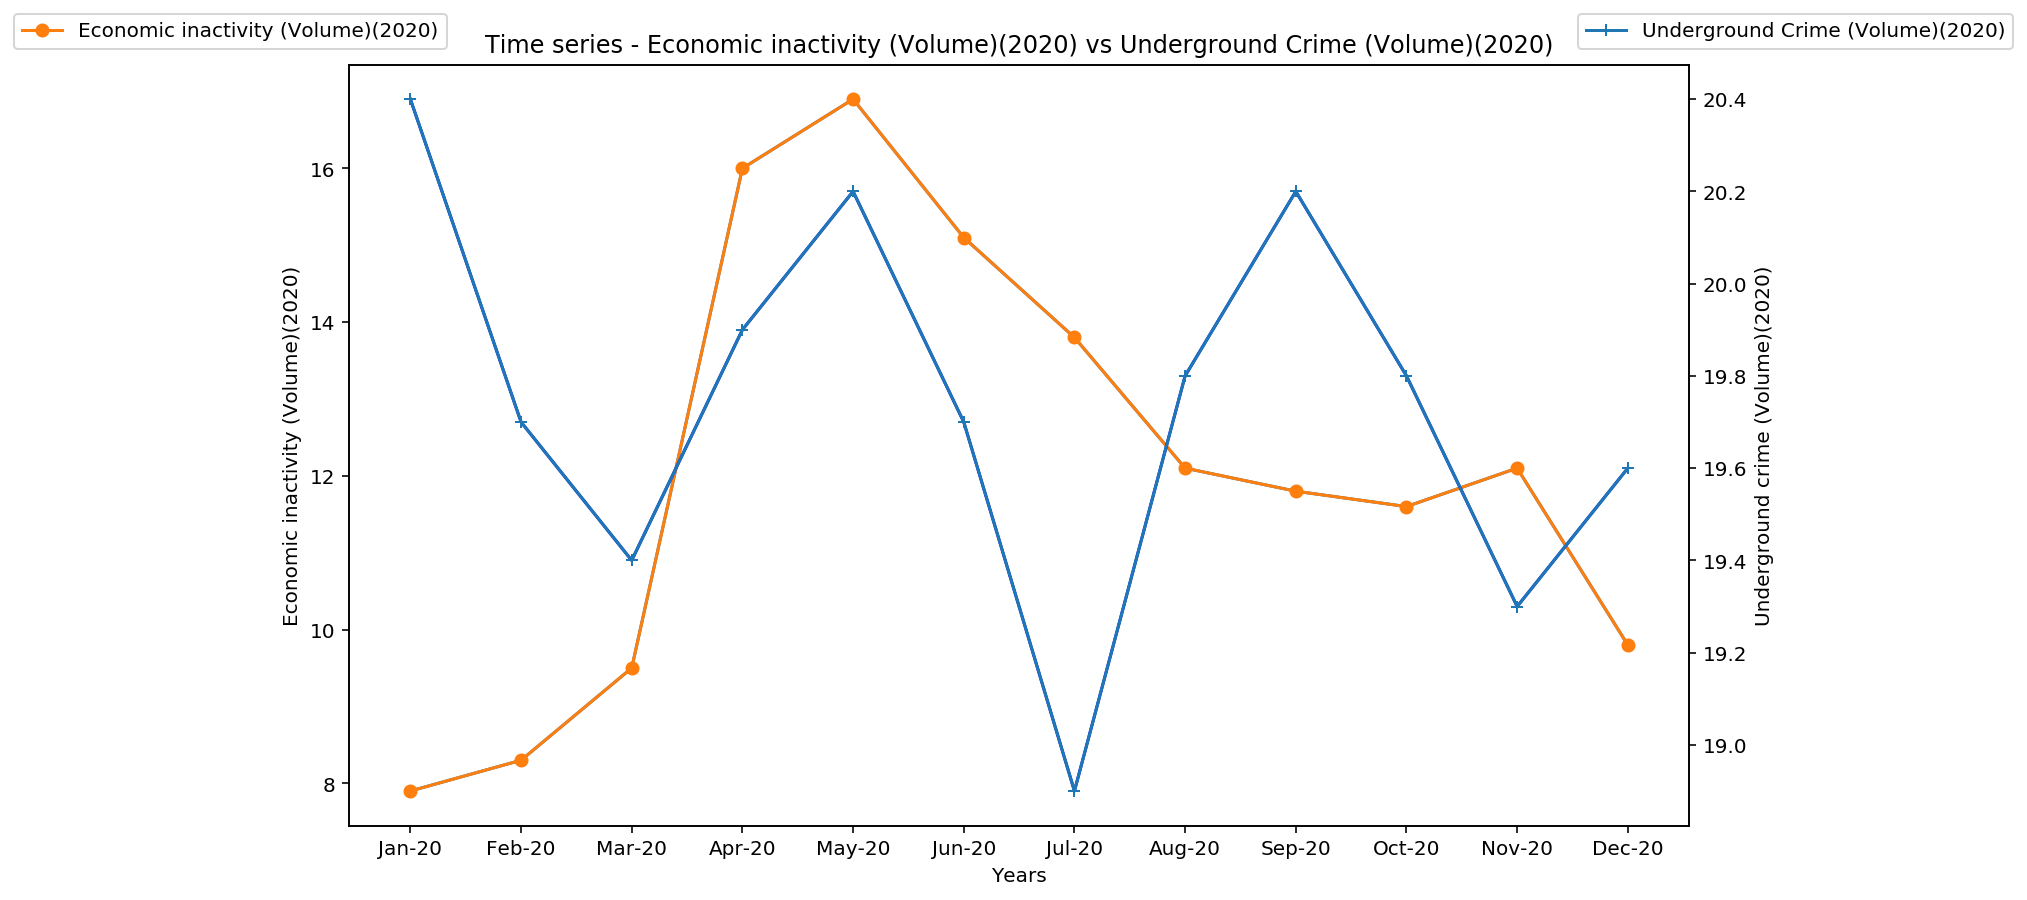

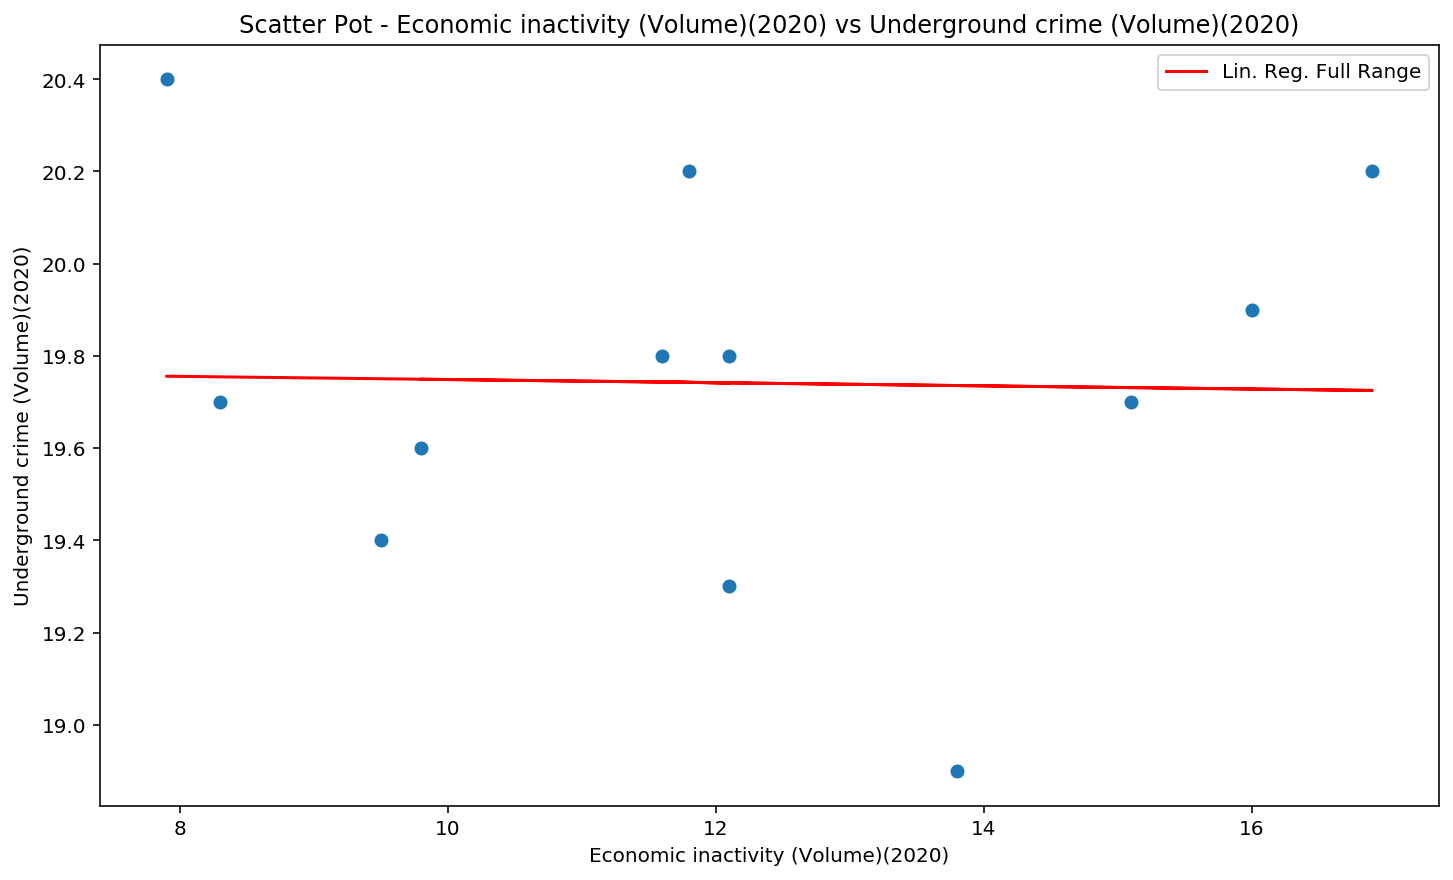

-0.003430622388895222 Linear regression
19.783091432012576 Linear regression

Covariance: -0.027045454545455046  Underground crime per Economic inactivity

Correlation Coefficient: -0.022021697299498717


In [42]:
# 2020 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2020):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2020)")
ax1.set_title("Time series - Economic inactivity (Volume)(2020) vs Underground Crime (Volume)(2020)")

ax1.plot(list_2020, economic_inactivity_2020)
ax1.plot(list_2020, economic_inactivity_2020, marker='o', label='Economic inactivity (Volume)(2020)')
ax1.legend(bbox_to_anchor=(0.08, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2020)")
ax2.plot(underground_crime_2020,'b')
ax2.plot(underground_crime_2020, marker='+',label='Underground Crime (Volume)(2020)')
ax2.legend(bbox_to_anchor=(1.25, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2020):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2020
y = underground_crime_2020
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2020, underground_crime_2020)
y_tot = economic_inactivity_2020*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2020, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2020, underground_crime_2020)


plt.xlabel("Economic inactivity (Volume)(2020)")
plt.ylabel("Underground crime (Volume)(2020)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2020) vs Underground crime (Volume)(2020)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2020
y = underground_crime_2020

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2020_covariance = np.cov(underground_crime_2020,economic_inactivity_2020)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2020,underground_crime_2020)[1][0]

print("Covariance:",underground_crime_2020_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

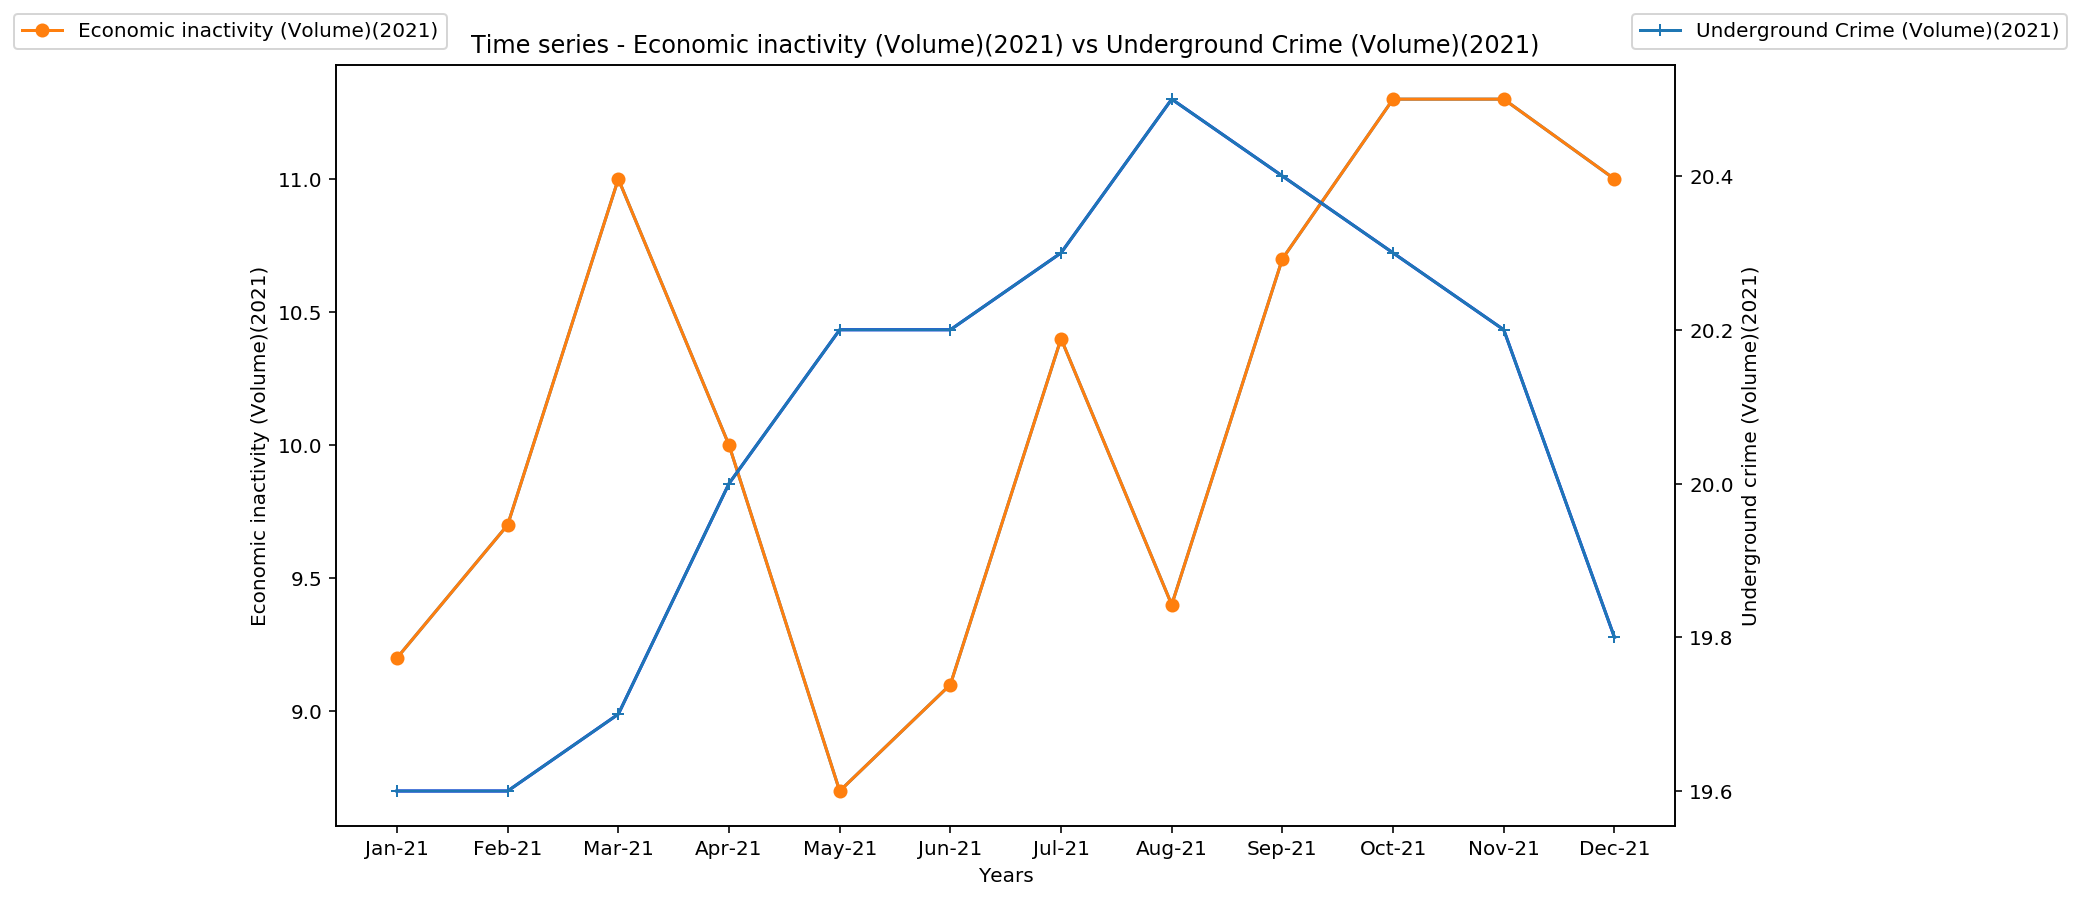

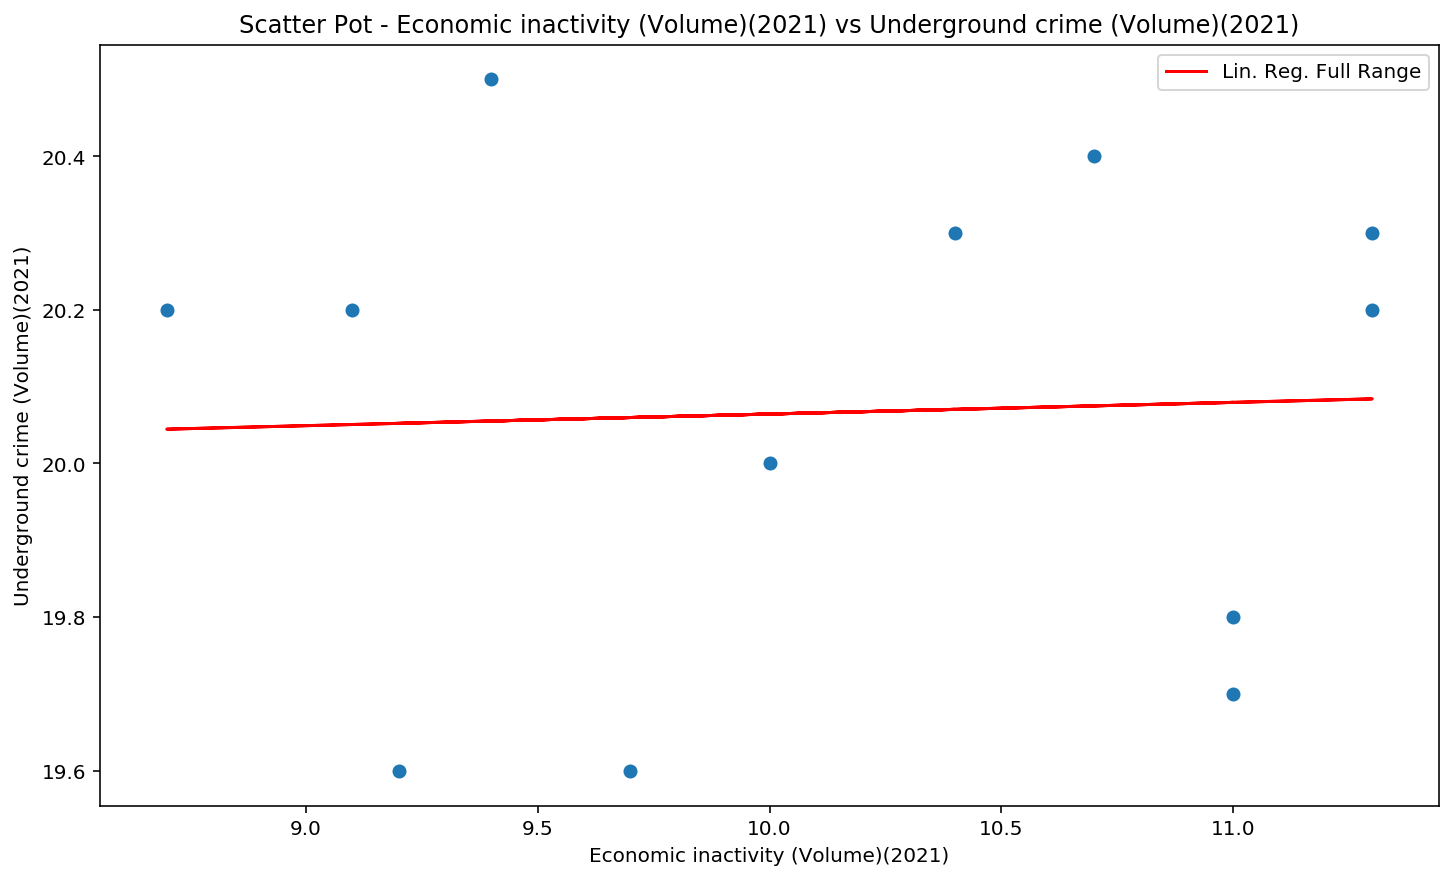

0.015167719980554191 Linear regression
19.912714308864043 Linear regression

Covariance: 0.011818181818181816  Underground crime per Economic inactivity

Correlation Coefficient: 0.04041374830577996


In [43]:
# 2021 list of data:
# Time series - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Scatter plot - (Economic inactivity vs Bus Crime, Economic inactivity vs Underground Crime, Bus Crime vs Underground crime)
# Covariance
# Correlation Coefficient 

# Time series (2021):
# subplots method provides a way to plot multiple plots on a single figure.
# ax1 and ax2 can be named anything.

import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots();
ax1.set_xlabel("Years")
ax1.set_ylabel("Economic inactivity (Volume)(2021)")
ax1.set_title("Time series - Economic inactivity (Volume)(2021) vs Underground Crime (Volume)(2021)")

ax1.plot(list_2021, economic_inactivity_2021)
ax1.plot(list_2021, economic_inactivity_2021, marker='o', label='Economic inactivity (Volume)(2021)')
ax1.legend(bbox_to_anchor=(0.09, 1.08))

ax2 = ax1.twinx();
ax2.set_ylabel("Underground crime (Volume)(2021)")
ax2.plot(underground_crime_2021,'b')
ax2.plot(underground_crime_2021, marker='+',label='Underground Crime (Volume)(2021)')
ax2.legend(bbox_to_anchor=(1.3, 1.08))

plt.show()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Linear regression (2021):
def linear_regression(x, y):
    meanx = np.mean(x)
    meany = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    m = sigmaxy/(sigmax*sigmax) 
    q = meany-m*meanx
    return m,q

x = economic_inactivity_2021
y = underground_crime_2021
lin_reg_m_tot, lin_reg_g_tot = linear_regression(x,y)

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Scatter plot with line of best fit.

plt.figure()

lin_reg_m_tot, lin_reg_q_tot = linear_regression(economic_inactivity_2021, underground_crime_2021)
y_tot = economic_inactivity_2021*lin_reg_m_tot+lin_reg_q_tot
plt.plot(economic_inactivity_2021, y_tot, label="Lin. Reg. Full Range",color ='r')
plt.legend()

plt.scatter(economic_inactivity_2021, underground_crime_2021)


plt.xlabel("Economic inactivity (Volume)(2021)")
plt.ylabel("Underground crime (Volume)(2021)")
plt.title("Scatter Pot - Economic inactivity (Volume)(2021) vs Underground crime (Volume)(2021)")

plt.show()

print(lin_reg_m_tot,"Linear regression")
print(lin_reg_g_tot,"Linear regression")
print()

#----------------------------------------------------------------------------------------------------------------------------------------------------
#Correlation coefficient & covariance

x = economic_inactivity_2021
y = underground_crime_2021

def correlation_coefficient(x,y):
    meanx   = np.mean(x)
    meany   = np.mean(y)
    sigmax  = np.std(x)
    sigmay  = np.std(y)
    sigmaxy = np.sum(np.multiply(x-meanx,y-meany))/(len(x)-1)
    correlation = sigmaxy/(sigmax*sigmay)
    return correlation

def calc_covariance(economic_inactivity, bus_crime_yearly):
    meanx   = np.mean(economic_inactivity)
    meany   = np.mean(bus_crime_yearly)
    mean_xy = (meanx*meany)
    x_times_y = (economic_inactivity*bus_crime_yearly)
    mean_of_xy = np.mean(x_times_y)
    covariance = mean_of_xy - mean_xy
    return covariance

underground_crime_2021_covariance = np.cov(underground_crime_2021,economic_inactivity_2021)[1][0]
cor_cof = np.corrcoef(economic_inactivity_2021,underground_crime_2021)[1][0]

print("Covariance:",underground_crime_2021_covariance," Underground crime per Economic inactivity")
print()
print("Correlation Coefficient:", cor_cof)

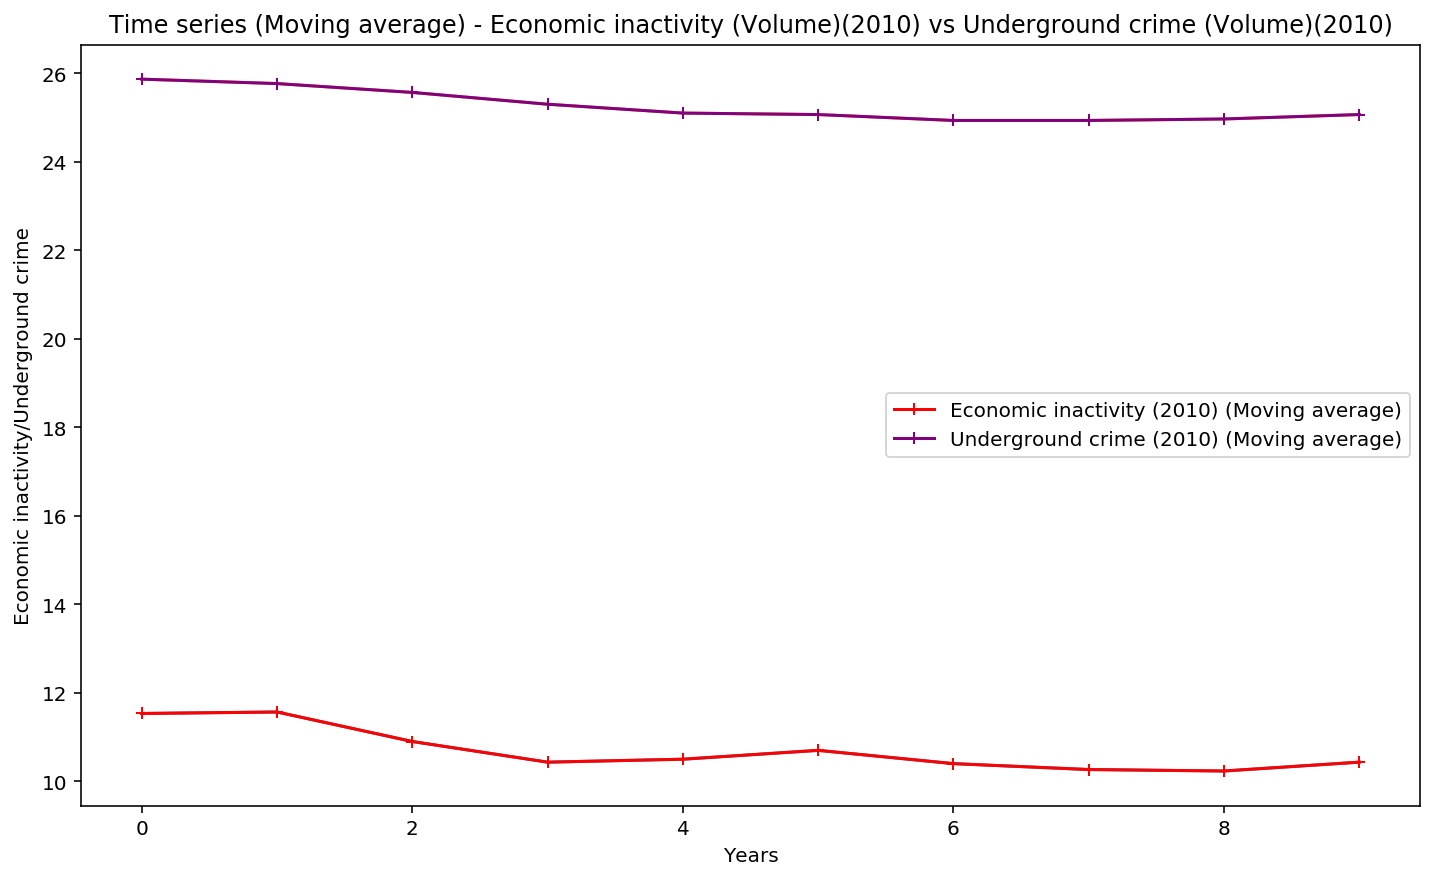

In [44]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2010 = np.array(economic_inactivity_2010)
underground_crime_2010 = np.array(underground_crime_2010)
economic_inactivity_2010_ma = moving_average(economic_inactivity_2010,3)
underground_crime_2010_ma = moving_average(underground_crime_2010,3)

plt.figure()
plt.plot(economic_inactivity_2010_ma)
plt.plot(underground_crime_2010_ma)
plt.plot(economic_inactivity_2010_ma, marker='+',label='Economic inactivity (2010) (Moving average)',color = 'red')
plt.plot(underground_crime_2010_ma, marker='+',label='Underground crime (2010) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2010) vs Underground crime (Volume)(2010)")


plt.legend()

plt.show()

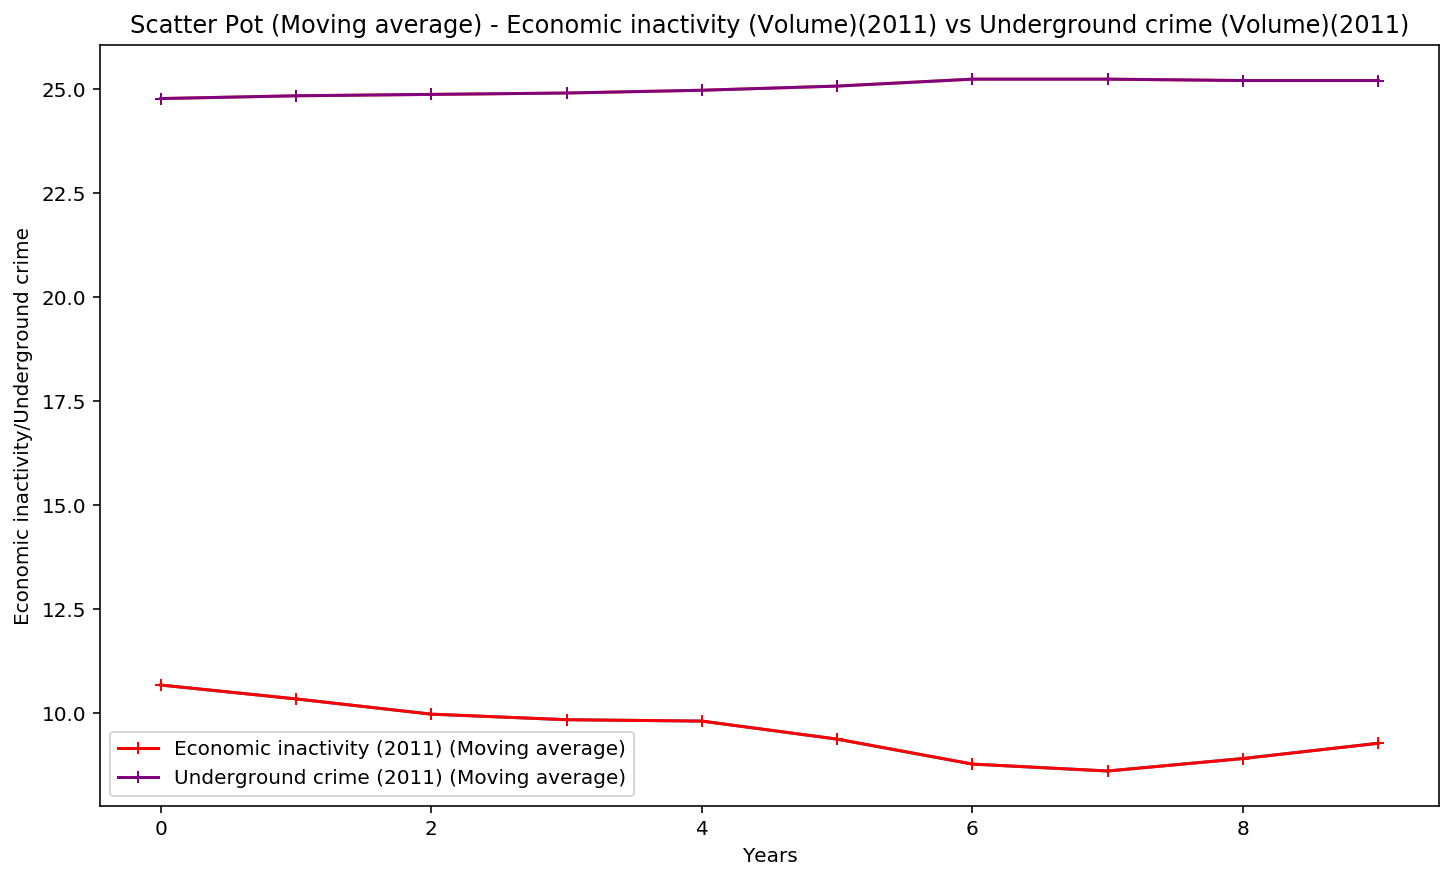

In [45]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2011 = np.array(economic_inactivity_2011)
underground_crime_2011 = np.array(underground_crime_2011)
economic_inactivity_2011_ma = moving_average(economic_inactivity_2011,3)
underground_crime_2011_ma = moving_average(underground_crime_2011,3)

plt.figure()
plt.plot(economic_inactivity_2011_ma)
plt.plot(underground_crime_2011_ma)
plt.plot(economic_inactivity_2011_ma, marker='+',label='Economic inactivity (2011) (Moving average)',color = 'red')
plt.plot(underground_crime_2011_ma, marker='+',label='Underground crime (2011) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2011) vs Underground crime (Volume)(2011)")


plt.legend()

plt.show()

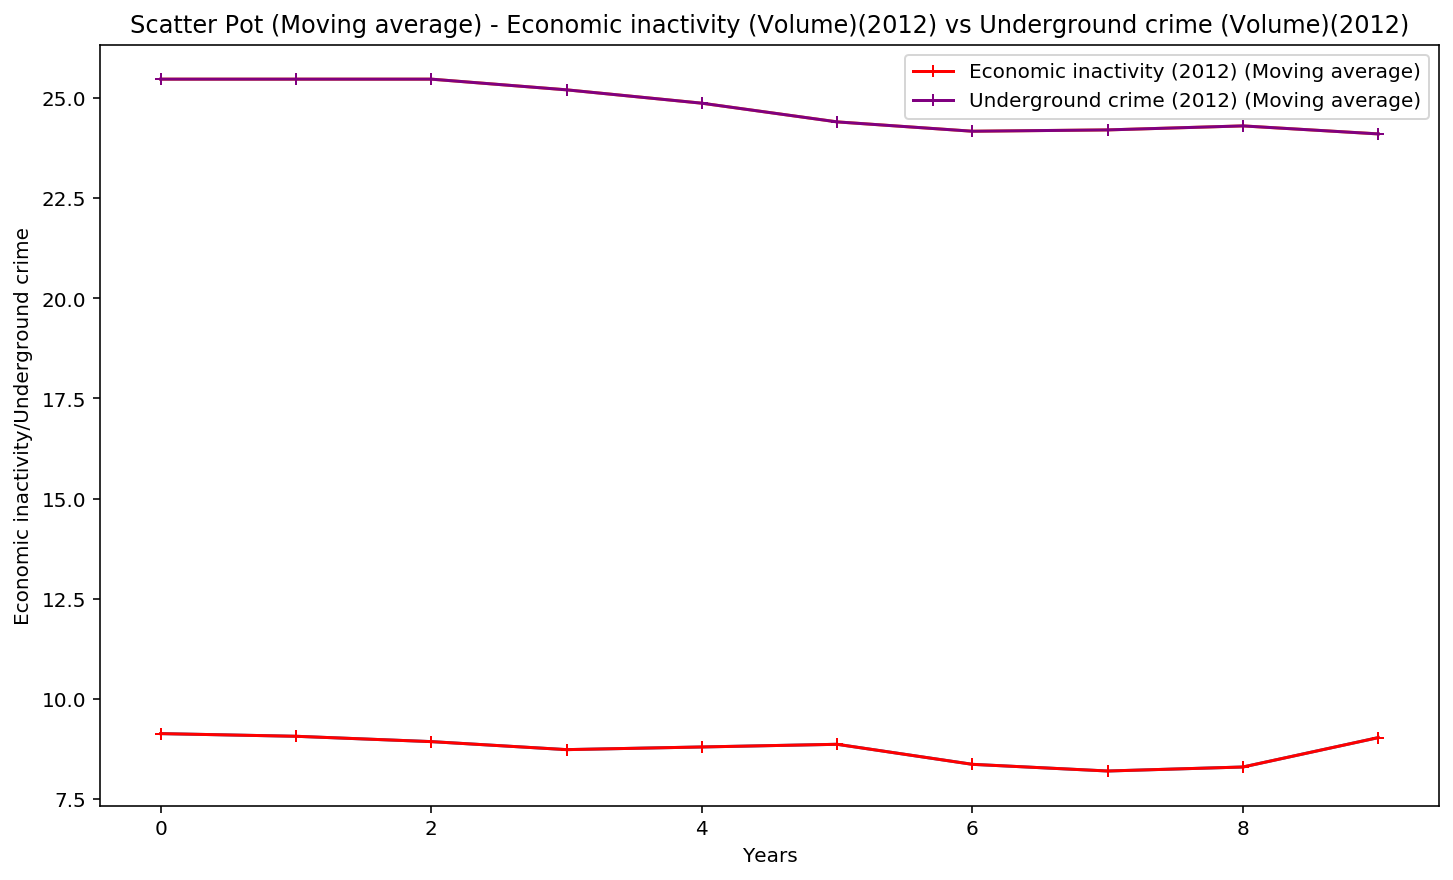

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2012 = np.array(economic_inactivity_2012)
underground_crime_2012 = np.array(underground_crime_2012)
economic_inactivity_2012_ma = moving_average(economic_inactivity_2012,3)
underground_crime_2012_ma = moving_average(underground_crime_2012,3)

plt.figure()
plt.plot(economic_inactivity_2012_ma)
plt.plot(underground_crime_2012_ma)
plt.plot(economic_inactivity_2012_ma, marker='+',label='Economic inactivity (2012) (Moving average)',color = 'red')
plt.plot(underground_crime_2012_ma, marker='+',label='Underground crime (2012) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2012) vs Underground crime (Volume)(2012)")


plt.legend()

plt.show()

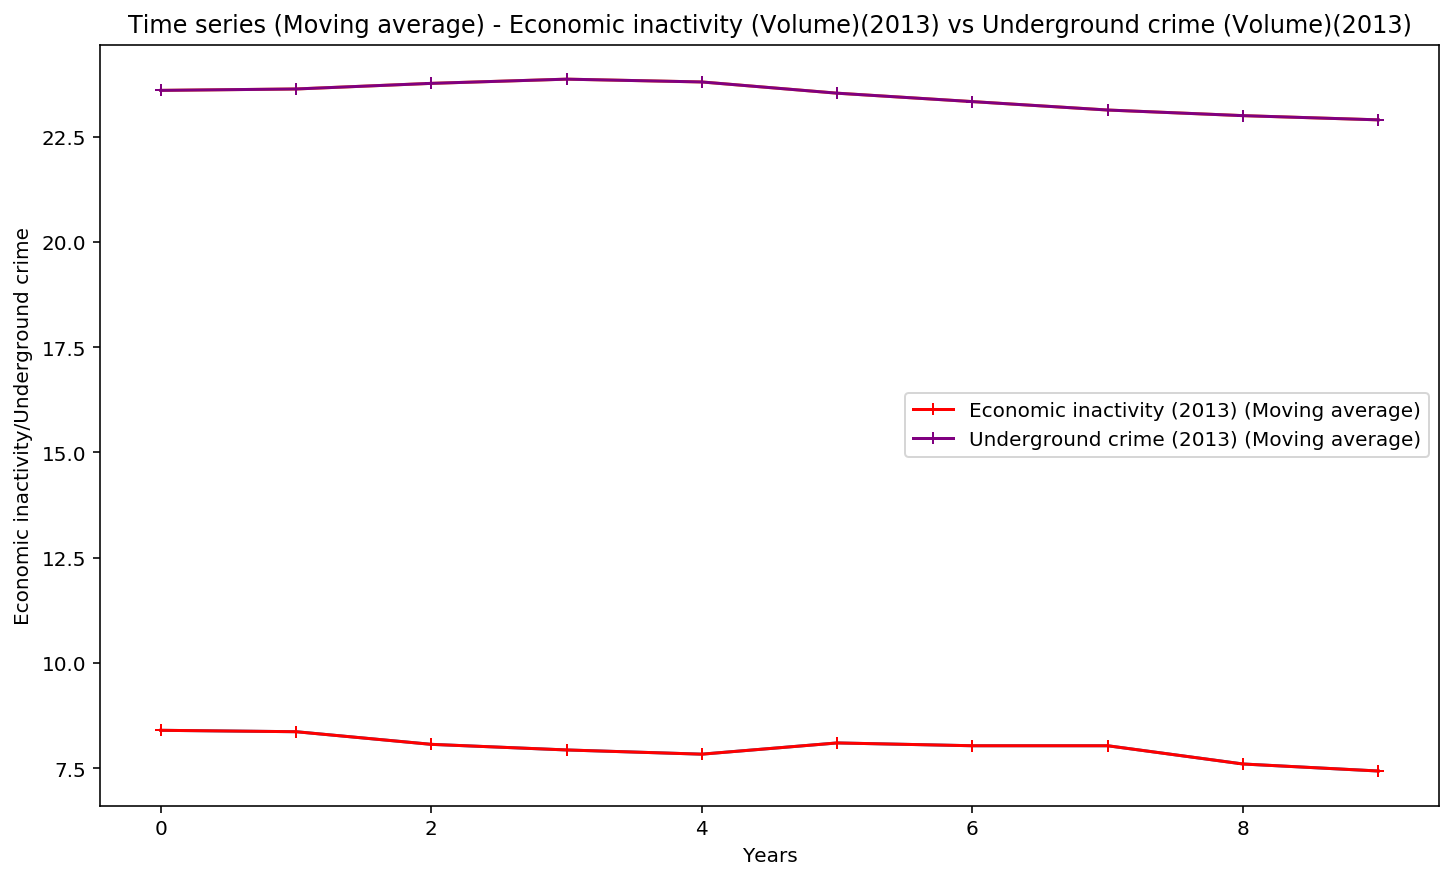

In [57]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2013 = np.array(economic_inactivity_2013)
underground_crime_2013 = np.array(underground_crime_2013)
economic_inactivity_2013_ma = moving_average(economic_inactivity_2013,3)
underground_crime_2013_ma = moving_average(underground_crime_2013,3)

plt.figure()
plt.plot(economic_inactivity_2013_ma)
plt.plot(underground_crime_2013_ma)
plt.plot(economic_inactivity_2013_ma, marker='+',label='Economic inactivity (2013) (Moving average)',color = 'red')
plt.plot(underground_crime_2013_ma, marker='+',label='Underground crime (2013) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2013) vs Underground crime (Volume)(2013)")


plt.legend()

plt.show()

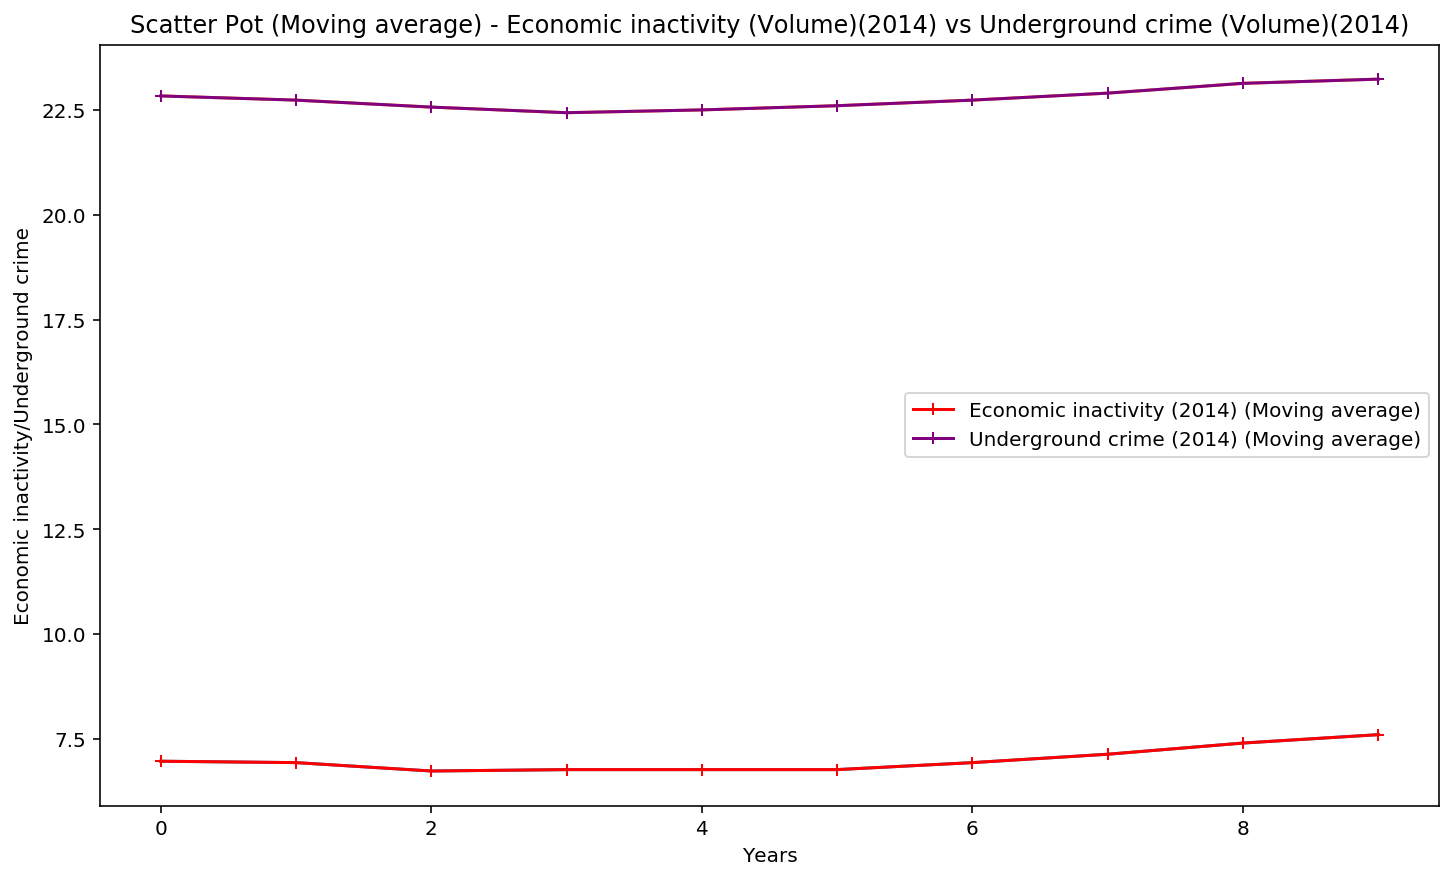

In [58]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2014 = np.array(economic_inactivity_2014)
underground_crime_2014 = np.array(underground_crime_2014)
economic_inactivity_2014_ma = moving_average(economic_inactivity_2014,3)
underground_crime_2014_ma = moving_average(underground_crime_2014,3)

plt.figure()
plt.plot(economic_inactivity_2014_ma)
plt.plot(underground_crime_2014_ma)
plt.plot(economic_inactivity_2014_ma, marker='+',label='Economic inactivity (2014) (Moving average)',color = 'red')
plt.plot(underground_crime_2014_ma, marker='+',label='Underground crime (2014) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2014) vs Underground crime (Volume)(2014)")


plt.legend()

plt.show()

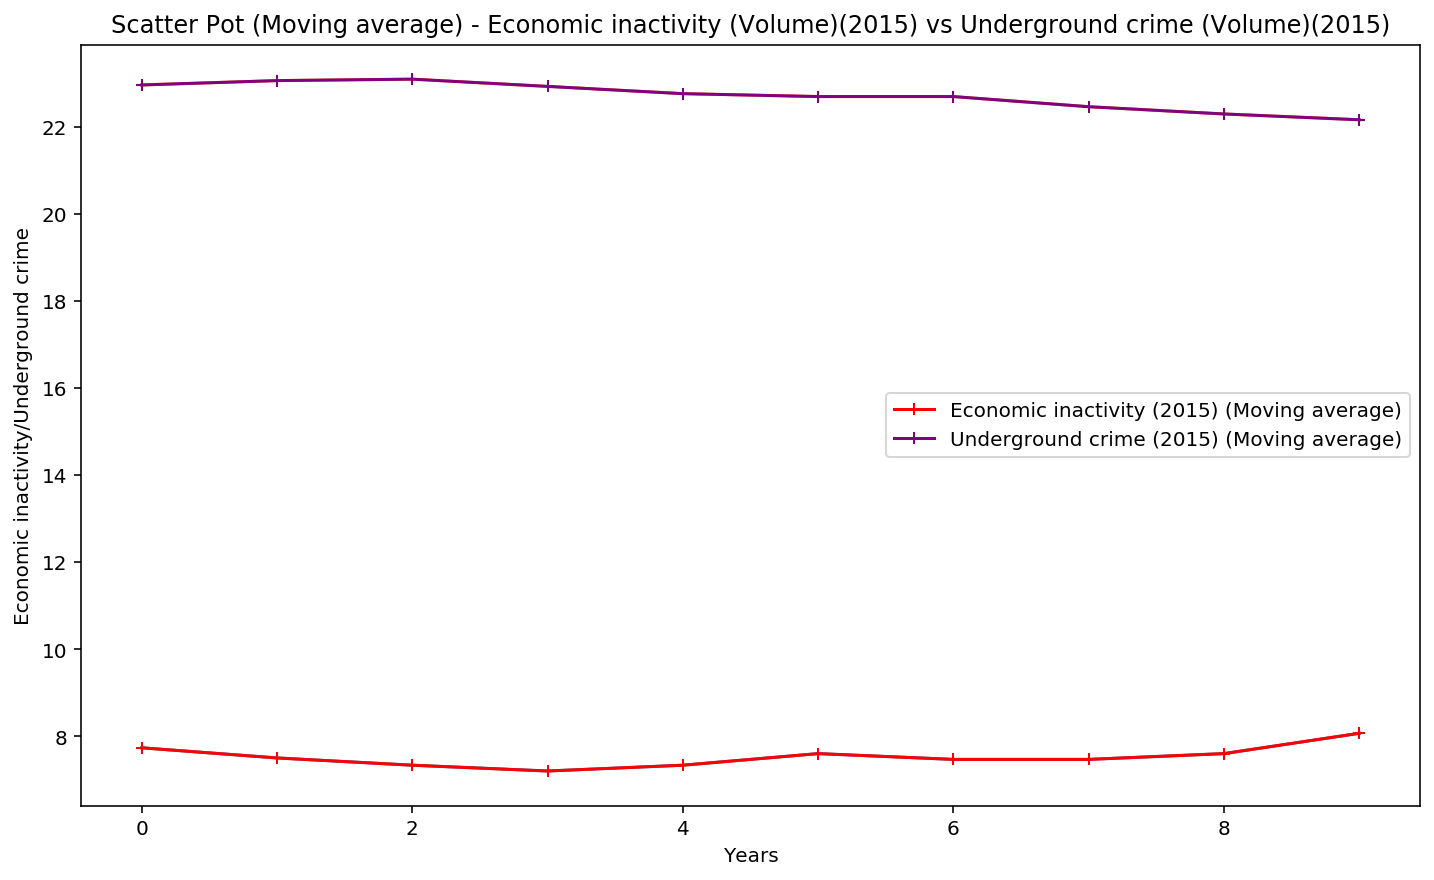

In [49]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2015 = np.array(economic_inactivity_2015)
underground_crime_2015 = np.array(underground_crime_2015)
economic_inactivity_2015_ma = moving_average(economic_inactivity_2015,3)
underground_crime_2015_ma = moving_average(underground_crime_2015,3)

plt.figure()
plt.plot(economic_inactivity_2015_ma)
plt.plot(underground_crime_2015_ma)
plt.plot(economic_inactivity_2015_ma, marker='+',label='Economic inactivity (2015) (Moving average)',color = 'red')
plt.plot(underground_crime_2015_ma, marker='+',label='Underground crime (2015) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2015) vs Underground crime (Volume)(2015)")


plt.legend()

plt.show()

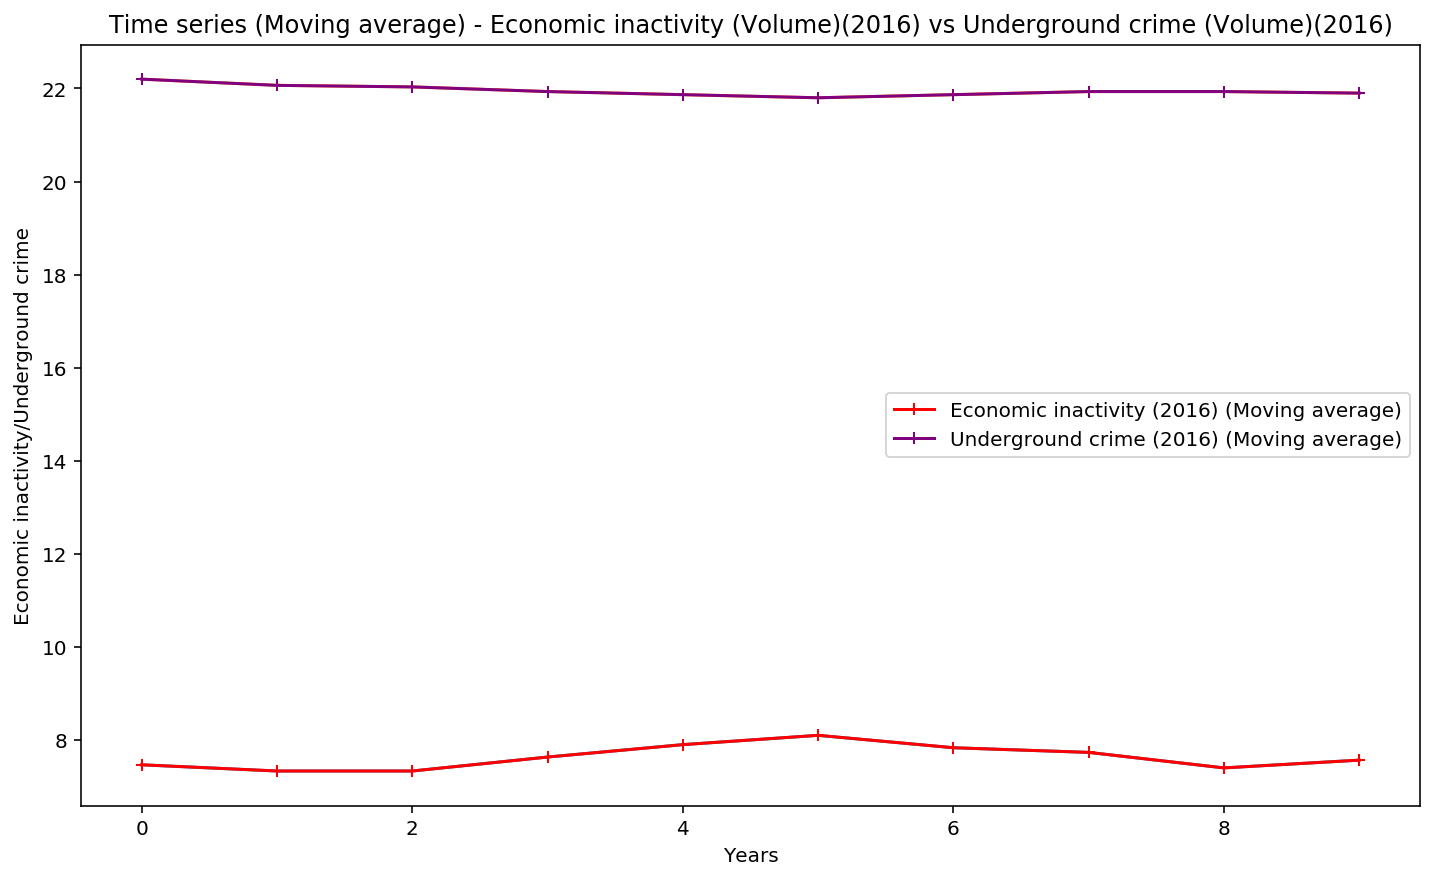

In [56]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2016 = np.array(economic_inactivity_2016)
underground_crime_2016 = np.array(underground_crime_2016)
economic_inactivity_2016_ma = moving_average(economic_inactivity_2016,3)
underground_crime_2016_ma = moving_average(underground_crime_2016,3)

plt.figure()
plt.plot(economic_inactivity_2016_ma)
plt.plot(underground_crime_2016_ma)
plt.plot(economic_inactivity_2016_ma, marker='+',label='Economic inactivity (2016) (Moving average)',color = 'red')
plt.plot(underground_crime_2016_ma, marker='+',label='Underground crime (2016) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2016) vs Underground crime (Volume)(2016)")


plt.legend()

plt.show()

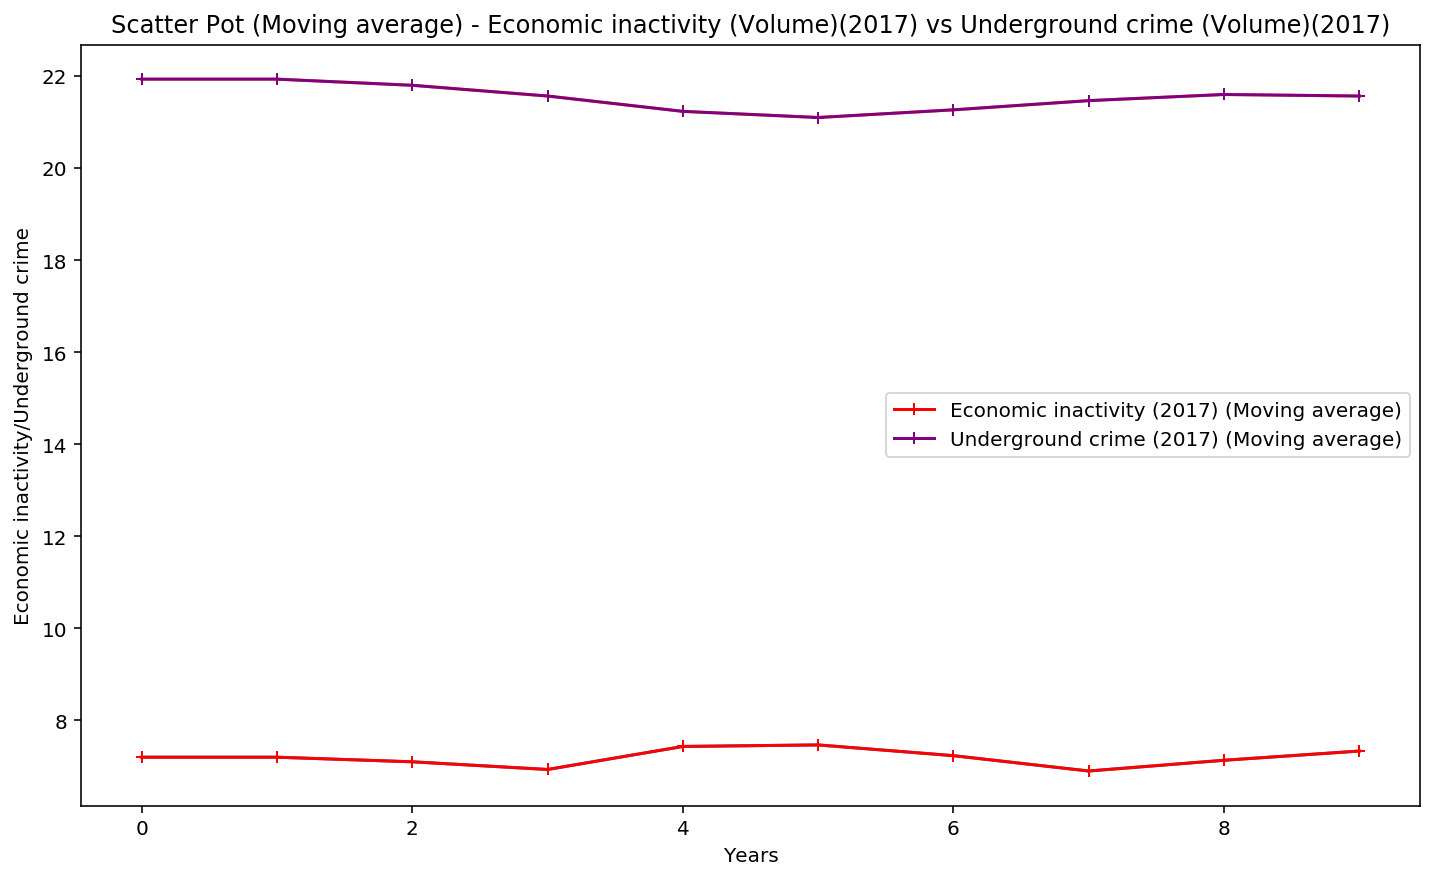

In [51]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2017 = np.array(economic_inactivity_2017)
underground_crime_2017 = np.array(underground_crime_2017)
economic_inactivity_2017_ma = moving_average(economic_inactivity_2017,3)
underground_crime_2017_ma = moving_average(underground_crime_2017,3)

plt.figure()
plt.plot(economic_inactivity_2017_ma)
plt.plot(underground_crime_2017_ma)
plt.plot(economic_inactivity_2017_ma, marker='+',label='Economic inactivity (2017) (Moving average)',color = 'red')
plt.plot(underground_crime_2017_ma, marker='+',label='Underground crime (2017) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2017) vs Underground crime (Volume)(2017)")


plt.legend()

plt.show()

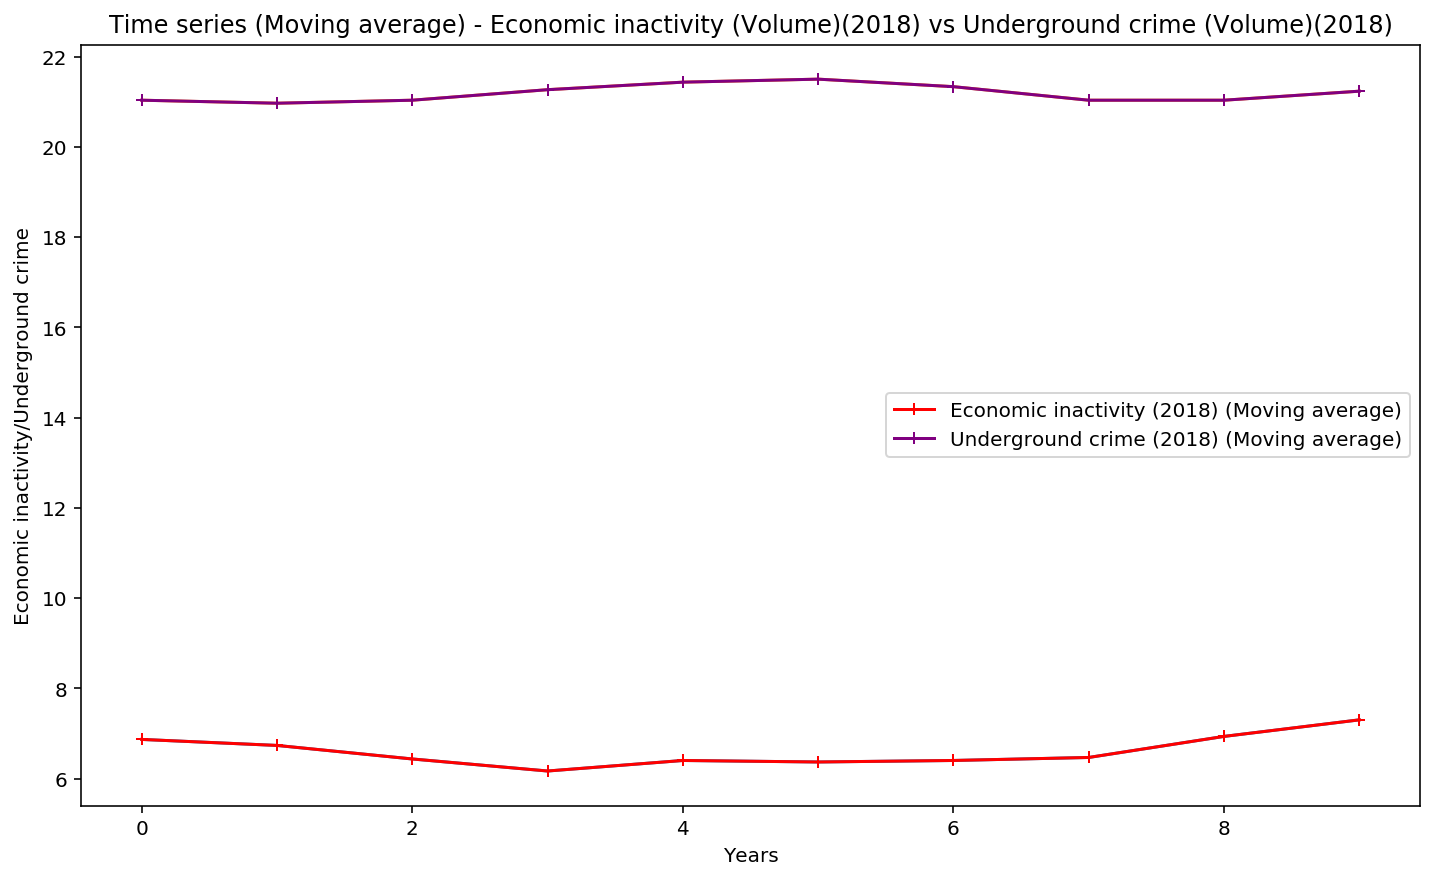

In [59]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2018 = np.array(economic_inactivity_2018)
underground_crime_2018 = np.array(underground_crime_2018)
economic_inactivity_2018_ma = moving_average(economic_inactivity_2018,3)
underground_crime_2018_ma = moving_average(underground_crime_2018,3)

plt.figure()
plt.plot(economic_inactivity_2018_ma)
plt.plot(underground_crime_2018_ma)
plt.plot(economic_inactivity_2018_ma, marker='+',label='Economic inactivity (2018) (Moving average)',color = 'red')
plt.plot(underground_crime_2018_ma, marker='+',label='Underground crime (2018) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2018) vs Underground crime (Volume)(2018)")


plt.legend()

plt.show()

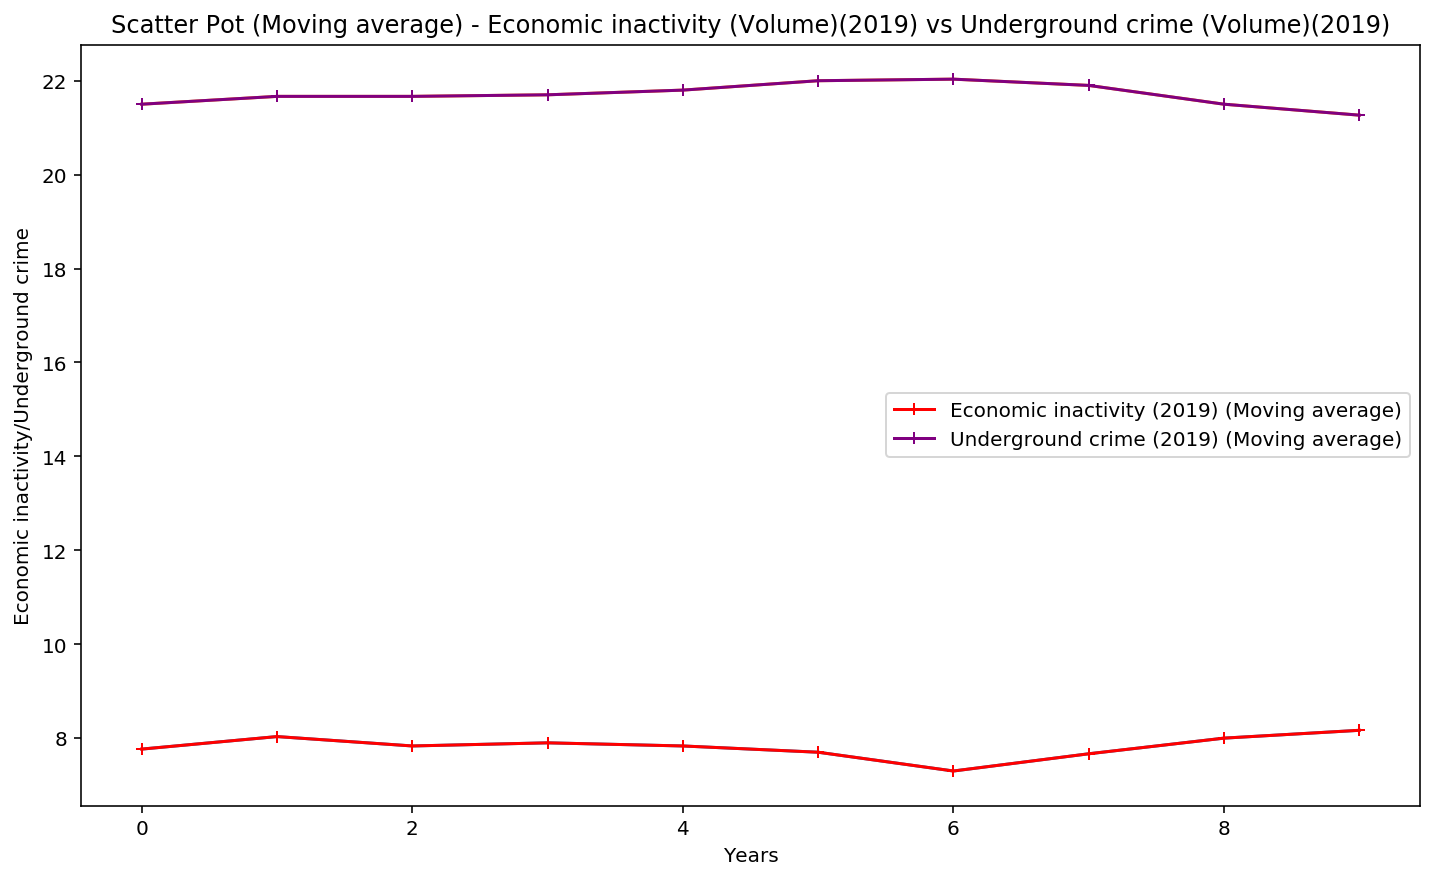

In [53]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2019 = np.array(economic_inactivity_2019)
underground_crime_2019 = np.array(underground_crime_2019)
economic_inactivity_2019_ma = moving_average(economic_inactivity_2019,3)
underground_crime_2019_ma = moving_average(underground_crime_2019,3)

plt.figure()
plt.plot(economic_inactivity_2019_ma)
plt.plot(underground_crime_2019_ma)
plt.plot(economic_inactivity_2019_ma, marker='+',label='Economic inactivity (2019) (Moving average)',color = 'red')
plt.plot(underground_crime_2019_ma, marker='+',label='Underground crime (2019) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2019) vs Underground crime (Volume)(2019)")


plt.legend()

plt.show()

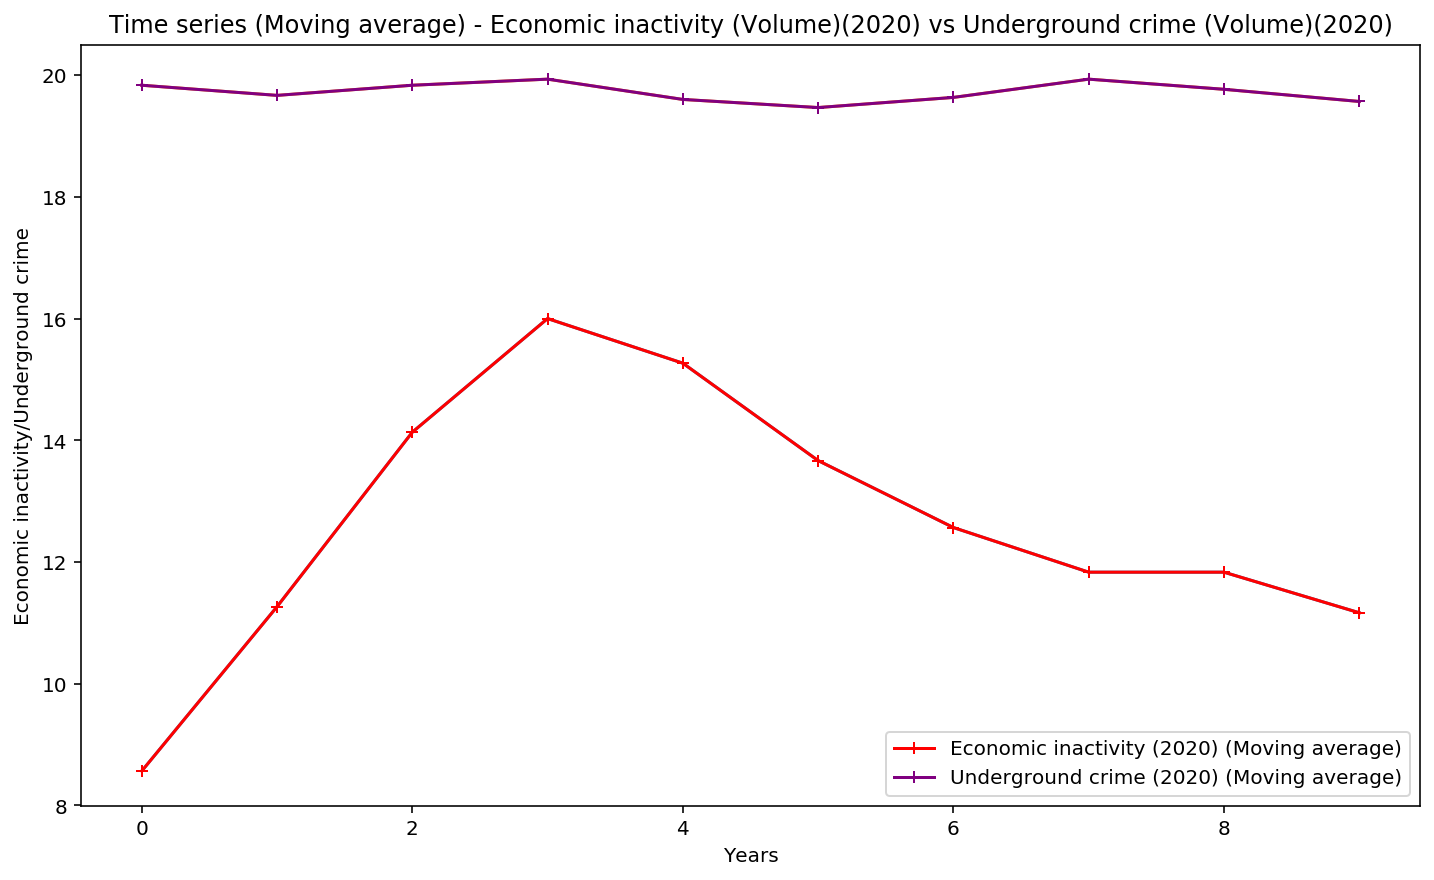

In [60]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2020 = np.array(economic_inactivity_2020)
underground_crime_2020 = np.array(underground_crime_2020)
economic_inactivity_2020_ma = moving_average(economic_inactivity_2020,3)
underground_crime_2020_ma = moving_average(underground_crime_2020,3)

plt.figure()
plt.plot(economic_inactivity_2020_ma)
plt.plot(underground_crime_2020_ma)
plt.plot(economic_inactivity_2020_ma, marker='+',label='Economic inactivity (2020) (Moving average)',color = 'red')
plt.plot(underground_crime_2020_ma, marker='+',label='Underground crime (2020) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Time series (Moving average) - Economic inactivity (Volume)(2020) vs Underground crime (Volume)(2020)")


plt.legend()

plt.show()

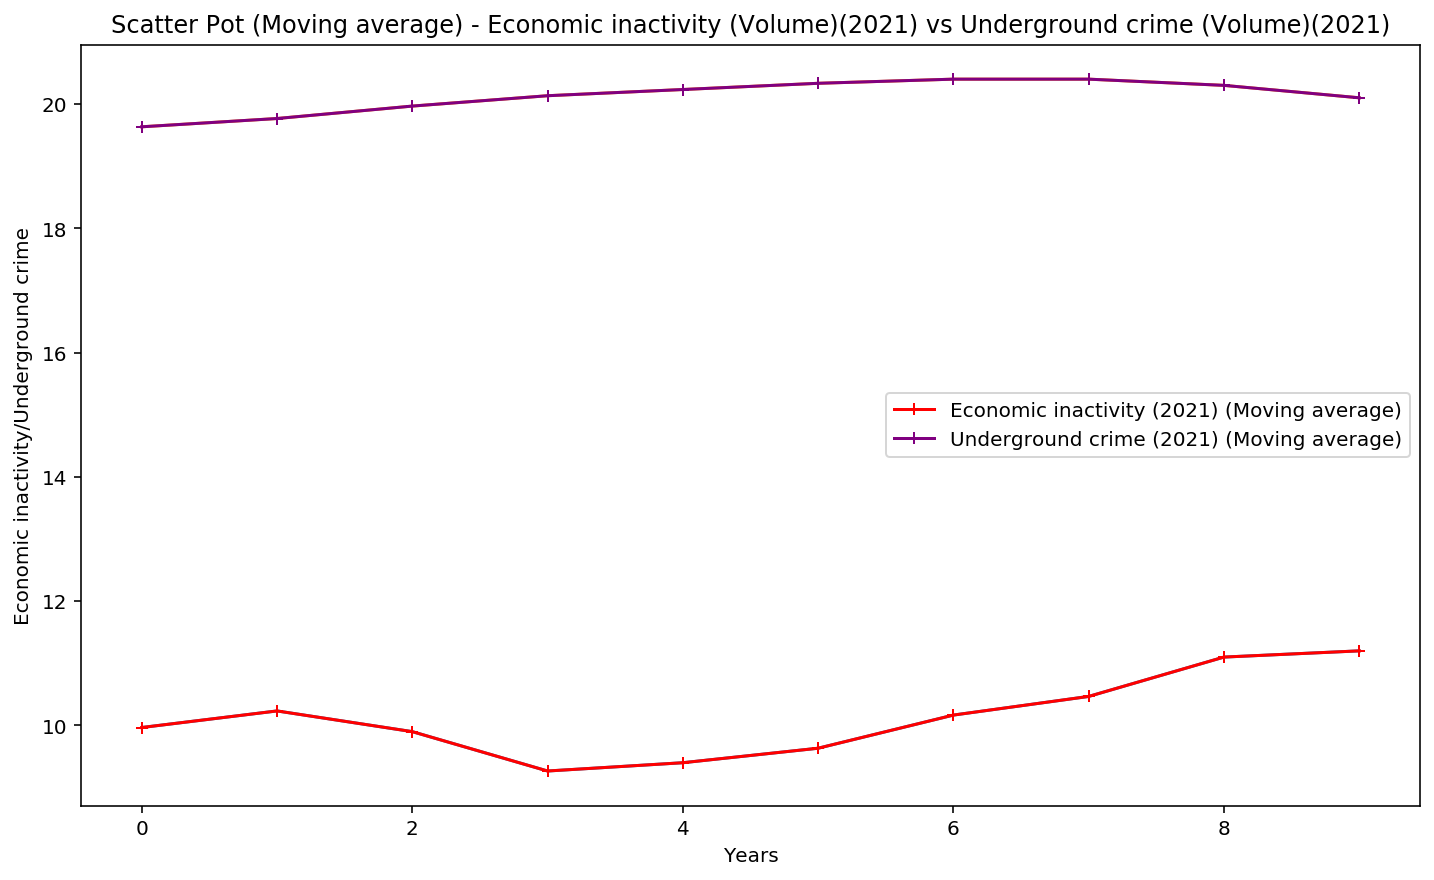

In [55]:
import numpy as np
import matplotlib.pyplot as plt

#moving averages graph

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

economic_inactivity_2021 = np.array(economic_inactivity_2021)
underground_crime_2021 = np.array(underground_crime_2021)
economic_inactivity_2021_ma = moving_average(economic_inactivity_2021,3)
underground_crime_2021_ma = moving_average(underground_crime_2021,3)

plt.figure()
plt.plot(economic_inactivity_2021_ma)
plt.plot(underground_crime_2021_ma)
plt.plot(economic_inactivity_2021_ma, marker='+',label='Economic inactivity (2021) (Moving average)',color = 'red')
plt.plot(underground_crime_2021_ma, marker='+',label='Underground crime (2021) (Moving average)',color = 'purple')

plt.xlabel("Years")
plt.ylabel("Economic inactivity/Underground crime")
plt.title("Scatter Pot (Moving average) - Economic inactivity (Volume)(2021) vs Underground crime (Volume)(2021)")


plt.legend()

plt.show()